## Test fonction run exp

### 1. Imports

In [1]:
import torch
import seaborn as sns
import stat_reliability_measure.config as config_
from importlib import reload
import matplotlib.pyplot as plt
import stat_reliability_measure.dev.torch_utils as t_u
import stat_reliability_measure.dev.torch_utils2 as t_u2
from stat_reliability_measure.dev.amls.amls_config import MLS_SMC_Config
import stat_reliability_measure.dev.utils as utils
import stat_reliability_measure.run_est as run_est
from stat_reliability_measure.config import ExpModelConfig
import stat_reliability_measure.dev.smc.smc_pyt as smc_pyt
import stat_reliability_measure.dev.smc.smc_pyt2 as smc_pyt2
import stat_reliability_measure.dev.smc.smc_config as smc_config
import stat_reliability_measure.dev.smc.smc_config2 as smc_config2
import stat_reliability_measure.dev.amls.amls_pyt as amls_pyt
import stat_reliability_measure.dev.form.form_pyt as form_pyt
import stat_reliability_measure.dev.amls.amls_config as amls_config 
import stat_reliability_measure.dev.mls.webb_config as webb_config
import stat_reliability_measure.dev.form.form_config as form_config
import stat_reliability_measure.dev.mls.amls_uniform as amls_webb
import stat_reliability_measure.dev.mc.mc_pyt as mc_pyt
import stat_reliability_measure.dev.mc.mc_config as mc_config
import stat_reliability_measure.dev.imp_sampling.is_pyt as is_pyt
import stat_reliability_measure.dev.imp_sampling.is_config as is_config
import stat_reliability_measure.dev.torch_arch as t_a
import stat_reliability_measure.dev.mpp_utils as mpp_utils
import stat_reliability_measure.dev.ce_is.ce_is as ce_is_pyt
import stat_reliability_measure.dev.ce_is.ce_is_config as ce_is_config
import numpy.linalg as LA
import pandas as pd
import numpy as np
import os 

### 2. Model & Data load

Current device: cuda:0
Current data index: 0
Current data index: 0
Batch accuracy:0.9921875
dnn2(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (flat_op): Flatten()
  (activation): ReLU()
)


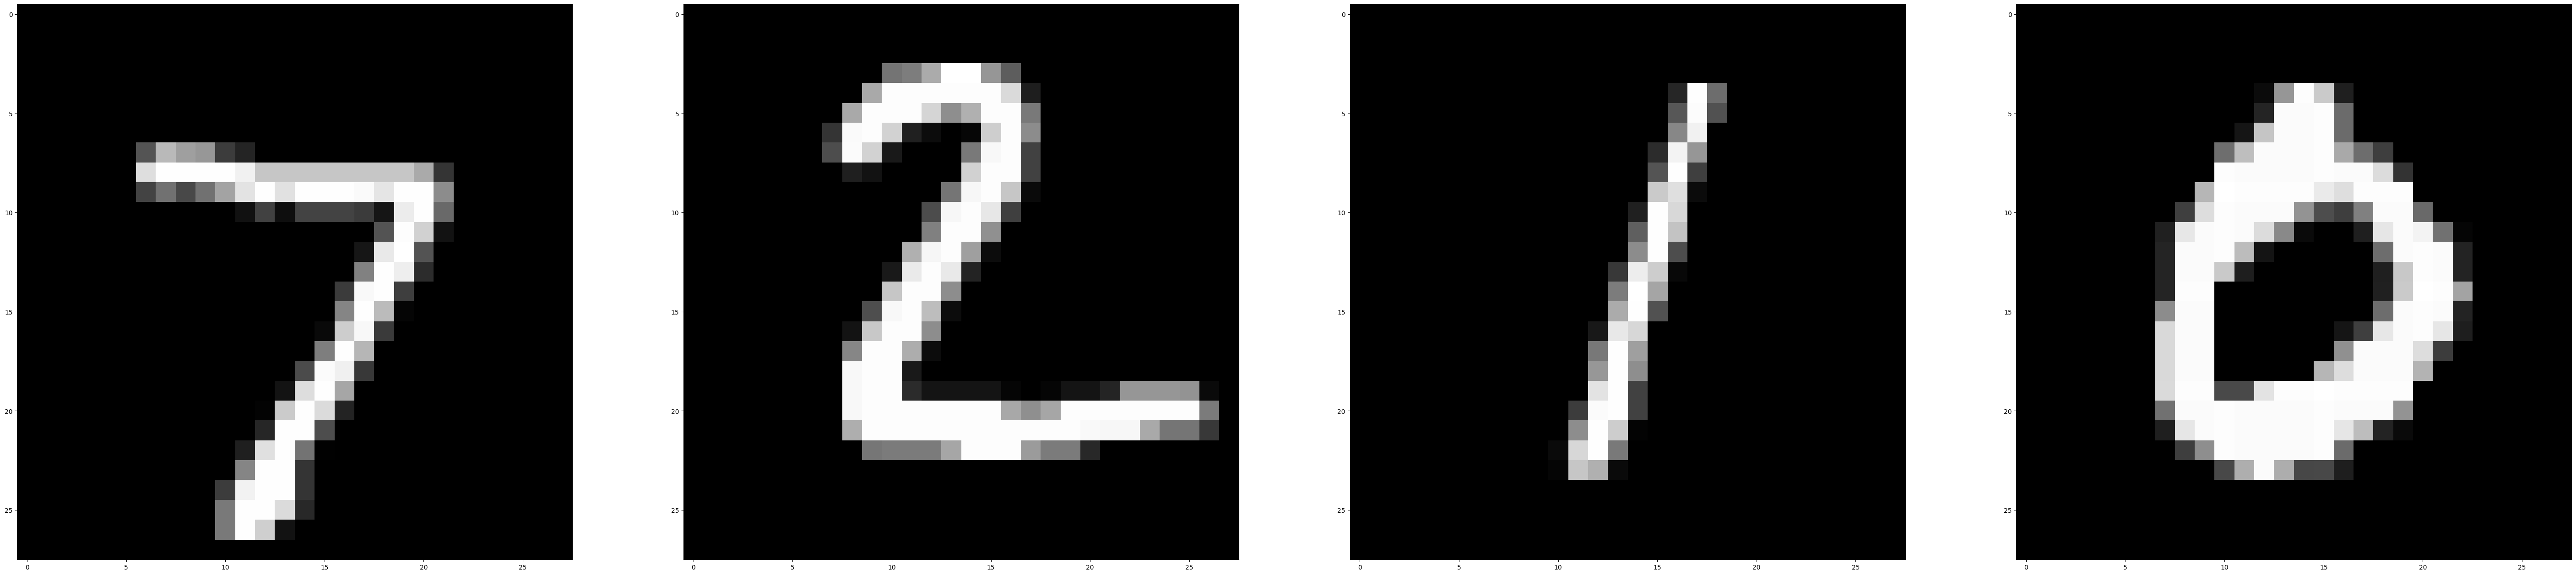

In [2]:
reload(config_)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Current device: {device}")
model_arch='dnn4'
release_model=True
if release_model:
    model = t_a.dnn2()
    model.load_state_dict(torch.load('../models/mnist/model_dnn2_release.pt'))
    model.to(device)
    model.eval()
else: 
    model=model_arch
dataset='mnist'
config = ExpModelConfig(model=model,dataset_name=dataset,device=device,epsilon_range=[0.18],noise_dist='uniform')
config.update()
print(f"Batch accuracy:{config.sample_accuracy}")
os.rmdir(config.exp_log_path)
print(config.model)
X,y = config.X[:1], config.y[:1]
t_u.plot_k_tensor(config.X[:4],figsize=(18,18))
zeros_d = torch.zeros((1,config.d)).to(config.device)
n_rep_exp=300

## 3. Experiments with mls-SMC, MLS-SMC, Importance Sampling, FORM and Line Sampling

input_shape:(1, 28, 28)
Current data index: 0
Current data index: 0
with parameters in {'N_range': [400000], 'batch_size_range': [20000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:0,eps:0.18
Current data index: 0


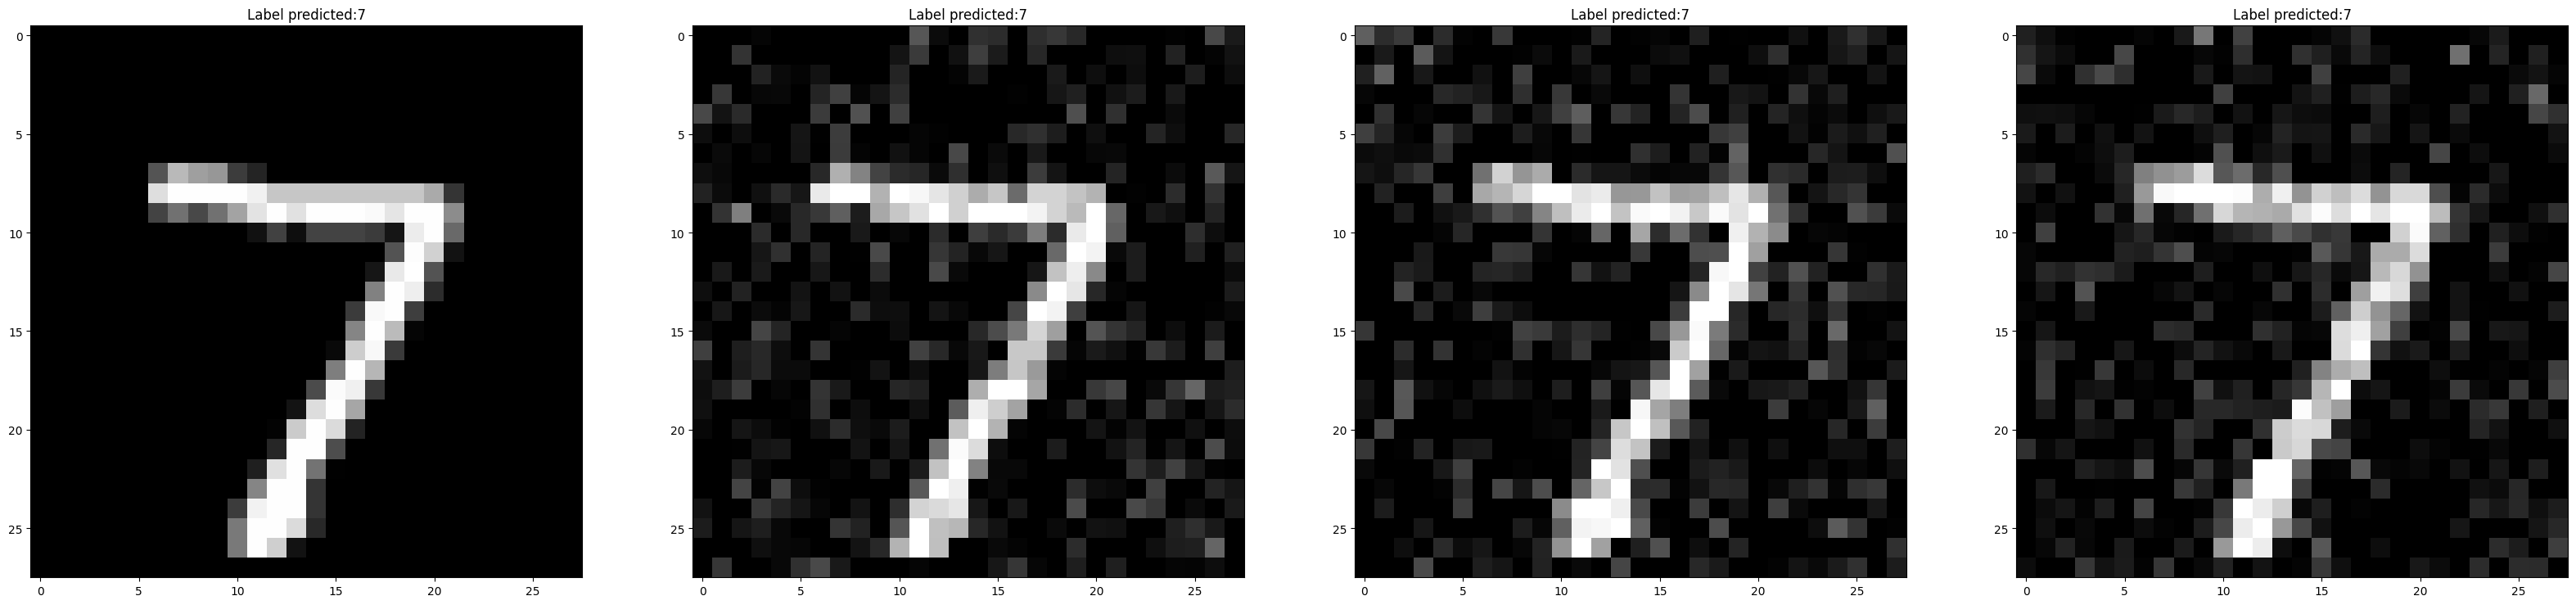

fosm_est:tensor([9.8497e-05], device='cuda:0')
form est:tensor([3.9339e-06], device='cuda:0')
form_naif:5.155801773071289e-06
Starting IS estimation 1/3, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 400000: batch_size: 20000: stepsize: 0.01: num_iter: 20


100%|██████████| 4/4 [00:01<00:00,  3.29it/s]


mean est:0.00013821866377838887, std est:5.335478000028375e-06
mean calls:400009.0
std. re.:279.28007551397246
std. rel. adj.:111714543.7262686
method_name:IS
method: IS, input_index:1,eps:0.18
Current data index: 1
Current data index: 1


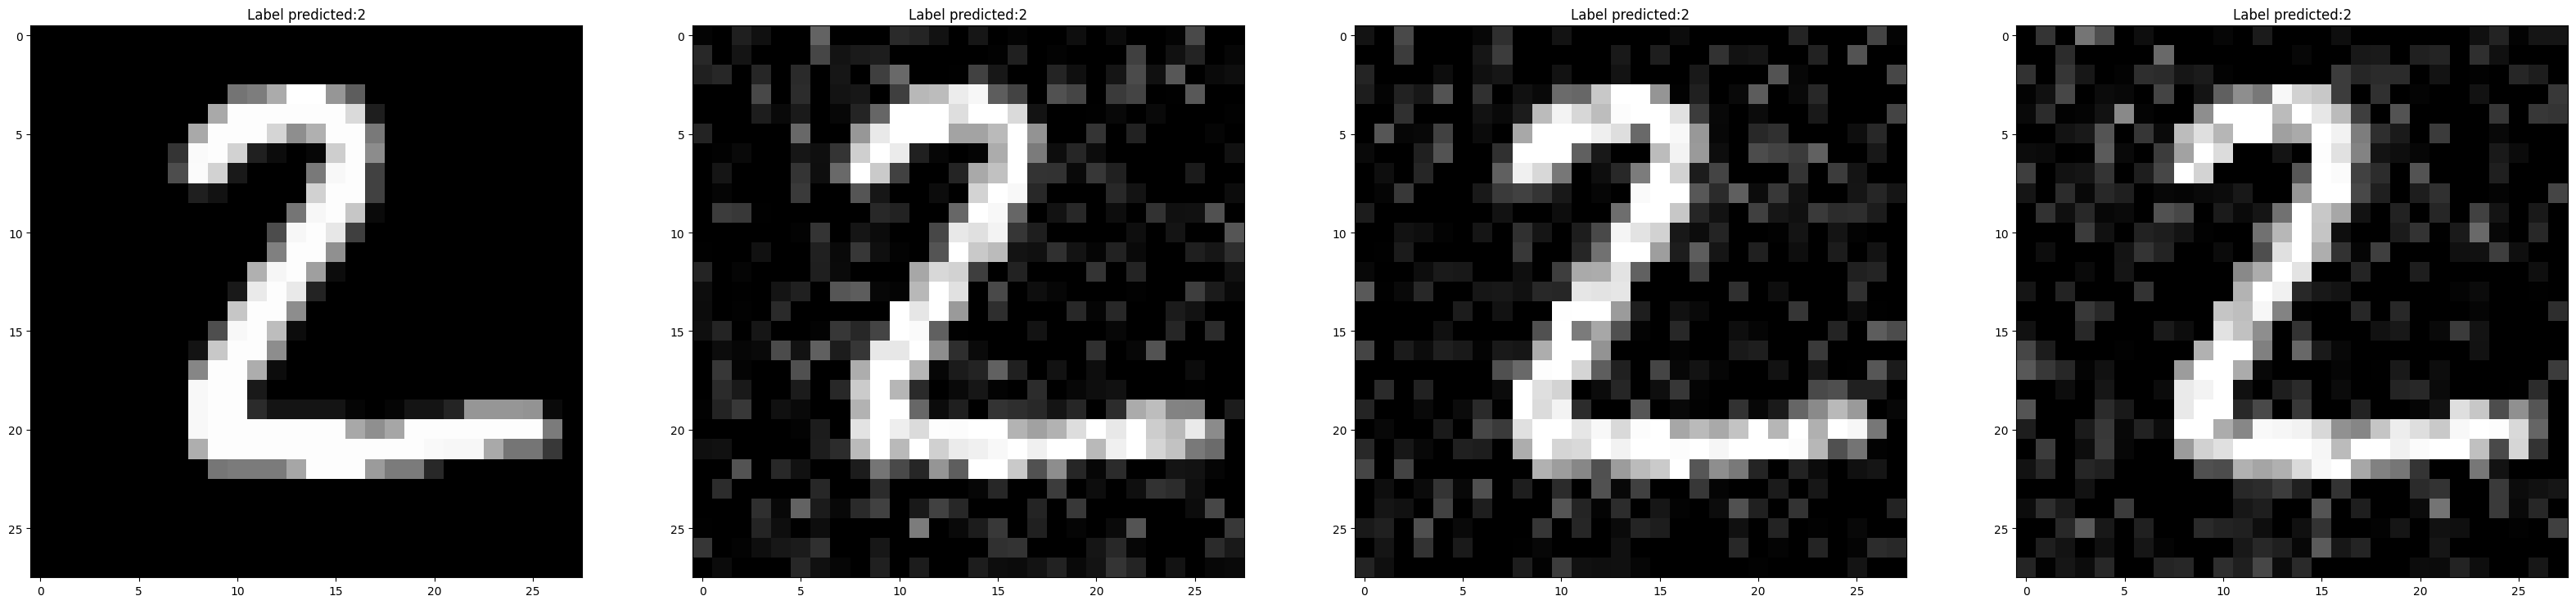

fosm_est:tensor([0.], device='cuda:0')
form est:tensor([0.], device='cuda:0')
form_naif:0.0
Starting IS estimation 2/3, with model: dnn4_mnist, img_idx:1,eps:0.18, N: 400000: batch_size: 20000: stepsize: 0.01: num_iter: 20


100%|██████████| 4/4 [00:01<00:00,  3.66it/s]


mean est:2.516256845552789e-06, std est:3.777053388370419e-06
mean calls:400009.0
std. re.:596544.9653808781
std. rel. adj.:238623355057.03964
method_name:IS
method: IS, input_index:2,eps:0.18
Current data index: 2
Current data index: 2


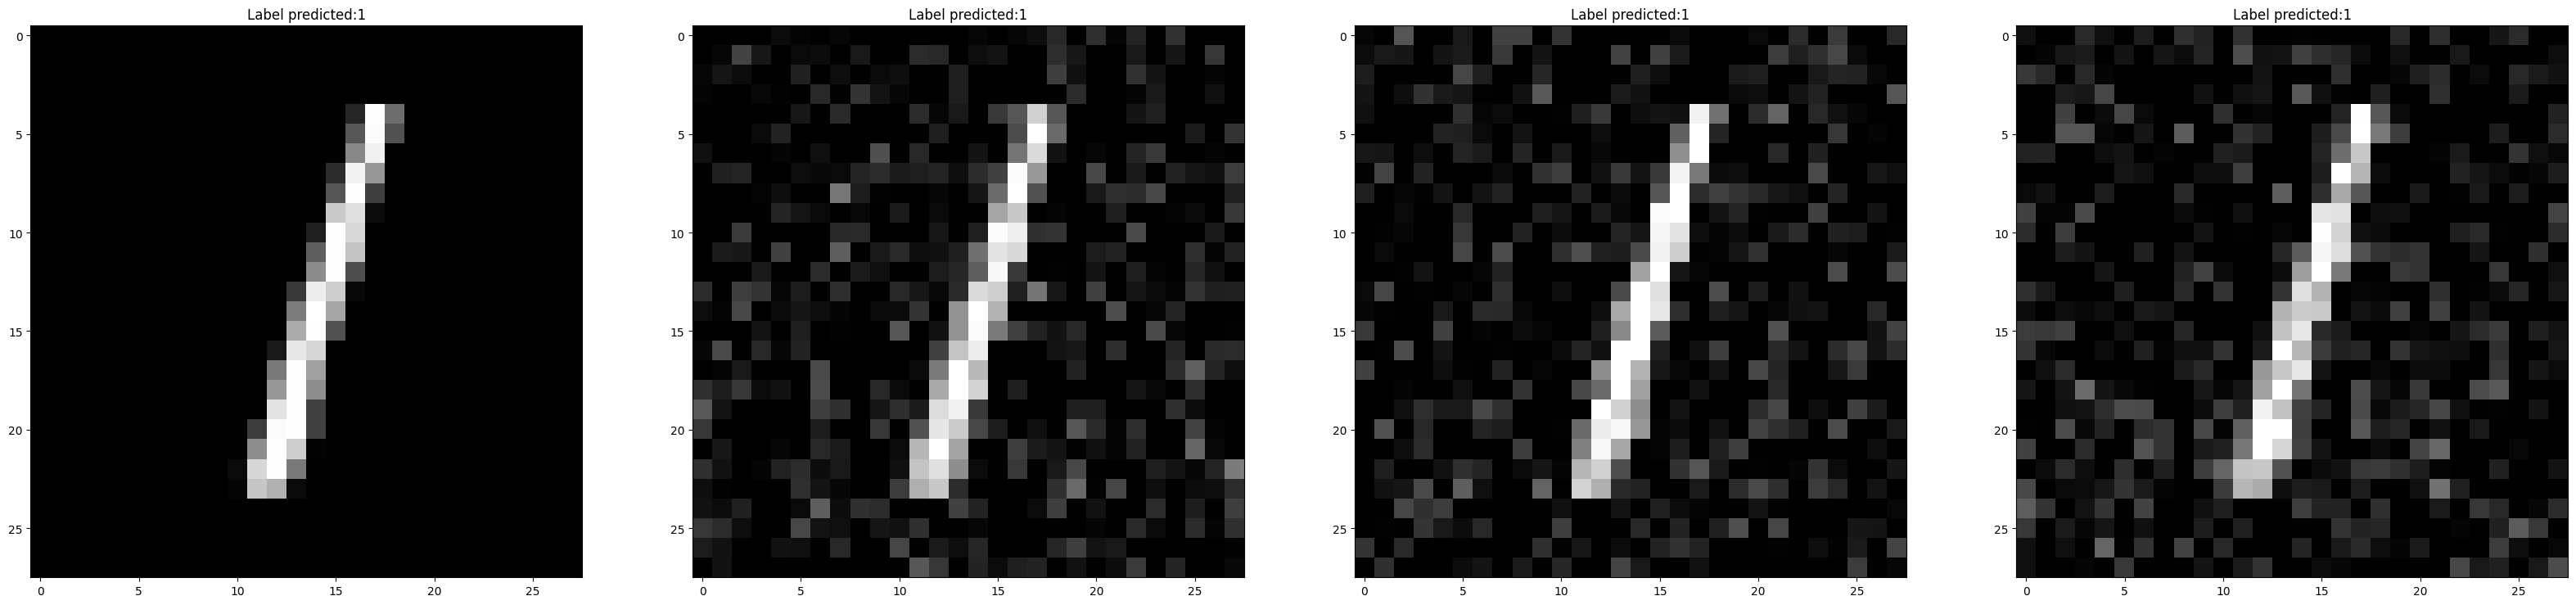

fosm_est:tensor([6.2585e-07], device='cuda:0')
form est:tensor([0.], device='cuda:0')
form_naif:0.0
Starting IS estimation 3/3, with model: dnn4_mnist, img_idx:2,eps:0.18, N: 400000: batch_size: 20000: stepsize: 0.01: num_iter: 20


100%|██████████| 4/4 [00:01<00:00,  3.66it/s]


mean est:0.00014411017127713421, std est:0.0001556433311119984
mean calls:400009.0
std. re.:7494.475572626458
std. rel. adj.:2997857679.330737
method_name:IS


In [10]:
i=0
N_ref= int(4E5)
n_rep_ref=400
search_method='fmna'
p_ref, dict_out=run_est.run_est(model='dnn4', X=None, y=None,model_name='release_model', dataset_name='mnist', device=device, epsilon_range=[0.18,], 
                                
                                
                                n_rep=4,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=False, repeat_exp=True, sigma_noise=0.15,
                plot_errorbar=False,alpha_CI=0.01,batch_size=int(2E4),plot_example_img=True,update_aggr_res=True ,
                steps=20,save_mpp=False, save_rare=False,fit_sigma_noise=False
                ,save_weights=False, np_seed=0,torch_seed=0,random_seed=0,
                method='is', N_range=[ N_ref], input_start=i, input_stop=i+3,noise_dist='gaussian',alt_functions=True)

         
exp_config_is=dict_out['exp_config']
p_refs_gaussian= dict_out['p_ests']
#weights = dict_out['weights_list'][0] if len(dict_out['weights_list']) >0 else None
#normalized_weights = weights/weights.sum() if weights is not None else None

Using real uniform distribution (no atoms)
input_shape:(1, 28, 28)
Current data index: 0
Current data index: 0
with parameters in {'N_range': [400000], 'batch_size_range': [20000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:0,eps:0.18
Current data index: 0


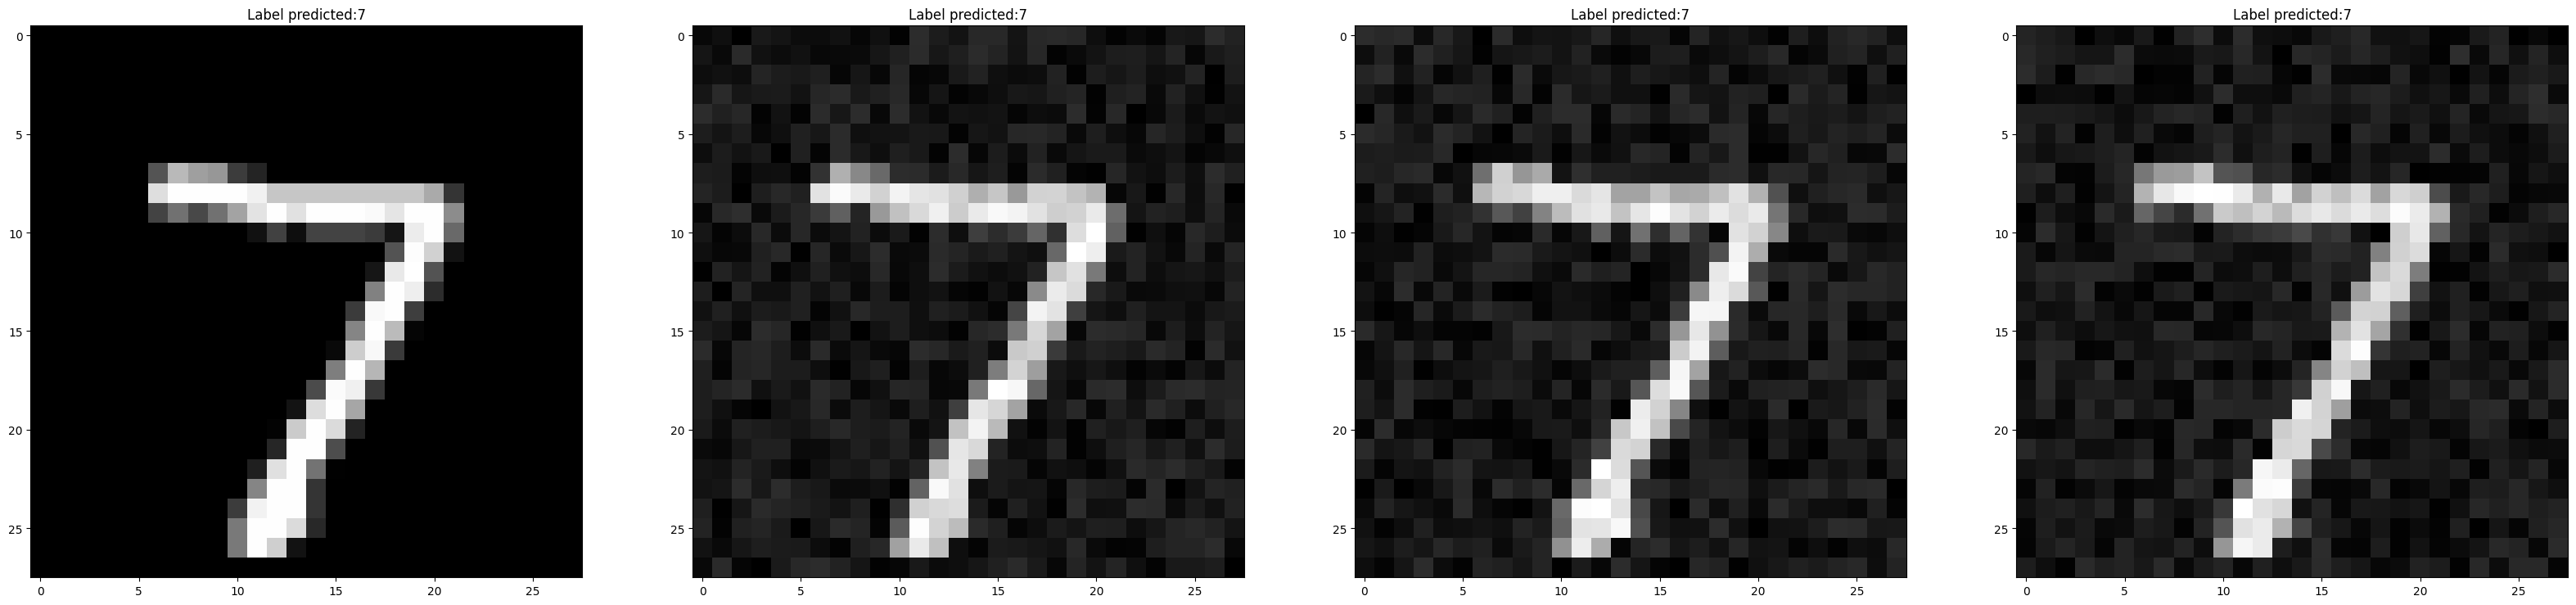

fosm_est:tensor([0.0011], device='cuda:0')
form est:tensor([0.0011], device='cuda:0')
form_naif:0.0008831918239593506
Starting IS estimation 1/3, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 400000: batch_size: 20000: stepsize: 0.01: num_iter: 20


100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


mean est:9.92495074569888e-06, std est:9.015074511024466e-08
mean calls:400007.0
std. re.:915.1928114774507
std. rel. adj.:366083530.94066066
method_name:IS
method: IS, input_index:1,eps:0.18
Current data index: 1
Current data index: 1


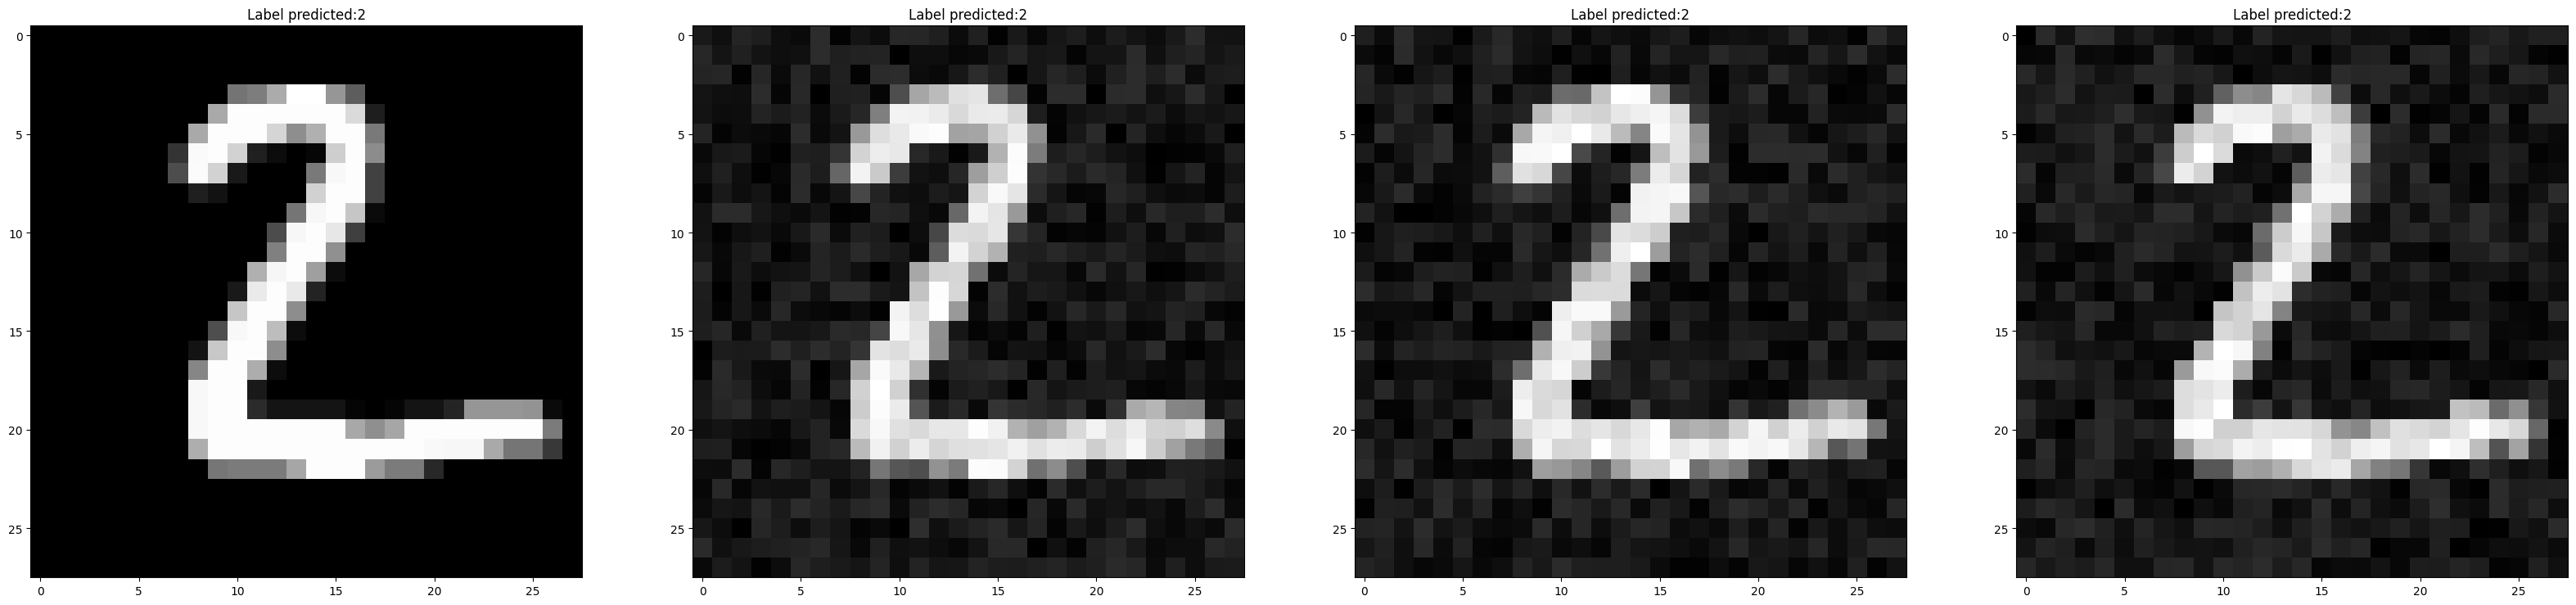

fosm_est:tensor([4.8816e-05], device='cuda:0')
form est:tensor([3.4124e-05], device='cuda:0')
form_naif:6.967782974243164e-05
Starting IS estimation 2/3, with model: dnn4_mnist, img_idx:1,eps:0.18, N: 400000: batch_size: 20000: stepsize: 0.01: num_iter: 20


100%|██████████| 4/4 [00:01<00:00,  2.91it/s]


mean est:1.673484861797192e-08, std est:2.874521190507783e-10
mean calls:400007.0
std. re.:1026412.513985207
std. rel. adj.:410572190481.68066
method_name:IS
method: IS, input_index:2,eps:0.18
Current data index: 2
Current data index: 2


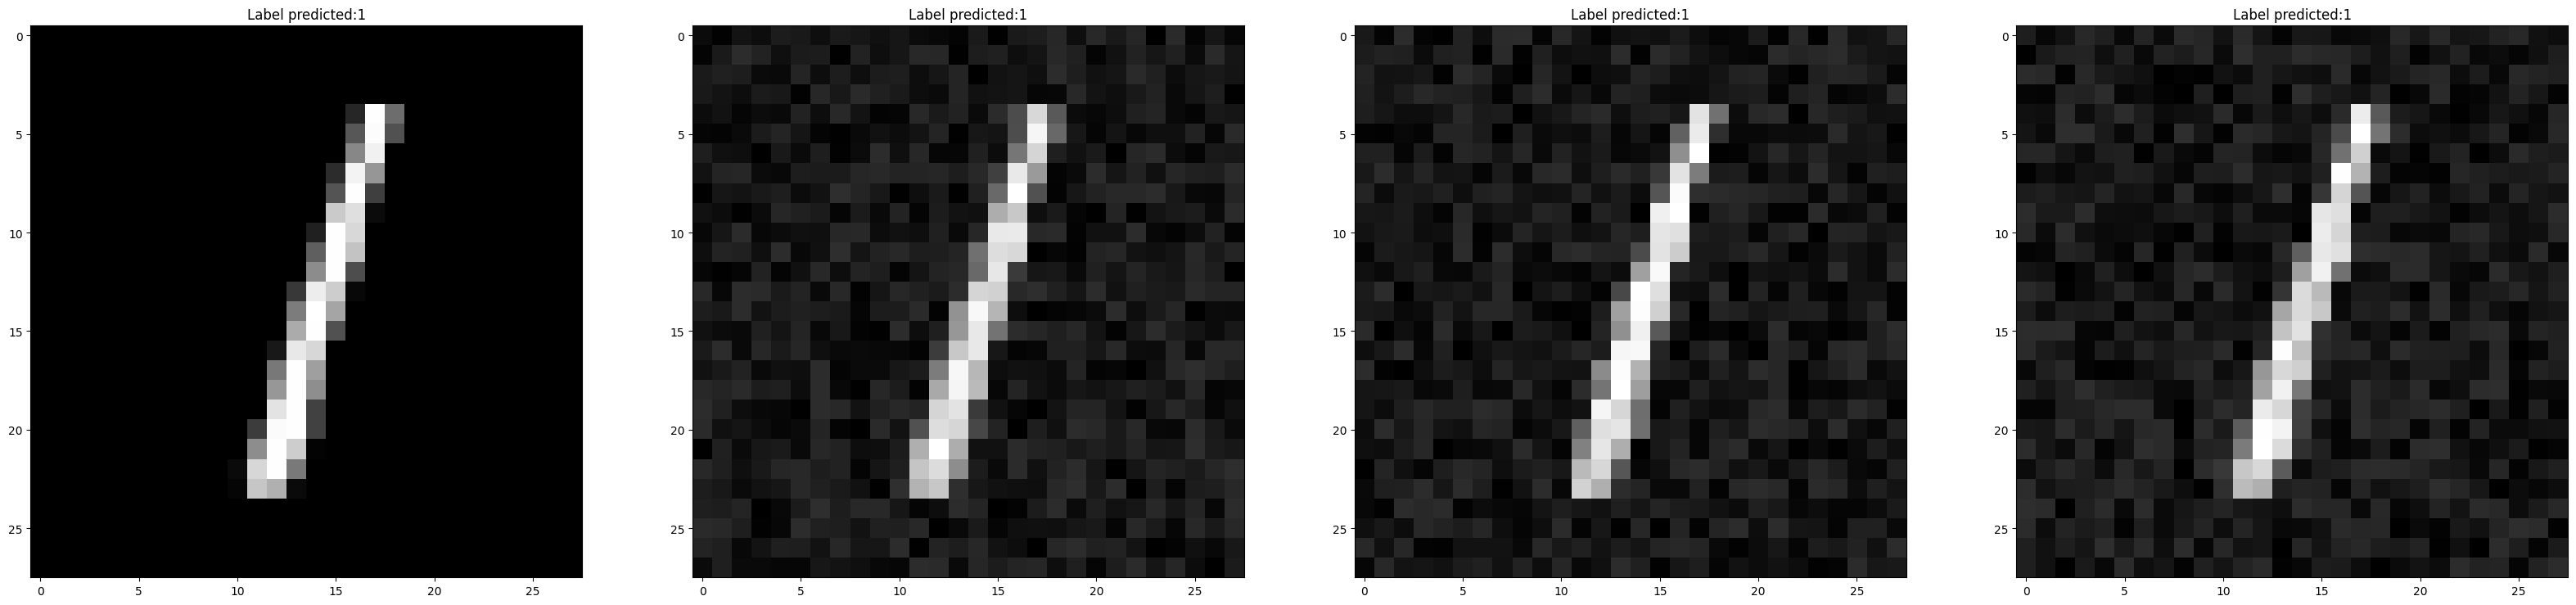

fosm_est:tensor([0.0403], device='cuda:0')
form est:tensor([0.0400], device='cuda:0')
form_naif:0.0411226749420166
Starting IS estimation 3/3, with model: dnn4_mnist, img_idx:2,eps:0.18, N: 400000: batch_size: 20000: stepsize: 0.01: num_iter: 20


100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


mean est:0.008144983556121588, std est:2.965788639679519e-05
mean calls:400007.0
std. re.:0.44705378232126175
std. rel. adj.:178824.64230498095
method_name:IS


In [12]:
i=0
N_ref= int(4E5)
search_method='fmna'
p_ref, dict_out=run_est.run_est(model='dnn4', X=None, y=None,model_name='release_model', dataset_name='mnist', device=device, epsilon_range=[0.18,],
                                n_rep=4,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=False, repeat_exp=True, sigma_noise=0.15,
                plot_errorbar=False,alpha_CI=0.01,batch_size=int(2E4),plot_example_img=True,update_aggr_res=True ,
                steps=20,save_mpp=False, save_rare=False,fit_sigma_noise=False
                ,save_weights=False, np_seed=0,torch_seed=0,random_seed=0,
                method='is', N_range=[ N_ref], input_start=i, input_stop=i+3,noise_dist='uniform',alt_functions=True)
p_refs_uniform= dict_out['p_ests']       
exp_config_is=dict_out['exp_config']
#weights = dict_out['weights_list'][0] if len(dict_out['weights_list']) >0 else None
#normalized_weights = weights/weights.sum() if weights is not None else None

Using real uniform distribution (no atoms)
input_shape:(1, 28, 28)
Current data index: 0
Current data index: 0
with parameters in {'N_range': [100, 1000, 10000, 50000, 100000], 'batch_size_range': [20000], 'stepsize_range': [0.95], 'num_iter_range': [20]}
method: IS, input_index:0,eps:0.18
Current data index: 0
fosm_est:tensor([0.0011], device='cuda:0')
form est:tensor([0.0011], device='cuda:0')
form_naif:0.0008831918239593506
Starting IS estimation 1/15, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 100: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:01<00:00, 20.78it/s]


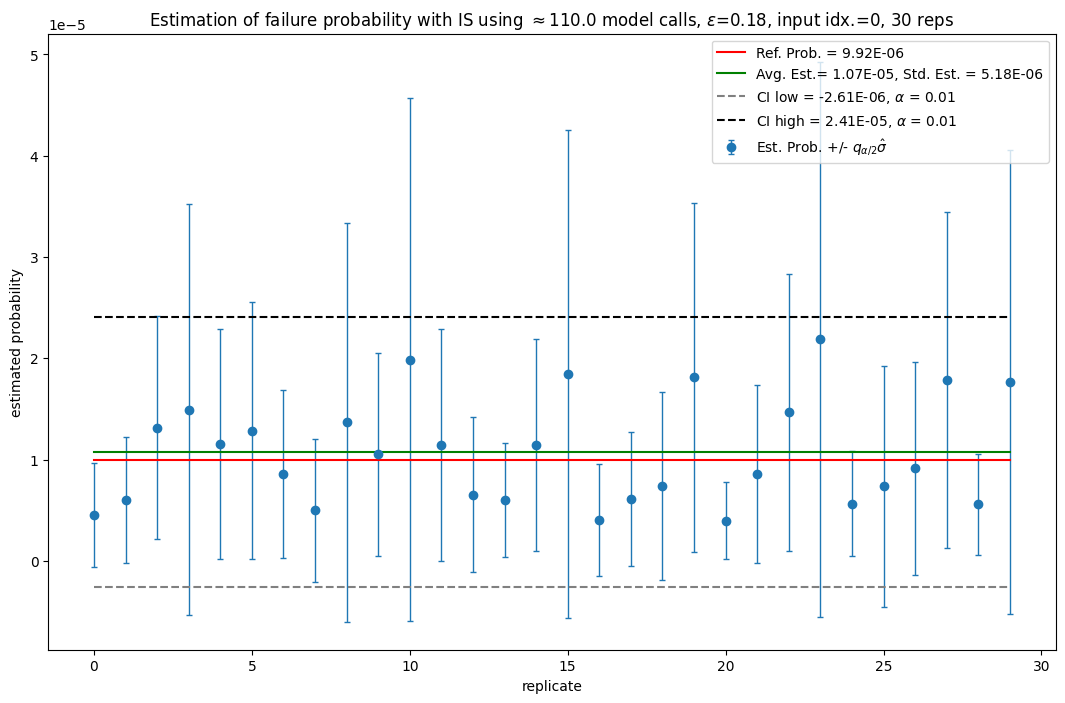

mean est:1.0742366430349649e-05, std est:5.182747587521539e-06
mean calls:110.0
std. re.:44911.76608313936
std. rel. adj.:4940294.2691453295
mean rel. error:0.4485355668984592
std rel. error:0.27979511961561476
stat performance (per 1k calls):0.030777463157717625
method_name:IS
Starting IS estimation 2/15, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 1000: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:01<00:00, 26.78it/s]


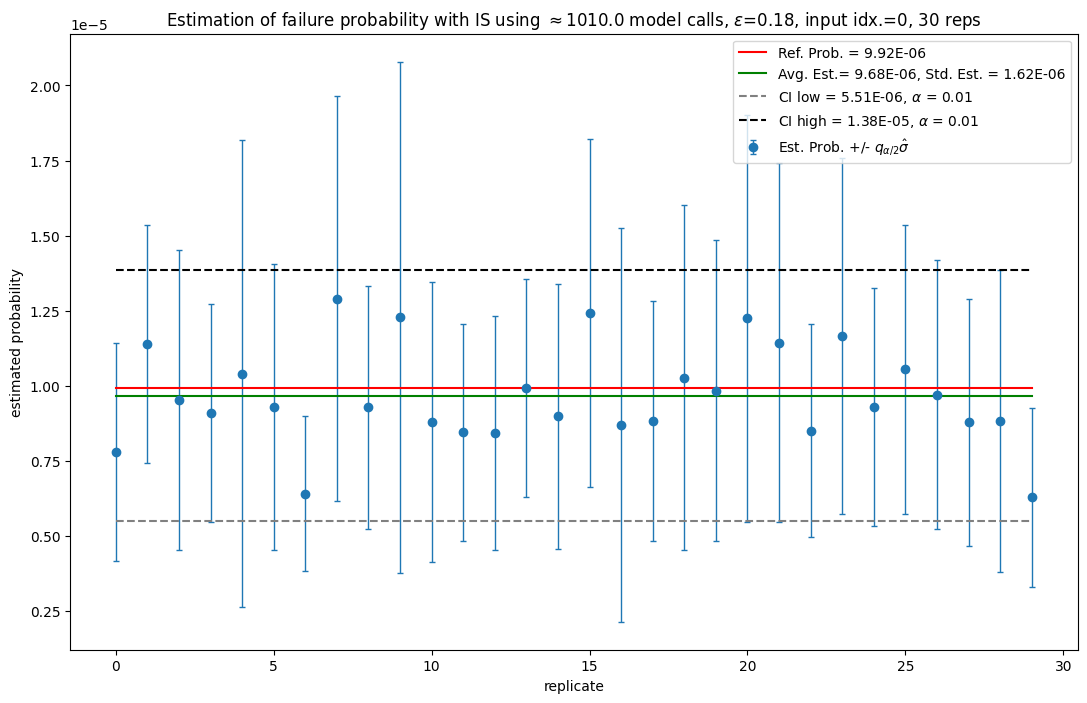

mean est:9.675164907700188e-06, std est:1.6175898874453708e-06
mean calls:1010.0
std. re.:17280.31564460291
std. rel. adj.:17453118.80104894
mean rel. error:0.13462000210231012
std rel. error:0.09525775552921682
stat performance (per 1k calls):0.09621033308450899
method_name:IS
Starting IS estimation 3/15, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 10000: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:01<00:00, 19.71it/s]


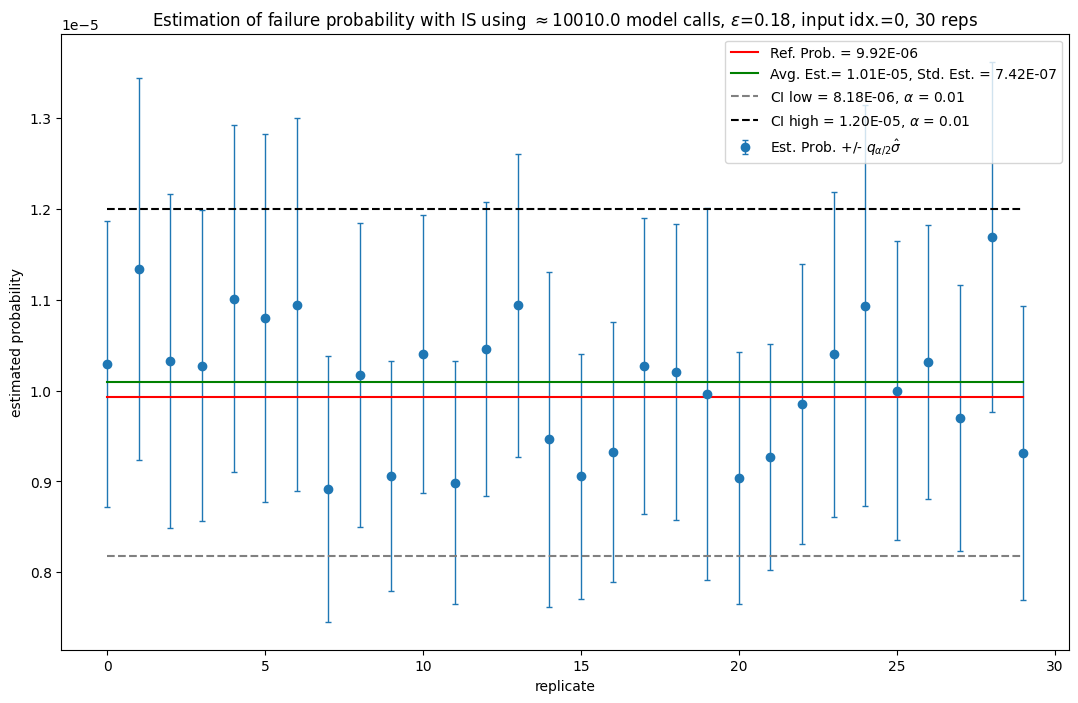

mean est:1.0089921882657412e-05, std est:7.41594985477051e-07
mean calls:10010.0
std. re.:7284.356240317401
std. rel. adj.:72916405.96557719
mean rel. error:0.0649305556112379
std rel. error:0.04053921188249626
stat performance (per 1k calls):0.4057975109437876
method_name:IS
Starting IS estimation 4/15, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 50000: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:03<00:00,  9.18it/s]


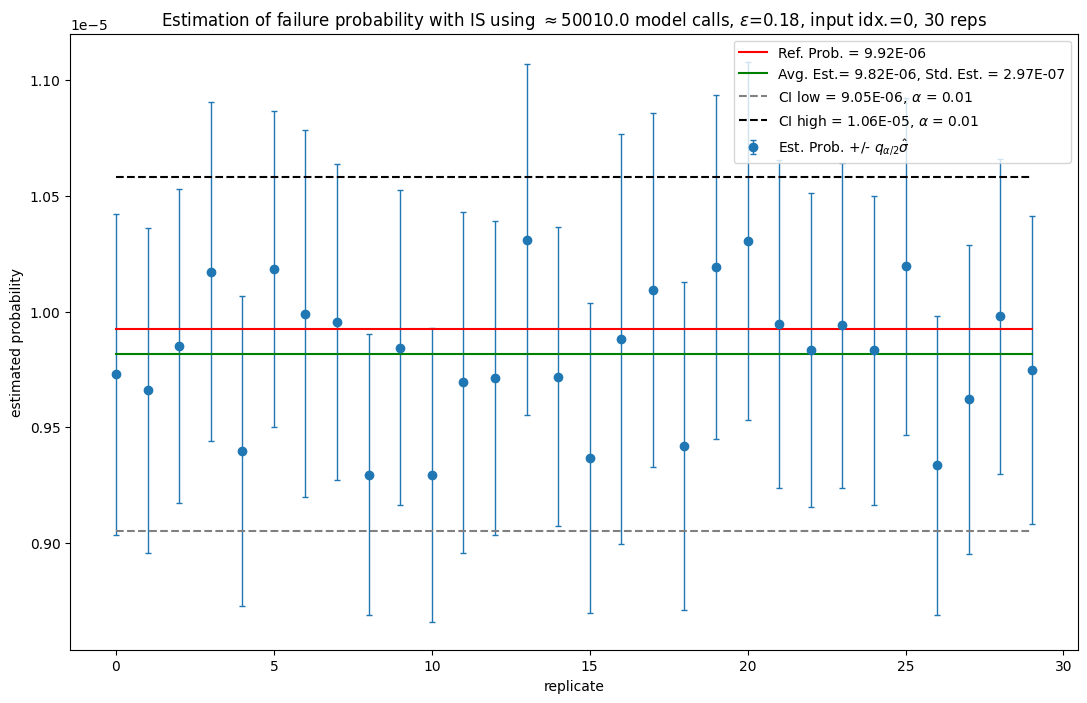

mean est:9.81670185259039e-06, std est:2.968033541146677e-07
mean calls:50010.0
std. re.:3079.906996843134
std. rel. adj.:154026148.91212514
mean rel. error:0.025450166029425396
std rel. error:0.01911913393400792
stat performance (per 1k calls):0.956147888039736
method_name:IS
Starting IS estimation 5/15, with model: dnn4_mnist, img_idx:0,eps:0.18, N: 100000: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:05<00:00,  5.25it/s]


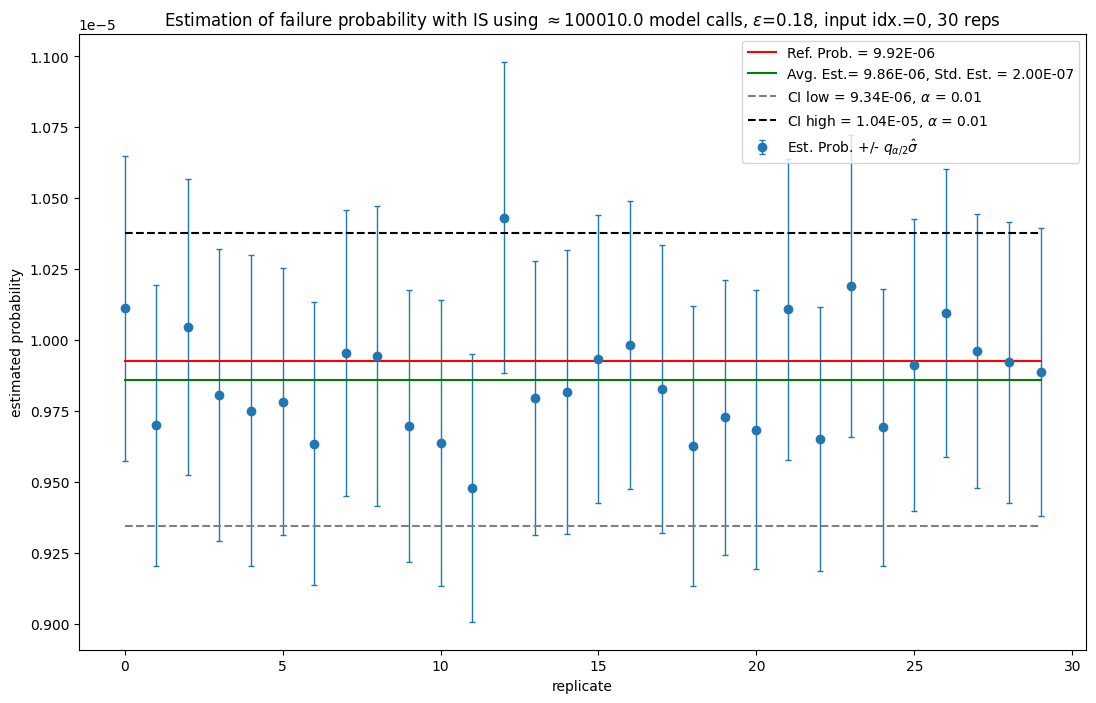

mean est:9.860185764409835e-06, std est:2.0039379954085852e-07
mean calls:100010.0
std. re.:2061.1712950288043
std. rel. adj.:206137741.2158307
mean rel. error:0.017195436604869215
std rel. error:0.01243268403463361
stat performance (per 1k calls):1.2433927303037073
method_name:IS
method: IS, input_index:1,eps:0.18
Current data index: 1
Current data index: 1
fosm_est:tensor([4.8816e-05], device='cuda:0')
form est:tensor([3.4124e-05], device='cuda:0')
form_naif:6.967782974243164e-05
Starting IS estimation 6/15, with model: dnn4_mnist, img_idx:1,eps:0.18, N: 100: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:00<00:00, 57.43it/s]


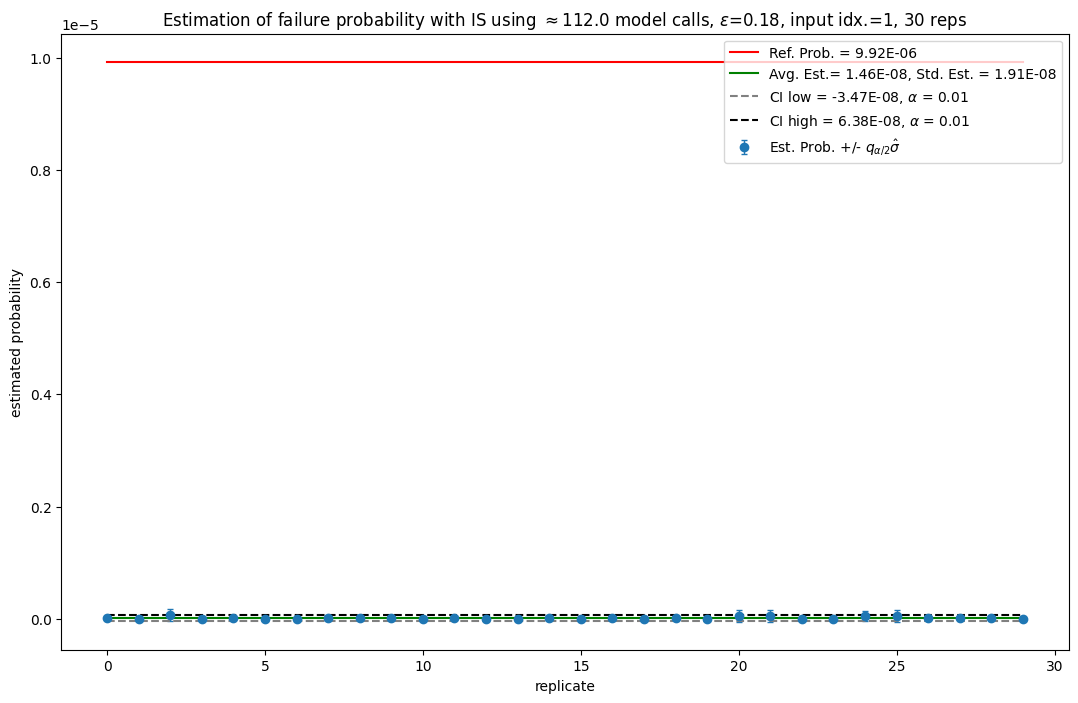

mean est:1.4552248497658645e-08, std est:1.910472313090654e-08
mean calls:112.0
std. re.:90215371.88920367
std. rel. adj.:10104121651.59081
mean rel. error:0.9985337712125205
std rel. error:0.0019249186842751707
stat performance (per 1k calls):0.00021559089263881913
method_name:IS
Starting IS estimation 7/15, with model: dnn4_mnist, img_idx:1,eps:0.18, N: 1000: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:00<00:00, 47.74it/s]


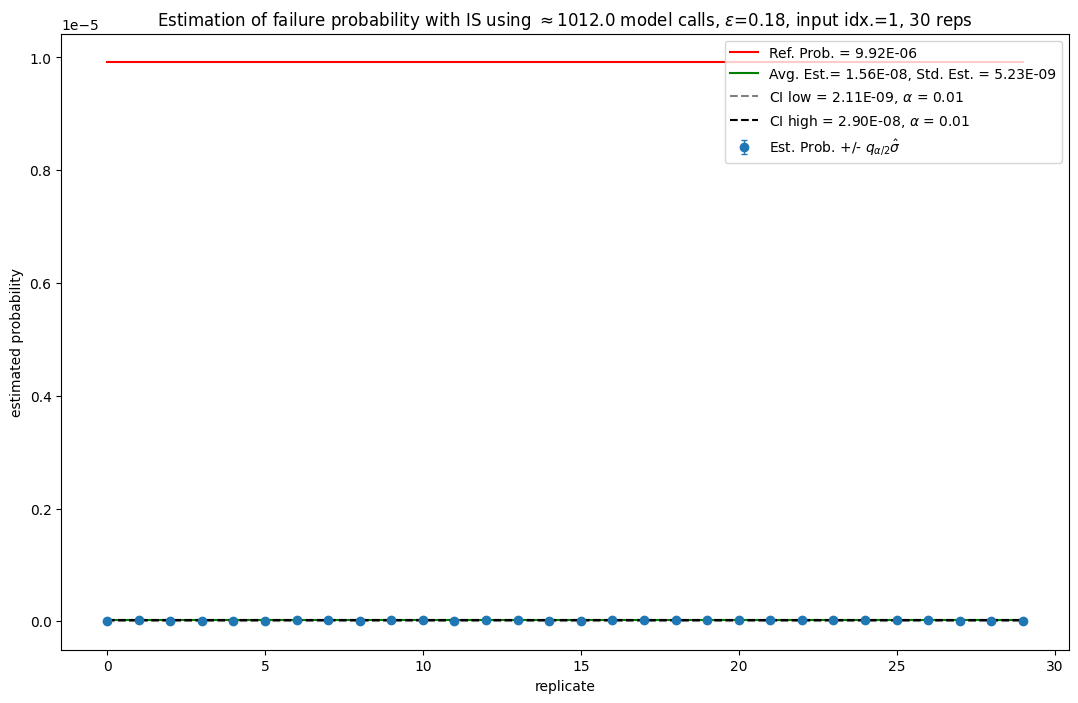

mean est:1.5580473341122078e-08, std est:5.228140599890437e-09
mean calls:1012.0
std. re.:21537037.455597136
std. rel. adj.:21795481905.0643
mean rel. error:0.9984301712179403
std rel. error:0.0005267674101210176
stat performance (per 1k calls):0.0005330886190424698
method_name:IS
Starting IS estimation 8/15, with model: dnn4_mnist, img_idx:1,eps:0.18, N: 10000: batch_size: 20000: stepsize: 0.95: num_iter: 20


100%|██████████| 30/30 [00:00<00:00, 31.68it/s]


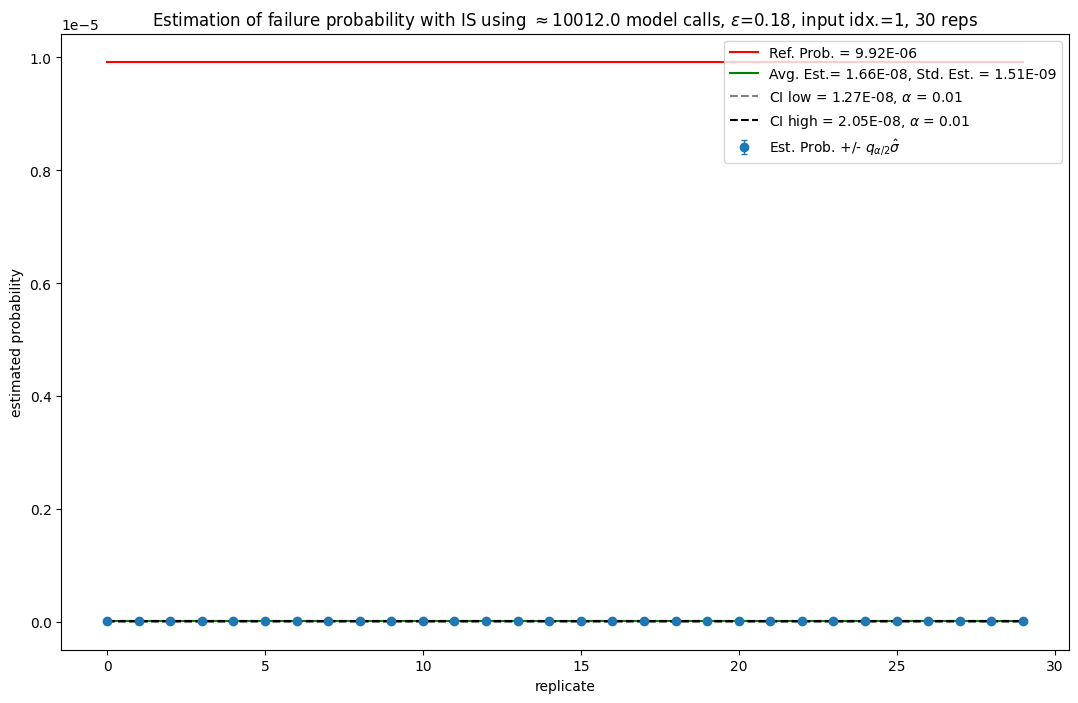

mean est:1.65736331325661e-08, std est:1.5144304949730198e-09
mean calls:10012.0
std. re.:5513328.929867516
std. rel. adj.:55199449245.83357
mean rel. error:0.9983301042436156
std rel. error:0.00015258821265479367
stat performance (per 1k calls):0.0015277131850997944
method_name:IS
Starting IS estimation 9/15, with model: dnn4_mnist, img_idx:1,eps:0.18, N: 50000: batch_size: 20000: stepsize: 0.95: num_iter: 20


  0%|          | 0/30 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [14]:
i=0
N_IS= int(1E4)
search_method='hlrf'
N_range=[100,1000,10000,50000,100000]
p_est, dict_out=run_est.run_est(model="dnn4", X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=30,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=False, repeat_exp=False,sigma_noise=0.15,
                plot_errorbar=True,alpha_CI=0.01,batch_size=int(2E4),plot_example_img=False,update_aggr_res=False ,
                steps=20,save_mpp=True, save_rare=False,save_weights=True,stepsize=0.95,
                p_ref = p_refs_uniform, np_seed=0,torch_seed=0,random_seed=0,
                method='is', N_range=N_range, input_start=i, input_stop=i+3,noise_dist='uniform',alt_functions=True)
                 

mpp = dict_out['mpp']
weights = dict_out['weights_list'][0]
normalized_weights = weights/weights.sum()

In [ ]:
i=0
N_IS= int(1E4)
search_method='hlrf'
N_range=[100,1000,10000,50000,100000]
p_est, dict_out=run_est.run_est(model="dnn4", X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=n_rep_exp,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=False, repeat_exp=False,sigma_noise=0.15,
                plot_errorbar=True,alpha_CI=0.01,batch_size=int(2E4),plot_example_img=False,update_aggr_res=False ,
                steps=20,save_mpp=True, save_rare=False,save_weights=True,stepsize=0.95,
                p_ref=p_refs_gaussian, np_seed=0,torch_seed=0,random_seed=0,
                method='is', N_range=N_range, input_start=i, input_stop=i+3,noise_dist='gaussian',alt_functions=True)
                 
p_ref=p_est
mpp = dict_out['mpp']
weights = dict_out['weights_list'][0]
normalized_weights = weights/weights.sum()

In [ ]:
i=0
rho=0.1

p_est_ce,dict_out_ce = run_est.run_est(model="dnn4", X=None, y=None,dataset_name='mnist', device=device, 
                                       epsilon_range=[0.18],  p_ref=p_ref,
                                       n_rep=200,update_aggr_res=True,
                real_uniform=True, num_iter=100, verbose=0, repeat_exp=True, rho=rho,estimate_var=False,save_weights=True,
                save_sigma=True, p_ref = p_refs_uniform,
                t_max=10, plot_errorbar=True,alpha_CI=0.01,torch_seed=-1,np_seed=0,random_seed=0,sigma_noise=0.15,
                steps=50, save_theta=False,save_thetas=False,N_ce=None,batch_size=int(2E4),plot_example_img=False,
                method='ce_is', N_range=[int(1e2), int(1e3),int(1e4),int(5e4),int(1e5)], input_start=i, input_stop=i+3,noise_dist='uniform',alt_functions=True)

# theta = dict_out_ce['theta']
# thetas = dict_out_ce['thetas']
# sigma = dict_out_ce['sigma']
# weights = dict_out_ce['weights_list'][0]
# normalized_weights = weights/weights.sum()
# sns.histplot( data= normalized_weights,log_scale=True, )

In [ ]:
i=0
rho=0.1
N_range=[int(1e2), int(1e3),int(1e4),int(5e4),int(1e5)]
p_est_ce,dict_out_ce = run_est.run_est(model="dnn4", X=None, y=None,dataset_name='mnist', device=device, 
                                       epsilon_range=[0.18],  p_ref=p_ref,
                                       n_rep=200,update_aggr_res=True,
                real_uniform=True, num_iter=100, verbose=0, repeat_exp=True, rho=rho,estimate_var=False,save_weights=True,
                save_sigma=True,
                t_max=10, plot_errorbar=True,alpha_CI=0.01,torch_seed=-1,np_seed=0,random_seed=0,sigma_noise=0.15,
                steps=50, save_theta=False,save_thetas=False,N_ce=None,batch_size=int(2E4),plot_example_img=False,
                method='ce_is', N_range=[int(1e2), int(1e3),int(1e4),int(5e4),int(1e5)], input_start=i, input_stop=i+3,noise_dist='gaussian',alt_functions=True)

# theta = dict_out_ce['theta']
# thetas = dict_out_ce['thetas']
# sigma = dict_out_ce['sigma']
# weights = dict_out_ce['weights_list'][0]
# normalized_weights = weights/weights.sum()
# sns.histplot( data= normalized_weights,log_scale=True, )

In [ ]:
i=0
search_method='fmna'

p_est_fmna, dict_out=run_est.run_est(model='dnn4', X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18],
                                    n_rep=200, p_ref=p_ref,sigma_noise=0.15,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=0,steps=20,save_weights=True, alpha_CI=0.01,
                batch_size=1000, plot_errorbar=True, repeat_exp=False,save_mpp=True,
                method='is', N_range=N_range, input_start=i, input_stop=i+3,noise_dist='uniform',alt_functions=True)


In [ ]:
i=0
search_method='fmna'
N_range_ls = [int(5e1),int(1e2),int(5e2),int(1e3),int(1e4),]
p_est_fmna, dict_out=run_est.run_est(model='dnn4', X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18],
                                    n_rep=200, p_ref=p_ref,sigma_noise=0.15,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=0,steps=20,save_weights=True, alpha_CI=0.01,
                batch_size=1000, plot_errorbar=True, repeat_exp=False,save_mpp=True,
                method='ls', N_range=N_range_ls, input_start=i, input_stop=i+3,noise_dist='uniform',alt_functions=True)


In [ ]:
i=0
search_method='fmna'
N_range_ls = [int(5e1),int(1e2),int(5e2),int(1e3),int(1e4),]
p_est_fmna, dict_out=run_est.run_est(model='dnn4', X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18],
                                    n_rep=200, p_ref=p_ref,sigma_noise=0.15,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=0,steps=20,save_weights=True, alpha_CI=0.01,
                batch_size=1000, plot_errorbar=True, repeat_exp=False,save_mpp=True,
                method='ls', N_range=N_range_ls, input_start=i, input_stop=i+3,noise_dist='gaussian',alt_functions=True)

In [ ]:
i=0
search_method='fmna'

p_est_fmna, dict_out=run_est.run_est(model='dnn4', X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18],
                                    n_rep=200, p_ref=p_ref,sigma_noise=0.15,
                real_uniform=True, search_method=search_method,num_iter=20, verbose=0,steps=20,save_weights=True, alpha_CI=0.01,
                batch_size=1000, plot_errorbar=True, repeat_exp=False,save_mpp=True,
                method='is', N_range=N_range, input_start=i, input_stop=i+3,noise_dist='uniform',alt_functions=True)


In [ ]:
p_est_mala, dict_out=run_est.run_est(model='dnn4', X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=200,
                                    real_uniform=True, p_ref=p_ref, adapt_func='simp_ess',alpha_range=[0.25], alpha_CI=0.01,
                                    sigma_noise=0.15,
                method='mala2', N_range=[32,64,128,256, 512,800],T_range=[1,5],ess_alpha=0.75, input_start=i,track_accept=False, input_stop=i+3,
                noise_dist='uniform',alt_functions=True)
    

In [ ]:
p_est_mala, dict_out=run_est.run_est(model='dnn4', X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=200,
                                    real_uniform=True, p_ref=p_ref, adapt_func='simp_ess',alpha_range=[0.25], alpha_CI=0.01,
                                    sigma_noise=0.15,plot_errorbar=True,
                method='mala2', N_range=[32,64,128,256, 512,800],T_range=[1,5],ess_alpha=0.75, input_start=i,track_accept=False, input_stop=i+3
                ,noise_dist='gaussian',alt_functions=True)
    

In [ ]:
p_est_amls, dict_out=run_est.run_est(model="dnn4", X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=200,
                                    real_uniform=True, p_ref=p_ref, save_rare=True,sigma_noise=0.15,
                method='amls_batch', N_range=[64,128,256,512,1024 ],ratio=0.1,T_range=[5,10], input_start=i,track_accept=True, input_stop=i+3,
                noise_dist='gaussian',alt_functions=True,
                plot_errorbar=True,alpha_CI=0.01, )

In [ ]:
p_est_amls, dict_out=run_est.run_est(model="dnn4", X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=200,
                                    real_uniform=True, p_ref=p_ref, save_rare=True,sigma_noise=0.15,
                method='amls_batch', N_range=[64,128,256,512,1024 ],ratio=0.1,T_range=[5,10], input_start=i,track_accept=True, input_stop=i+3,
                noise_dist='uniform',alt_functions=True,
                plot_errorbar=True,alpha_CI=0.01, )

In [189]:
norm_fmna_lists = []
norm_hlrf_lists = []
G_fmna_mpp_lists = []
G_hlrf_mpp_lists = []
auto_cos_fmna_lists = []
auto_cos_hlrf_lists = []
cosine_similarity_lists = []
form_fmna_lists = []
form_hlrf_lists = []
p_is_fmnas = []
std_p_fmnas = []
p_is_hlrfs = []
std_p_is_hlrfs = []

times_fmna = []
times_hlrf = []
p_malas = []
p_amlss = []
p_ls = []
times_hlrf = []
times_mala = []
times_amlss = []
std_p_malas = []
std_p_fmnas = []
std_p_hlrfs = []
std_p_amlss = []
std_p_ls = []
n_rep=100
for i in range(10):
    
    # p_est_mala, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=n_rep,
    #                                 real_uniform=True, p_ref=p_ref, adapt_func='simp_ess',alpha_range=[0.25], alpha_CI=0.01,
    #                                 sigma_noise=0.2,
    #             method='mala2', N_range=[750],T_range=[3],ess_alpha=0.8, input_start=i,track_accept=False, input_stop=i+1,noise_dist='gaussian',alt_functions=True)
    
    # std_p_mala = dict_out['results_df']['std_est'] 
    # p_malas.append(p_est_mala)
    # std_p_malas.append(std_p_mala)
    # time_mala = dict_out['results_df']['mean_time'].values[0]
    # times_mala.append(time_mala)
    
    # p_est_amls, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=n_rep,
    #                                 real_uniform=True, p_ref=p_ref, save_rare=True,sigma_noise=0.2,
    #             method='amls_batch', N=4096,ratio=0.1,T_range=[5], input_start=i,track_accept=True, input_stop=i+1,noise_dist='gaussian',alt_functions=True,
    #             plot_errorbar=True,alpha_CI=0.01, )
    # p_amlss.append(p_est_amls)
    # std_p_amlss.append(dict_out['results_df']['std_est'])
    # times_amlss.append(dict_out['results_df']['mean_time'].values[0])
    
    search_method='fmna'
    p_est_fmna, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.2],
                                        n_rep=n_rep, p_ref=p_ref,
                    real_uniform=True, search_method=search_method,num_iter=20, verbose=0,steps=100,save_weights=True, alpha_CI=0.01,
                    batch_size=1000, plot_errorbar=False, repeat_exp=False,save_mpp=True, sigma_noise=0.2,
                    method='is', N_range=[int(1E4)], input_start=i, input_stop=i+1,noise_dist='gaussian',alt_functions=True)
    weights_mpp= dict_out['weights_list'][0]
    mpp = dict_out['mpp']
    std_est = dict_out['results_df']['std_est'].values[0]
    std_p_fmnas.append(std_est)
    is_config = dict_out['method_config']
    exp_config_is = dict_out['exp_config']
    mpp_fmna = torch.tensor(mpp).to(device)
    p_is_fmnas.append(p_est_fmna)
    time_fmna = dict_out['results_df']['mean_time'].values[0]   
    times_fmna.append(time_fmna)
    search_method='hlrf'
    norm_fmna = torch.norm(mpp_fmna)
    form_fmna = exp_config_is.normal_dist.cdf(-norm_fmna)
    form_fmna_lists.append(form_fmna.cpu().numpy())

    p_est_hl_rf, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.2],
                                        n_rep=n_rep, p_ref=p_ref,stepsize=0.8,
                    real_uniform=True, search_method=search_method,num_iter=20, verbose=0,steps=100,save_weights=True, alpha_CI=0.01,
                    batch_size=1000, plot_errorbar=False, repeat_exp=False,save_mpp=True,sigma_noise=0.2,
                    method='is', N_range=[int(1E4)], input_start=i, input_stop=i+1,noise_dist='gaussian',alt_functions=True)
    weights_mpp= dict_out['weights_list'][0]
    time_hlrf = dict_out['results_df']['mean_time'].values[0]
    times_hlrf.append(time_hlrf)
    mpp = dict_out['mpp']
    std_est = dict_out['results_df']['std_est'].values[0]
    std_p_hlrfs.append(std_est)
    is_config = dict_out['method_config']
    mpp_hlrf = torch.tensor(mpp).to(device)
    exp_config_is = dict_out['exp_config']
    p_is_hlrfs.append(p_est_hl_rf)
    form_hlrf = exp_config_is.normal_dist.cdf(-torch.norm(mpp_hlrf))
    form_hlrf_lists.append(form_hlrf.cpu().numpy())
    #print(f"fmna_mpp.norm(): {torch.norm(mpp_fmna)}")
    #print(f"hlrf_mpp.norm(): {torch.norm(mpp_hlrf)}")
    norm_fmna_lists.append(torch.norm(mpp_fmna).cpu().numpy())
    norm_hlrf_lists.append(torch.norm(mpp_hlrf).cpu().numpy())
    G_fmna_mpp = exp_config_is.G_alt(mpp_fmna)
    G_hlrf_mpp = exp_config_is.G_alt(mpp_hlrf)
    
    G_fmna_mpp_lists.append(G_fmna_mpp.cpu().numpy())
    G_hlrf_mpp_lists.append(G_hlrf_mpp.cpu().numpy())
    
    
    #print(f"fmna_mpp.G(): {G_fmna_mpp}")
    #print(f"hlrf_mpp.G(): {G_hlrf_mpp}")
    #print(f"cosine similarity: {torch.cosine_similarity(mpp_fmna,mpp_hlrf)}")
    cosine_similarity_lists.append(torch.cosine_similarity(mpp_fmna,mpp_hlrf).cpu().numpy())
    grad_fmna_mpp = exp_config_is.gradG_alt(mpp_fmna)[0]
    grad_hlrf_mpp = exp_config_is.gradG_alt(mpp_hlrf)[0]
    #print(f"fmna auto cosine similarity: {torch.cosine_similarity(grad_fmna_mpp,mpp_fmna)}")
    #print(f"hlrf auto cosine similarity: {torch.cosine_similarity(grad_hlrf_mpp,mpp_hlrf)}")
    auto_cos_fmna_lists.append(torch.cosine_similarity(grad_fmna_mpp,mpp_fmna).cpu().numpy())
    auto_cos_hlrf_lists.append(torch.cosine_similarity(grad_hlrf_mpp,mpp_hlrf).cpu().numpy())


Current data index: 0
Current data index: 0
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:0,eps:0.2
Current data index: 0
Starting IS estimation 1/1, with model: mnist_model, img_idx:0,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:13<00:00,  7.16it/s]


mean est:0.002487303736852482, std est:0.0007651807787014894
mean calls:10005.0
std. re.:123.68197379247724
std. rel. adj.:1237438.1477937347
mean rel. error:12294.086701801487
std rel. error:3782.3945171215573
stat performance (per 1k calls):37842.857143801186
method_name:IS
Current data index: 0
Current data index: 0
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:0,eps:0.2
Current data index: 0
Starting IS estimation 1/1, with model: mnist_model, img_idx:0,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 39.00it/s]


mean est:0.0029082289070356637, std est:0.005419406787048448
mean calls:10012.0
std. re.:640.7587966253533
std. rel. adj.:6415277.071813037
mean rel. error:14374.778088902354
std rel. error:26788.87798536843
stat performance (per 1k calls):268210.2463895087
method_name:IS
Current data index: 1
Current data index: 1
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:1,eps:0.2
Current data index: 1
Starting IS estimation 1/1, with model: mnist_model, img_idx:1,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:16<00:00,  6.18it/s]


mean est:6.516310907045409e-07, std est:4.375265562952177e-07
mean calls:10008.0
std. re.:1030388.0749295962
std. rel. adj.:10312123853.8954
mean rel. error:2.2211026900720525
std rel. error:2.1627543368698663
stat performance (per 1k calls):21.64484540339362
method_name:IS
Current data index: 1
Current data index: 1
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:1,eps:0.2
Current data index: 1
Starting IS estimation 1/1, with model: mnist_model, img_idx:1,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 43.48it/s]


mean est:5.188468072958585e-07, std est:3.3560288658054987e-07
mean calls:10011.0
std. re.:1246658.1779136788
std. rel. adj.:12480295019.093838
mean rel. error:1.5672688310979463
std rel. error:1.6565346930712008
stat performance (per 1k calls):16.58356881233579
method_name:IS
Current data index: 2
Current data index: 2
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:2,eps:0.2
Current data index: 2
Starting IS estimation 1/1, with model: mnist_model, img_idx:2,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:15<00:00,  6.56it/s]


mean est:0.03905923620797694, std est:0.036451135307654495
mean calls:10008.0
std. re.:23.89260847028006
std. rel. adj.:239117.22557056285
mean rel. error:193074.21175155233
std rel. error:180183.00794813206
stat performance (per 1k calls):1803271.5435449055
method_name:IS
Current data index: 2
Current data index: 2
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:2,eps:0.2
Current data index: 2
Starting IS estimation 1/1, with model: mnist_model, img_idx:2,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 40.32it/s]


mean est:0.02472355999518186, std est:0.032881817149261285
mean calls:10012.0
std. re.:53.79399499788009
std. rel. adj.:538585.4779187755
mean rel. error:122210.97966864154
std rel. error:162539.3741717069
stat performance (per 1k calls):1627344.2142071296
method_name:IS
Current data index: 3
Current data index: 3
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:3,eps:0.2
Current data index: 3
Starting IS estimation 1/1, with model: mnist_model, img_idx:3,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


  0%|          | 0/100 [00:00<?, ?it/s]/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


mean est:1.7991160002794696e-32, std est:1.4162802153883687e-31
mean calls:10007.0
std. re.:4.375531920673563e+32
std. rel. adj.:4.3785947930180346e+36
mean rel. error:1.0
std rel. error:0.0
stat performance (per 1k calls):0.0
method_name:IS
Current data index: 3
Current data index: 3
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:3,eps:0.2
Current data index: 3
Starting IS estimation 1/1, with model: mnist_model, img_idx:3,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


  0%|          | 0/100 [00:00<?, ?it/s]/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
100%|██████████| 100/100 [00:01<00:00, 51.16it/s]


mean est:3.6917411864946135e-35, std est:1.723571598094325e-34
mean calls:10009.0
std. re.:1.2646397706443202e+35
std. rel. adj.:1.2657779464379e+39
mean rel. error:1.0
std rel. error:0.0
stat performance (per 1k calls):0.0
method_name:IS
Current data index: 4
Current data index: 4
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:4,eps:0.2
Current data index: 4
Starting IS estimation 1/1, with model: mnist_model, img_idx:4,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


mean est:0.004531154329888523, std est:0.00041175714760345925
mean calls:10007.0
std. re.:20.05503563340446
std. rel. adj.:200690.74158347843
mean rel. error:22397.123124167007
std rel. error:2035.3725823117104
stat performance (per 1k calls):20367.973431193284
method_name:IS
Current data index: 4
Current data index: 4
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:4,eps:0.2
Current data index: 4
Starting IS estimation 1/1, with model: mnist_model, img_idx:4,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 44.53it/s]


mean est:0.004620606116950512, std est:0.0009685496259491979
mean calls:10011.0
std. re.:45.36532017165206
std. rel. adj.:454152.2202384088
mean rel. error:22839.29569089583
std rel. error:4787.674882486237
stat performance (per 1k calls):47929.41324856971
method_name:IS
Current data index: 5
Current data index: 5
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:5,eps:0.2
Current data index: 5
Starting IS estimation 1/1, with model: mnist_model, img_idx:5,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


mean est:0.000121666336749513, std est:0.000343095589783475
mean calls:10003.0
std. re.:23177.909960584348
std. rel. adj.:231848633.33572522
mean rel. error:600.4135454638116
std rel. error:1695.9689968269154
stat performance (per 1k calls):16964.777875259635
method_name:IS
Current data index: 5
Current data index: 5
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:5,eps:0.2
Current data index: 5
Starting IS estimation 1/1, with model: mnist_model, img_idx:5,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 45.94it/s]


mean est:3.79259618094352e-05, std est:0.00016098711136658937
mean calls:10010.0
std. re.:111922.62850535681
std. rel. adj.:1120345511.3386216
mean rel. error:186.47327951442435
std rel. error:795.7815777776801
stat performance (per 1k calls):7965.773593554578
method_name:IS
Current data index: 6
Current data index: 6
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:6,eps:0.2
Current data index: 6
Starting IS estimation 1/1, with model: mnist_model, img_idx:6,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


mean est:0.5487250000238418, std est:0.11008755090233967
mean calls:10006.0
std. re.:0.36561896572851654
std. rel. adj.:3658.3833710795366
mean rel. error:2712422.638005932
std rel. error:544178.0041090038
stat performance (per 1k calls):5445045.109114693
method_name:IS
Current data index: 6
Current data index: 6
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:6,eps:0.2
Current data index: 6
Starting IS estimation 1/1, with model: mnist_model, img_idx:6,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 44.87it/s]


mean est:0.555383252799511, std est:0.16027462714139332
mean calls:10011.0
std. re.:0.5196120520758126
std. rel. adj.:5201.83625333096
mean rel. error:2745335.303213019
std rel. error:792259.6696195969
stat performance (per 1k calls):7931311.552561784
method_name:IS
Current data index: 7
Current data index: 7
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:7,eps:0.2
Current data index: 7
Starting IS estimation 1/1, with model: mnist_model, img_idx:7,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


mean est:0.00016188574700208845, std est:7.783447389119477e-05
mean calls:10008.0
std. re.:2969.9884953004293
std. rel. adj.:29723644.860966697
mean rel. error:799.2236581268099
std rel. error:384.74657947981075
stat performance (per 1k calls):3850.5437674339455
method_name:IS
Current data index: 7
Current data index: 7
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:7,eps:0.2
Current data index: 7
Starting IS estimation 1/1, with model: mnist_model, img_idx:7,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 41.07it/s]


mean est:0.0001899894667803892, std est:0.00039032560663122395
mean calls:10012.0
std. re.:10813.542603066446
std. rel. adj.:108265188.54190126
mean rel. error:938.1442355367068
std rel. error:1929.4335084050037
stat performance (per 1k calls):19317.4882861509
method_name:IS
Current data index: 8
Current data index: 8
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:8,eps:0.2
Current data index: 8
Starting IS estimation 1/1, with model: mnist_model, img_idx:8,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


100%|██████████| 100/100 [00:17<00:00,  5.56it/s]


mean est:0.0016163470286119264, std est:0.0036510345965558126
mean calls:10008.0
std. re.:1397.4836319450712
std. rel. adj.:13986016.188506274
mean rel. error:7988.82712185001
std rel. error:18047.569442699252
stat performance (per 1k calls):180620.0749825341
method_name:IS
Current data index: 8
Current data index: 8
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:8,eps:0.2
Current data index: 8
Starting IS estimation 1/1, with model: mnist_model, img_idx:8,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


100%|██████████| 100/100 [00:02<00:00, 41.24it/s]


mean est:0.00035608520218374904, std est:0.0005369821742194151
mean calls:10011.0
std. re.:4234.98636894107
std. rel. adj.:42396448.539469056
mean rel. error:1759.178449141841
std rel. error:2654.377224433507
stat performance (per 1k calls):26572.970393803836
method_name:IS
Current data index: 9
Current data index: 9
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.01], 'num_iter_range': [20]}
method: IS, input_index:9,eps:0.2
Current data index: 9
Starting IS estimation 1/1, with model: mnist_model, img_idx:9,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.01: num_iter: 20


  0%|          | 0/100 [00:00<?, ?it/s]/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
100%|██████████| 100/100 [00:17<00:00,  5.87it/s]


mean est:2.1041312002614223e-26, std est:1.6092997386268543e-25
mean calls:10009.0
std. re.:3.634890299160707e+26
std. rel. adj.:3.638161700429951e+30
mean rel. error:1.0
std rel. error:0.0
stat performance (per 1k calls):0.0
method_name:IS
Current data index: 9
Current data index: 9
with parameters in {'N_range': [10000], 'batch_size_range': [1000], 'stepsize_range': [0.8], 'num_iter_range': [20]}
method: IS, input_index:9,eps:0.2
Current data index: 9
Starting IS estimation 1/1, with model: mnist_model, img_idx:9,eps:0.2, N: 10000: batch_size: 1000: stepsize: 0.8: num_iter: 20


  0%|          | 0/100 [00:00<?, ?it/s]/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/karimtito/venvs/deep_l/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
100%|██████████| 100/100 [00:02<00:00, 41.63it/s]


mean est:2.5692193252667907e-28, std est:1.1157937220411392e-27
mean calls:10013.0
std. re.:1.6903691320917598e+28
std. rel. adj.:1.692566611963479e+32
mean rel. error:1.0
std rel. error:0.0
stat performance (per 1k calls):0.0
method_name:IS


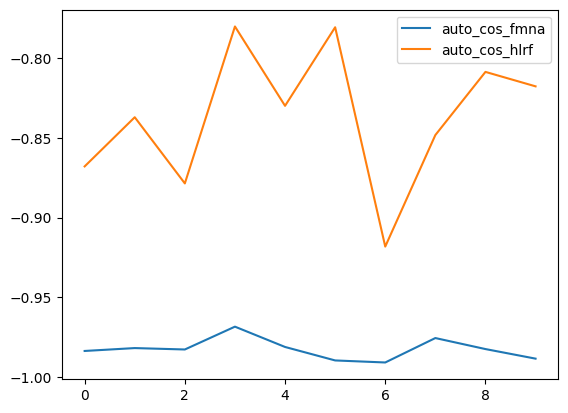

In [180]:
plt.plot(auto_cos_fmna_lists, label='auto_cos_fmna')
plt.plot(auto_cos_hlrf_lists, label='auto_cos_hlrf')
plt.legend()

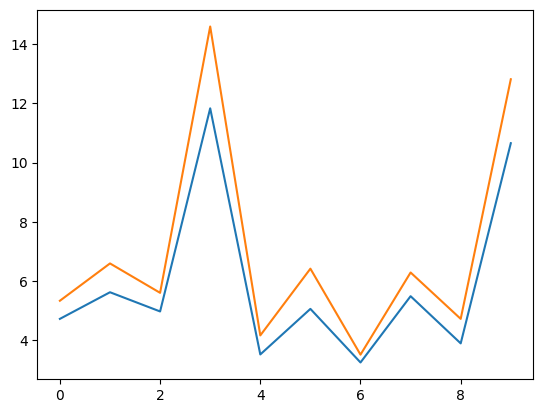

In [181]:
plt.plot(norm_fmna_lists)
plt.plot(norm_hlrf_lists)

In [208]:
import math

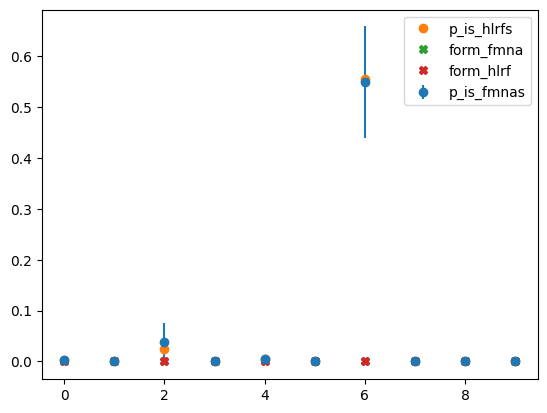

In [211]:
plt.errorbar(range(10),p_is_fmnas, yerr=std_p_fmnas, label='p_is_fmnas', marker='o',linestyle='None')
plt.plot(p_is_hlrfs, label='p_is_hlrfs', marker='o',linestyle='None')
plt.plot(form_fmna_lists, label='form_fmna', marker='X',linestyle='None')
plt.plot(form_hlrf_lists, label='form_hlrf', marker='X',linestyle='None')

plt.legend()

In [61]:
print(f"cosine sim mpp/theta: {torch.cosine_similarity(x1=torch.tensor(mpp), x2=torch.tensor(theta), dim=1).item():.6f}")
vec_random = torch.randn_like(torch.tensor(mpp))
print(f"cosine sim mpp/random: {torch.cosine_similarity(x1=torch.tensor(mpp), x2=vec_random, dim=1).item():.6f}")
config= ExpModelConfig(model=model,dataset_name='mnist',device=device,epsilon_range=[0.18],n_rep=400,real_uniform=True, 
                       input_start=i, input_stop=i+1,noise_dist='uniform',alt_functions=True)
config.update()
gradG_mpp = config.gradG_alt(mpp_torch,)[0]
print(f"cosine sim mpp/gradG: {torch.cosine_similarity(x1=mpp_torch, x2=gradG_mpp, dim=1).item():.6f}")
gradG_theta = config.gradG_alt(torch.tensor(theta).cuda())[0]
print(f"cosine sim theta/gradG: {torch.cosine_similarity(x1=torch.tensor(theta).cuda(), x2=gradG_theta, dim=1).item():.6f}")
print(f"cosine sim mpp/gradG_theta: {torch.cosine_similarity(x1=torch.tensor(mpp).cuda(), x2=gradG_theta, dim=1).item():.6f}")
print(f"norm mpp: {LA.norm(mpp)}")
print(f"norm theta: {LA.norm(theta)}")

cosine sim mpp/theta: 0.983305
cosine sim mpp/random: 0.065880
Using real uniform distribution (no atoms)
Current data index: 0
Current data index: 0
cosine sim mpp/gradG: -0.977447
cosine sim theta/gradG: -0.988382
cosine sim mpp/gradG_theta: -0.973298
norm mpp: 3.7456114292144775
norm theta: 4.440831184387207


Current data index: 0
Current data index: 0
with parameters in {'N_range': [4096], 'T_range': [5], 'ratio_range': [0.1], 's_range': [1.0]}
method: MLS_SMC, input_index:0,eps:0.18
Current data index: 0
Starting MLS_SMC estimation 1/1, with model: mnist_model, img_idx:0,eps:0.18, N: 4096: T: 5: ratio: 0.1: s: 1.0


100%|██████████| 1/1 [00:00<00:00, 20.49it/s]


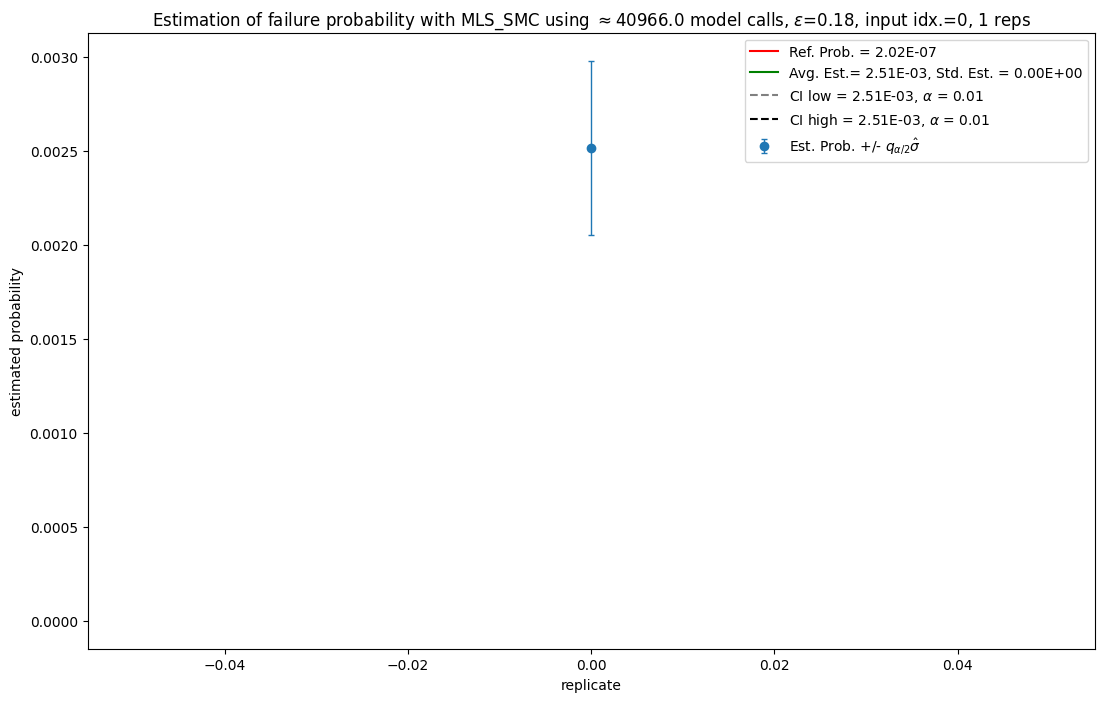

mean est:0.0025145894760498777, std est:0.0
mean calls:40966.0
std. re.:0.0
std. rel. adj.:0.0
mean rel. error:12428.963887962615
std rel. error:0.0
stat performance (per 1k calls):0.0
method_name:MLS_SMC


In [156]:
i=0
p_est_amls, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=1,
                                    real_uniform=True, p_ref=p_ref, save_rare=True,sigma_noise=0.2,
                method='amls_batch', N=4096,ratio=0.1,T_range=[5], input_start=i,track_accept=True, input_stop=i+1,noise_dist='gaussian',alt_functions=True,
                plot_errorbar=True,alpha_CI=0.01, )



In [152]:
i=0
p_est, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=400,
                                    real_uniform=True, p_ref=p_ref, adapt_func='simp_ess',alpha_range=[0.25], alpha_CI=0.01,
                                    sigma_noise=0.2,
                method='mala2', N_range=[750],T_range=[2],ess_alpha=0.8, input_start=i,track_accept=False, input_stop=i+1,noise_dist='gaussian',alt_functions=True)
    

Current data index: 0
Current data index: 0
with parameters in {'N_range': [750], 'T_range': [2], 'ess_alpha_range': [0.8], 'alpha_range': [0.25], 'L_range': [1]}
method: MALA_SMC, input_index:0,eps:0.18
Current data index: 0
Starting MALA_SMC estimation 1/1, with model: mnist_model, img_idx:0,eps:0.18, N: 750: T: 2: ess_alpha: 0.8: alpha: 0.25: L: 1


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:59<00:00,  6.73it/s]


mean est:0.0026511212886543944, std est:0.0004895144956309196
mean calls:23327.325
std. re.:69.64763318320145
std. rel. adj.:1624692.9747453248
mean rel. error:13103.859538483726
std rel. error:2419.7379179701425
stat performance (per 1k calls):56446.01282731286
method_name:MALA_SMC


Using real uniform distribution (no atoms)
Current data index: 0
Current data index: 0
with parameters in {'N_range': [5000], 'T_range': [1, 2, 5, 10], 'ess_alpha_range': [0.8], 'alpha_range': [0.2], 'L_range': [1]}
Current data index: 0
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 1/4, with model: model, img_idx:0,eps:0.18, N: 5000: T: 1: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 400/400 [01:32<00:00,  4.30it/s]


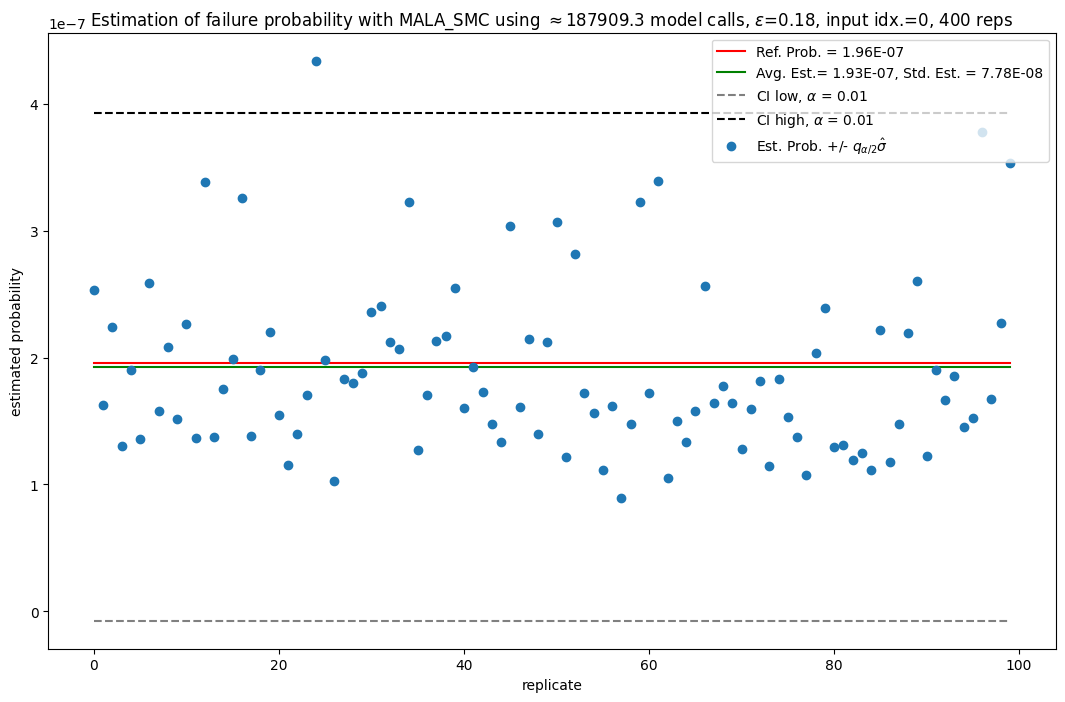

mean est:1.9287998759054404e-07, std est:7.77654384889892e-08
mean calls:187909.3
std. re.:2090317.643645977
std. rel. adj.:392790125195.1649
mean rel. error:0.2835403209219322
std rel. error:0.2789984324572623
stat performance (per 1k calls):52.42640014414144
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 2/4, with model: model, img_idx:0,eps:0.18, N: 5000: T: 2: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 400/400 [02:11<00:00,  3.04it/s]


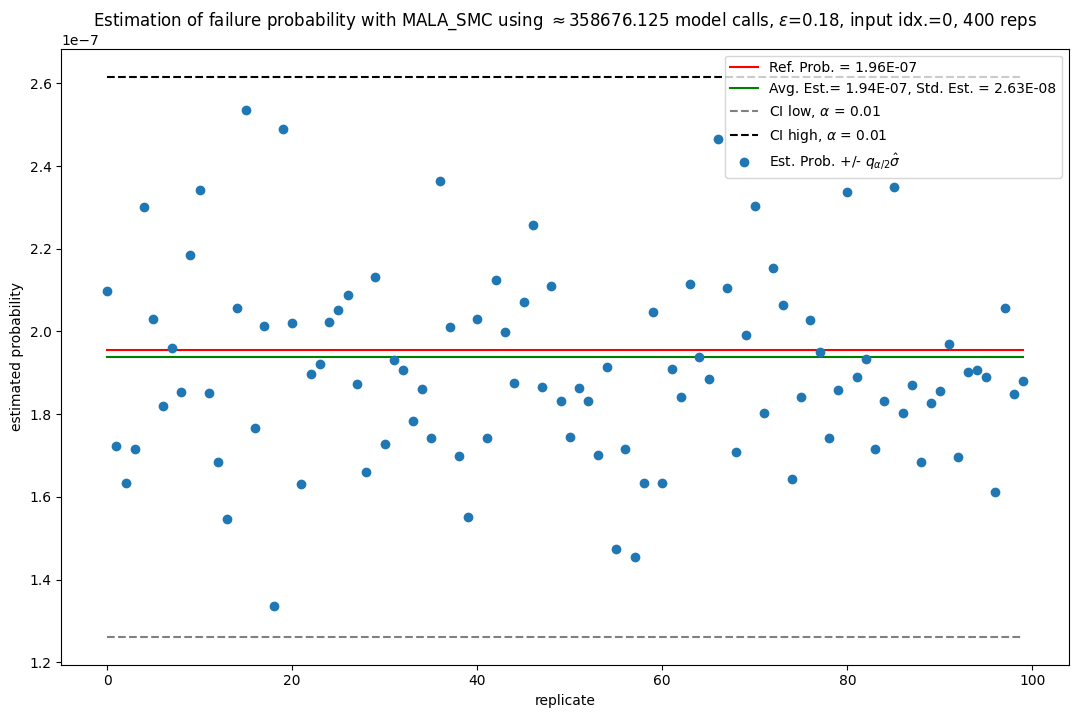

mean est:1.9389561195737315e-07, std est:2.6282569045031808e-08
mean calls:358676.125
std. re.:699088.0083309839
std. rel. adj.:250746177862.12503
mean rel. error:0.10760210603718874
std rel. error:0.0809396859652163
stat performance (per 1k calls):29.031132920720665
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 3/4, with model: model, img_idx:0,eps:0.18, N: 5000: T: 5: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 400/400 [03:59<00:00,  1.67it/s]


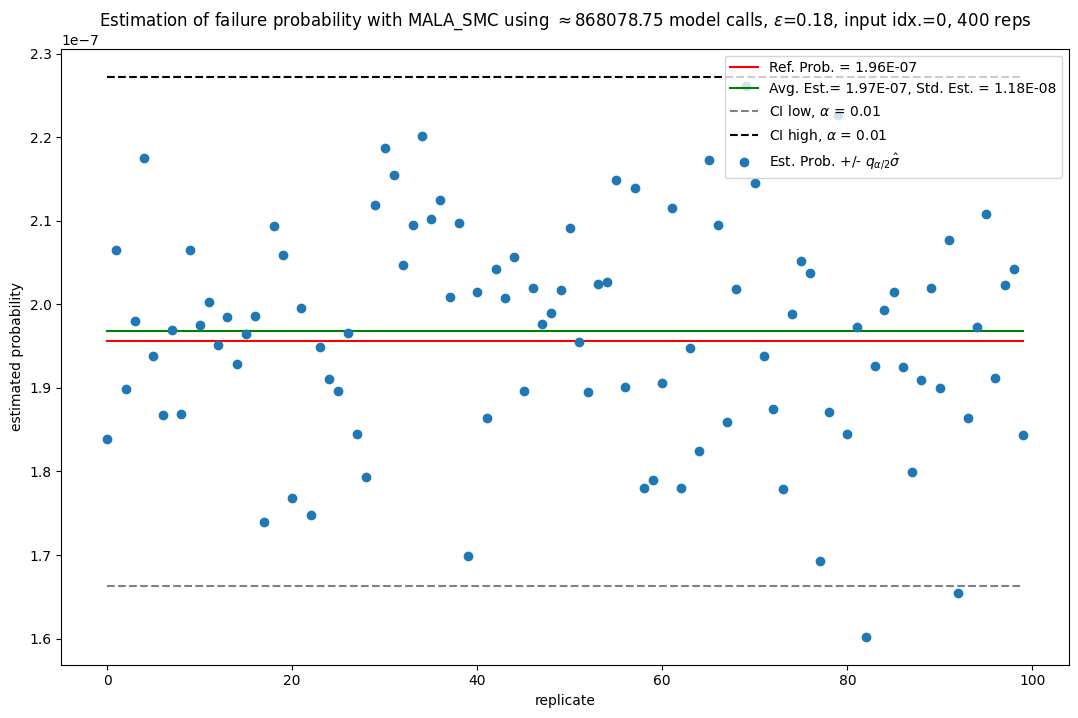

mean est:1.967870045405107e-07, std est:1.181801394204621e-08
mean calls:868078.75
std. re.:305176.9076130905
std. rel. adj.:264917588489.63705
mean rel. error:0.04806064716726008
std rel. error:0.03709364806079436
stat performance (per 1k calls):32.20020764155429
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 4/4, with model: model, img_idx:0,eps:0.18, N: 5000: T: 10: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 400/400 [05:32<00:00,  1.20it/s]


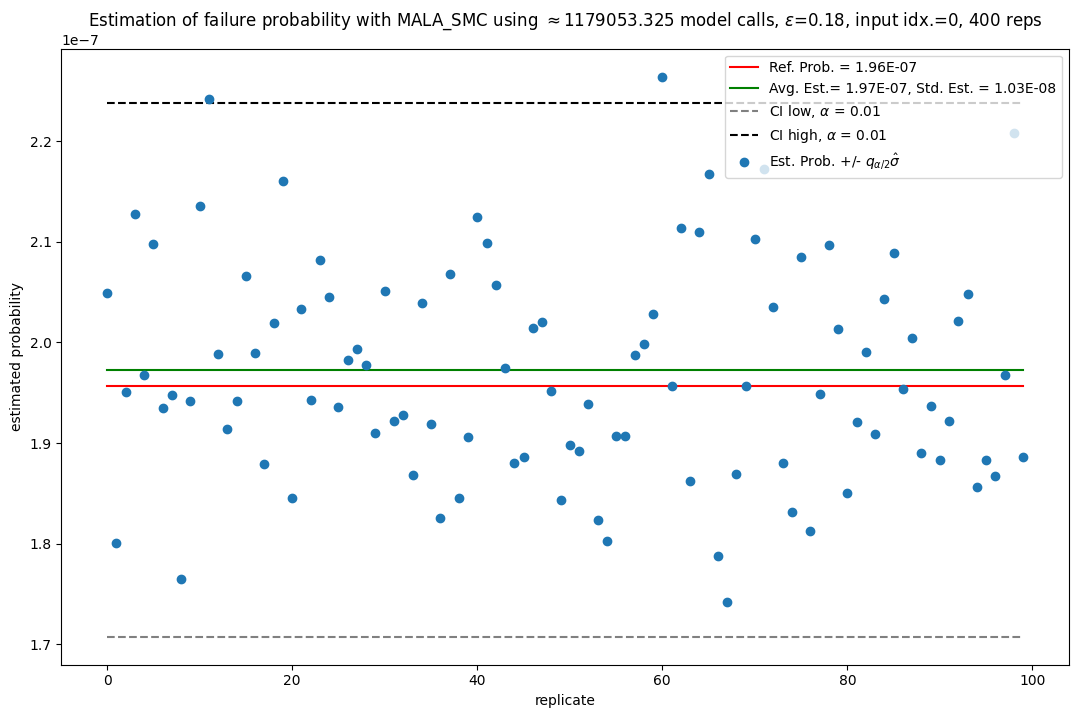

mean est:1.9726847217071963e-07, std est:1.0297566274287112e-08
mean calls:1179053.325
std. re.:264617.90921715176
std. rel. adj.:311998625717.0309
mean rel. error:0.0413558019454058
std rel. error:0.033648959119702275
stat performance (per 1k calls):39.67391713287404


In [ ]:
i=0
p_est, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=400,
                                    real_uniform=True, p_ref=p_ref, adapt_func='simp_ess',alpha_range=[0.2], alpha_CI=0.01,
                method='mala2', N_range=[5000],T_range=[1,2,5,10],ess_alpha=0.8, input_start=i,track_accept=False, input_stop=i+1,noise_dist='uniform',alt_functions=True)
    

In [ ]:
beta_func = lambda u: exp_config

Using real uniform distribution (no atoms)
Current data index: 0
Current data index: 0
with parameters in {'N_range': [5500], 'T_range': [10], 'ratio_range': [0.5], 's_range': [1.0]}
Current data index: 0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 1/1, with model: model, img_idx:0,eps:0.18, N: 5500: T: 10: ratio: 0.5: s: 1.0


100%|██████████| 30/30 [00:05<00:00,  5.50it/s]


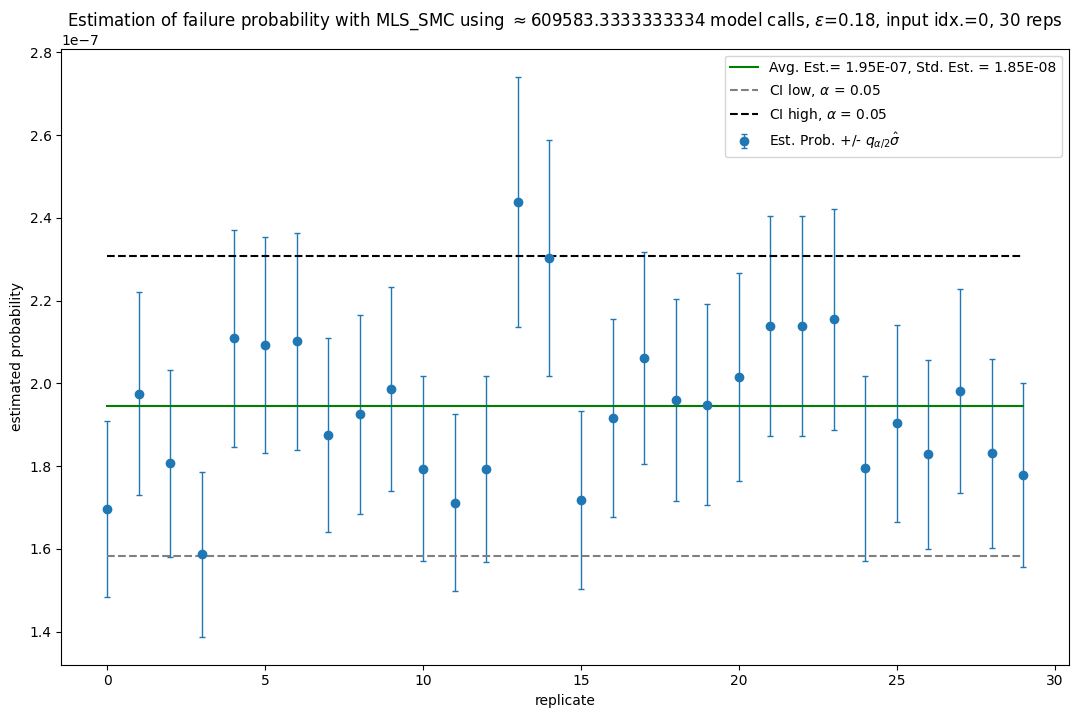

mean est:1.9452933109167852e-07, std est:1.8540242927458488e-08
mean calls:609583.3333333334
std. re.:489942.6348251603
std. rel. adj.:298660864478.83734
Using real uniform distribution (no atoms)
Current data index: 0
Current data index: 0


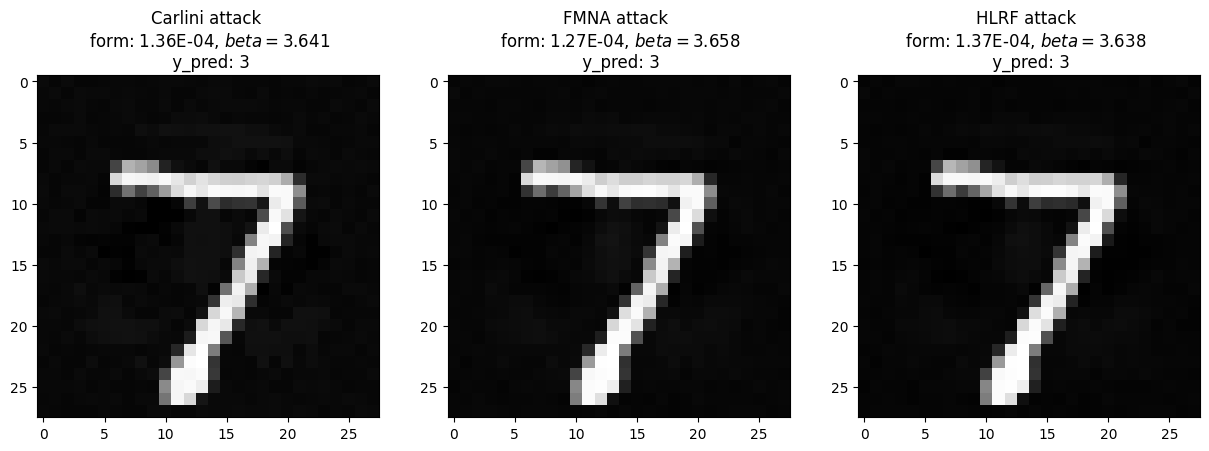

In [ ]:
from time import time
import scipy.stats as stats
debug = False
save_plot = True
nb_img = 1
time_start = time()
forms_mpp = []
forms_carlini = []
forms_fmnal2 = []
forms_fmnal2_pp = []
forms_real_attack = []
forms_real_mpp = []
forms_real_fmnal2 = []
norms_mpp = []
norms_carlini = []
norms_fmnal2 = []
norms_fmnal2_pp = []
norms_real_attack = []
norms_real_mpp = []
norms_real_fmnal2 = []
cosines_grad_mpp = []
cosines_grad_carlini = []
cosines_grad_fmnal2 = []
cosines_grad_fmnal2_pp = []
cosines_grad_real_attack = []
cosines_grad_real_mpp = []
cosines_grad_real_fmnal2 = []
times_carlini = []
epsilon_range = [0.18]
epsilon=0.18
times_mpp = []
times_fmnal2 = []
fosm_ests=[]
p_ests_mls=[]
std_ests_mls=[]
calls_mls=[]
times_mls=[]
real_uniform=True
#save the results in a dataframe
est_methods=['amls_batch','mala2','is']
est_params={'amls_batch':{'N':5000,'ratio':0.5,'T_range':[20,50],'track_accept':True},
            'mala2':{'N':5000,'T_range':[2,5,10],'ess_alpha':0.8,'track_accept':False},
            'is':{'N':5500,'noise_dist':'uniform','alt_functions':True}}
exp_results_df = pd.DataFrame(columns=['idx','form_mpp','form_carlini','form_fmnal2','form_fmnal2_pp','form_real_attack','form_real_mpp','form_real_fmnal2',
                                       'norm_mpp','norm_carlini','norm_fmnal2','norm_fmnal2_pp','norm_real_attack','norm_real_mpp','norm_real_fmnal2',
                                       'cos_grad_mpp','cos_grad_carlini','cos_grad_fmnal2','cos_grad_fmnal2_pp','cos_grad_real_attack','cos_grad_real_mpp','cos_grad_real_fmnal2',
                                       'time_carlini','time_mpp','time_fmnal2','time_fmnal2_pp','time_mls','p_est_mls','std_est_mls','calls_mls','real_uniform' ,'epsilon']) 
results_list = []
for idx in range(nb_img):
    p_est, dict_out=run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=30,
                                    real_uniform=real_uniform,
                method='amls_batch', N=5500,ratio=0.5,T=10, input_start=idx,track_accept=False, input_stop=idx+1,noise_dist='uniform',alt_functions=True)
    
    
    std_est = dict_out['std_est']
    time_est = dict_out['results_df']['mean_time'].values[0]
    nb_calls_mls = dict_out['results_df']['mean_calls'].values[0]
    std_ests_mls.append(std_est)
    p_ests_mls.append(p_est)
    calls_mls.append(nb_calls_mls)
    
    times_mls.append(time_est)
    
    exp_config=ExpModelConfig(model=model,dataset_name='mnist',device=device,input_start=idx, real_uniform=real_uniform,
                              input_stop=idx+1,epsilon_range=[epsilon])
    beta_func= lambda u: exp_config.G_alt(u)/torch.norm(exp_config.gradG_alt(u)[0]).item()-torch.inner(exp_config.gradG_alt(u)[0],u).item()/torch.norm(exp_config.gradG_alt(u)[0]).item()
    exp_config.update(input_index=idx)
    
    x_attack= is_pyt.gaussian_space_attack(x_clean=exp_config.x_clean,y_clean=exp_config.y_clean,model=exp_config.model, t_transform=exp_config.t_transform,attack='Carlini',
                                        random_init=False).reshape((1,exp_config.d))
    time_carlini = time()-time_start
    dist_attack=torch.norm(x_attack).item()

    form_attack=stats.norm.cdf(-dist_attack)
    u_carlini=exp_config.t_transform(x_attack)

    y_pred_attack=torch.argmax(exp_config.model(u_carlini)).item()
    y_carlini_text = t_u.imagenet_simple_labels[y_pred_attack]
    dist_linf_carlini = (u_carlini-exp_config.x_clean).abs().max()
    zero_latent=torch.zeros_like(x_attack).detach()
    G_0= exp_config.G_alt(zero_latent).item()
    gradG_0 = exp_config.gradG_alt(zero_latent)[0].detach()
    fosm_est = stats.norm.cdf(-G_0/torch.norm(gradG_0).item())
    fosm_ests.append(fosm_est)
    time_start = time()
    x_mpp,nb_calls_mpp = is_pyt.mpp_search(grad_f= exp_config.gradG_alt, zero_latent=zero_latent, num_iter=20, stop_cond_type='beta' )
    time_mpp = time()-time_start
    form_mpp = stats.norm.cdf(-torch.norm(x_mpp).item())
    u_mpp = exp_config.t_transform(x_mpp)
    y_mpp = torch.argmax(exp_config.model(u_mpp)).item()
    y_mpp_text = t_u.imagenet_simple_labels[y_mpp]
    dist_linf_mpp = (u_mpp-exp_config.x_clean).abs().max()
    import foolbox as fb
    fake_bounds = (-10,10)
    total_model=torch.nn.Sequential(exp_config.t_transform,exp_config.model)
    fmodel=fb.models.PyTorchModel(model=exp_config.model, bounds = (0,1),)
    total_model.eval()
    total_fmodel=fb.models.PyTorchModel(model=total_model, bounds = fake_bounds,)
   
    criterion = fb.criteria.Misclassification(exp_config.y_clean.unsqueeze(0))
    time_start = time()

    steps = 100
    nb_iter = 20
    zero_latent=torch.zeros_like(x_attack).detach()
    fmnal2_attaack = fb.attacks.L2FMNAttack(steps = steps, binary_search_steps=nb_iter)

    time_start = time()
    x_fmnal2,_,_ = fmnal2_attaack(total_fmodel, zero_latent,exp_config.y_clean.unsqueeze(0),epsilons=[0.2])
    time_fmnal2 = time()-time_start
    x_fmnal2 = x_fmnal2[0].detach().reshape((1,exp_config.d))
    form_fmna = stats.norm.cdf(-torch.norm(x_fmnal2).item())
    u_fmnal2 = exp_config.t_transform(x_fmnal2)
    y_fmna = torch.argmax(exp_config.model(u_fmnal2)).item()
    dist_linf_fmnal2 = (u_fmnal2-exp_config.x_clean).abs().max()

    

    steps_pp = 1000
    nb_iter_pp = 40
    zero_latent=torch.zeros_like(x_attack).detach()
    fmnal2_attaack = fb.attacks.L2FMNAttack(steps = steps_pp, binary_search_steps=nb_iter_pp)

    time_start = time()
    x_fmnal2_pp,_,_ = fmnal2_attaack(total_fmodel, zero_latent,exp_config.y_clean.unsqueeze(0),epsilons=[0.2])
    time_fmnal2_pp = time()-time_start
    x_fmnal2_pp = x_fmnal2_pp[0].detach().reshape((1,exp_config.d))
    form_fmna_pp = stats.norm.cdf(-torch.norm(x_fmnal2_pp).item())
    u_fmnal2_pp = exp_config.t_transform(x_fmnal2_pp)
    y_fmna_pp = torch.argmax(exp_config.model(u_fmnal2_pp)).item()
    dist_linf_fmnal2_pp = (u_fmnal2_pp-exp_config.x_clean).abs().max()

    x_real_attack = mpp_utils.binary_search_to_zero(G=exp_config.G_alt,x=x_attack,eps =1e-5)[0]*x_attack
    dist_real_attack = torch.norm(x_real_attack).item()
    beta_real_attack = beta_func(x_real_attack)
    form_real_attack = stats.norm.cdf(-dist_real_attack)
    form_attack = stats.norm.cdf(-beta_real_attack.cpu().item())
    
    x_real_mpp = mpp_utils.binary_search_to_zero(G=exp_config.G_alt,x=x_mpp,eps=1e-5)[0]*x_mpp
    dist_real_mpp = torch.norm(x_real_mpp).item()
    form_real_mpp = stats.norm.cdf(-dist_real_mpp)
    beta_mpp = beta_func(x_mpp)
    form_mpp = stats.norm.cdf(-beta_mpp.cpu().item())
    
    x_real_fmnal2 = mpp_utils.binary_search_to_zero(G=exp_config.G_alt,x=x_fmnal2,eps=1e-5)[0]*x_fmnal2
    dist_real_fmnal2 = torch.norm(x_real_fmnal2).item()
    form_real_fmnal2 = stats.norm.cdf(-dist_real_fmnal2)
    beta_fmnal2 = beta_func(x_fmnal2)
    form_fmna = stats.norm.cdf(-beta_fmnal2.cpu().item())
    
    
    norms_carlini.append(dist_attack)
    
    norms_real_attack.append(dist_real_attack)
    norms_real_mpp.append(dist_real_mpp)
    norms_real_fmnal2.append(dist_real_fmnal2)
    
    forms_carlini.append(form_attack)
    forms_fmnal2.append(form_fmna)
    forms_fmnal2_pp.append(form_fmna_pp)
    forms_mpp.append(form_mpp)
    forms_real_attack.append(form_real_attack)
    forms_real_mpp.append(form_real_mpp)
    forms_real_fmnal2.append(form_real_fmnal2)
    
    
    grad_x_attack = exp_config.gradG_alt(x_attack)[0]
    grad_x_mpp = exp_config.gradG_alt(x_mpp)[0]
    grad_x_fmnal2 = exp_config.gradG_alt(x_fmnal2)[0]

    grad_x_real_attack = exp_config.gradG_alt(x_real_attack)[0]
    grad_x_real_mpp = exp_config.gradG_alt(x_real_mpp)[0]
    grad_x_real_fmnal2 = exp_config.gradG_alt(x_real_fmnal2)[0]

    cos_mpp = torch.cosine_similarity(grad_x_mpp,x_mpp).item()
    cos_carlini = torch.cosine_similarity(grad_x_attack,x_attack).item()
    cos_fmnal2 = torch.cosine_similarity(grad_x_fmnal2,x_fmnal2).item()
    cos_fmnal2_pp = torch.cosine_similarity(grad_x_fmnal2,x_fmnal2_pp).item()
    cos_real_attack = torch.cosine_similarity(grad_x_real_attack,x_real_attack).item()
    cos_real_fmnal2 = torch.cosine_similarity(grad_x_real_fmnal2,x_real_fmnal2).item()
    cos_real_mpp = torch.cosine_similarity(grad_x_real_mpp,x_real_mpp).item()
    cosines_grad_carlini.append(cos_carlini)
    cosines_grad_fmnal2.append(cos_fmnal2)
    cosines_grad_fmnal2_pp.append(cos_fmnal2_pp)
    cosines_grad_mpp.append(cos_mpp)
    cosines_grad_real_attack.append(cos_real_attack)
    cosines_grad_real_fmnal2.append(cos_real_fmnal2)
    cosines_grad_real_mpp.append(cos_real_mpp)
    times_carlini.append(time_carlini)
    times_mpp.append(time_mpp)
    times_fmnal2.append(time_fmnal2)
    gradG_0,G_0 = exp_config.gradG_alt(zero_latent)
    
    beta_fosm = G_0.item()/torch.norm(gradG_0).item()
    fosm_est = stats.norm.cdf(-beta_fosm)
    fosm_ests.append(fosm_est)
    #print the different attacks distances 
    if debug:
        print(f"Distances between LInf x_clean and x_attack: \n")
        print(f"dist_linf_carlini: {dist_linf_carlini.item()}")
        print(f"dist_linf_fmnal2: {dist_linf_fmnal2.item()}")
        print(f"dist_linf_fmnal2_pp: {dist_linf_fmnal2_pp.item()}")
        print(f"dist_linf_mpp: {dist_linf_mpp.item()}")



        print(f"Norms of the corresponding latent variables: \n")
        print(f"norm_x_attack: {torch.norm(x_attack).item()}")
        print(f"norm_x_fmnal2: {torch.norm(x_fmnal2).item()}")
        print(f"norm_x_fmnal2_pp: {torch.norm(x_fmnal2_pp).item()}")
        print(f"norm_x_mpp: {torch.norm(x_mpp).item()}")

        print(f"norm real attack: {torch.norm(x_real_attack).item()}")
        print(f"norm real fmnal2: {torch.norm(x_real_fmnal2).item()}")

        print(f"norm real mpp: {torch.norm(x_real_mpp).item()}")




        #print the G values of the different attacks
        print(f"G values of the different attacks: \n")
        print(f"G_x_attack: {exp_config.G_alt(x_attack).item()}")
        print(f"G_x_fmnal2: {exp_config.G_alt(x_fmnal2).item()}")
        print(f"G_x_fmnal2_pp: {exp_config.G_alt(x_fmnal2_pp).item()}")
        print(f"G_x_mpp: {exp_config.G_alt(x_mpp).item()}")
        print(f"G_x_real_attack: {exp_config.G_alt(x_real_attack).item()}")
        print(f"G_x_real_fmnal2: {exp_config.G_alt(x_real_fmnal2).item()}")
        print(f"G_x_real_mpp: {exp_config.G_alt(x_real_mpp).item()}")
        #compute the cosine similarity of the different attacks and gradients
        
        
        #print the cosine similarity of the different attacks and gradients
        print(f"Cosine similarity of the different attacks and gradients: \n")
        print(f"cosine_sim_attack: {cos_carlini}")
        print(f"cosine_sim_fmnal2: {cos_fmnal2}")
        print(f"cosine_sim_fmnal2_pp: {cos_fmnal2_pp}")
        print(f"cosine_sim_mpp: {cos_mpp}")
        print(f"cosine_sim_real_attack: {cos_real_attack}")
        print(f"cosine_sim_real_fmnal2: {cos_real_fmnal2}")
        print(f"cosine_sim_real_mpp: {cos_real_mpp}")
    

        
        #print the time of the different attacks
        print(f"Time of the different attacks: \n")
        print(f"time_carlini: {time_carlini}")
        print(f"time_mpp: {time_mpp}")
        print(f"time_fmnal2: {time_fmnal2}")
        print(f"time_fmnal2_pp: {time_fmnal2_pp}")

        #print the form of the different attacks
        print(f"Form of the different attacks: \n")
        print(f"form_attack: {form_attack}")
        print(f"form_fmna: {form_fmna}")
        print(f"form_mpp: {form_mpp}")
        print(f"form_fmna_pp: {form_fmna_pp}")
        print(f"form_real_attack: {form_real_attack}")
        print(f"form_real_fmnal2: {form_real_fmnal2}")
        print(f"form_real_mpp: {form_real_mpp}")
    if save_plot:
    #plot the different attacks
        plt.figure(figsize=(15,20))
        plt.subplot(1,3,1)
        plt.imshow(u_carlini[0].detach().cpu().numpy().transpose((1,2,0)),cmap='gray')
        plt.title(f"Carlini attack \n form: {form_attack:.2E}, $beta={beta_real_attack.cpu().item():.3f}$ \n y_pred: {y_pred_attack}")
        plt.subplot(1,3,2)

        plt.imshow(u_fmnal2[0].detach().cpu().numpy().transpose((1,2,0)),cmap='gray')
        plt.title(f"FMNA attack \n form: {form_fmna:.2E}, $beta={beta_fmnal2.cpu().item():.3f}$ \n y_pred: {y_fmna}")


        plt.subplot(1,3,3)
        plt.imshow(u_mpp[0].detach().cpu().numpy().transpose((1,2,0)),cmap='gray')
        plt.title(f"HLRF attack \n form: {form_mpp:.2E}, $beta={beta_mpp.cpu().item():.3f}$   \n y_pred: {y_mpp}")

        plt.show()
        plt.savefig("../logs/exp_model_mnist/attack_examples_img_idx_{idx}.png")
        plt.close()

    results_list.append({'idx':idx,'form_mpp':form_mpp,'form_carlini':form_attack,'epsilon':epsilon_range[0],'real_uniform':real_uniform,
                           'form_fmnal2':form_fmna,'form_fmnal2_pp':form_fmna_pp,'form_real_attack':form_real_attack,'form_real_mpp':form_real_mpp,'form_real_fmnal2':form_real_fmnal2,
                           'cos_grad_mpp':cos_mpp,'cos_grad_carlini':cos_carlini,'cos_grad_fmnal2':cos_fmnal2,'cos_grad_fmnal2_pp':cos_fmnal2_pp,'cos_grad_real_attack':cos_real_attack,'cos_grad_real_mpp':cos_real_mpp,'cos_grad_real_fmnal2':cos_real_fmnal2,
                            'norm_mpp':dist_linf_mpp,'norm_carlini':dist_linf_carlini,'norm_fmnal2':dist_linf_fmnal2,'norm_fmnal2_pp':dist_linf_fmnal2_pp,'norm_real_attack':dist_real_attack,'norm_real_mpp':dist_real_mpp,'norm_real_fmnal2':dist_real_fmnal2,
                            'time_carlini':time_carlini,'time_mpp':time_mpp,'time_fmnal2':time_fmnal2,'time_fmnal2_pp':time_fmnal2_pp,'time_mls':time_est,'p_est_mls':p_est,'std_est_mls':std_est,'calls_mls':nb_calls_mls,
                            'fosm_est':fosm_est})


In [ ]:
p_ests_mls

[2.0199255509810015e-07]

In [ ]:
forms_real_mpp

[0.00012277878444045095]

In [ ]:
fosm_ests

[0.00026988685389206106, 0.00026988685389206106]

In [ ]:
print(f"average time carlini: {np.mean(times_carlini)} +- {np.std(times_carlini)}")
print(f"average time mpp: {np.mean(times_mpp)} +- {np.std(times_mpp)}")
print(f"average time fmnal2: {np.mean(times_fmnal2)} +- {np.std(times_fmnal2)}")

print(f"average grad/mpp cosine real carlini attack: {np.mean(cosines_grad_real_attack)} +- {np.std(cosines_grad_real_attack)}")
print(f"average grad/mpp cosine real mpp attack: {np.mean(cosines_grad_real_mpp)} +- {np.std(cosines_grad_real_mpp)}")
print(f"average grad/mpp cosine real fmnal2 attack: {np.mean(cosines_grad_real_fmnal2)} +- {np.std(cosines_grad_real_fmnal2)}")


print(f"norms real attack: {np.mean(norms_real_attack)} +- {np.std(norms_real_attack)}")
print(f"norms real mpp: {np.mean(norms_real_mpp)} +- {np.std(norms_real_mpp)}")
print(f"norms real fmnal2: {np.mean(norms_real_fmnal2)} +- {np.std(norms_real_fmnal2)}")

print(f"FORMs real attack: {forms_real_attack}")
print(f"FORMs real mpp: {forms_real_mpp}")
print(f"FORMs real fmnal2: {forms_real_fmnal2}")
gradG_0,G_0 = exp_config.gradG_alt(zero_latent)
    
beta_fosm = G_0.item()/torch.norm(gradG_0).item()
fosm_est = stats.norm.cdf(-beta_fosm)
print(f"FOSMs : {fosm_ests}")

average time carlini: 7.114922285079956 +- 0.0
average time mpp: 0.02520918846130371 +- 0.0
average time fmnal2: 0.25374293327331543 +- 0.0
average grad/mpp cosine real carlini attack: -0.772625207901001 +- 0.0
average grad/mpp cosine real mpp attack: -0.9921787977218628 +- 0.0
average grad/mpp cosine real fmnal2 attack: -0.9950234293937683 +- 0.0
norms real attack: 4.711859226226807 +- 0.0
norms real mpp: 3.666849136352539 +- 0.0
norms real fmnal2: 3.678802013397217 +- 0.0
FORMs real attack: [1.2273346499628405e-06]
FORMs real mpp: [0.00012277878444045095]
FORMs real fmnal2: [0.00011716604311968874]
FOSMs : [0.00026988685389206106, 0.00026988685389206106]


In [ ]:
reload(mc_pyt)

<module 'stat_reliability_measure.dev.mc.mc_pyt' from '/home/karimtito/repos/stat_reliability_measure/dev/mc/mc_pyt.py'>

Using real uniform distribution (no atoms)
Current data index: 0
Current data index: 0
with parameters in {'N_range': [10000000], 'batch_size_range': [10000]}
Current data index: 0
Starting CrudeMC simulation 1/1, with model: model, img_idx:0,eps:0.18, N: 10000000: batch_size: 10000


100%|██████████| 4/4 [00:15<00:00,  3.95s/it]


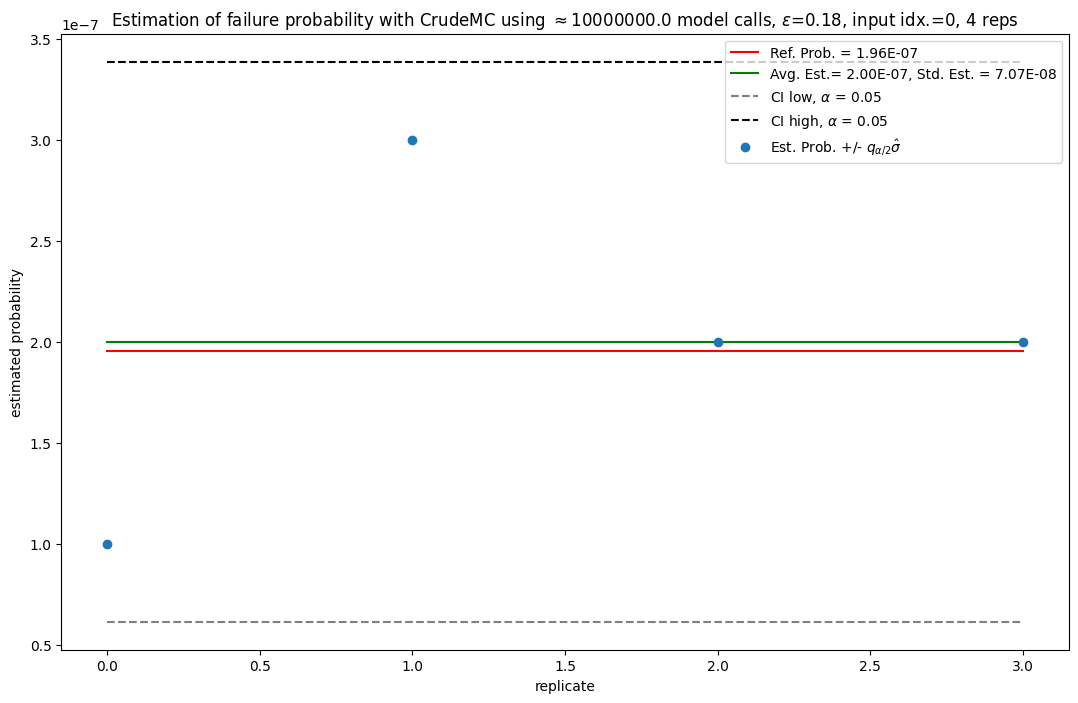

mean est:2.0000004496978363e-07, std est:7.07107119524153e-08
mean calls:10000000.0
std. re.:1767767.0038492964
std. rel. adj.:17677670038492.965
mean rel. error:0.26680999994277954
std rel. error:0.24491016566753387
stat performance (per 1k calls):2449.1016566753387


In [ ]:
p_est_mc,dict_out_mc = run_est.run_est(model=model, X=None, y=None, dataset_name='mnist', device=device, epsilon_range=[0.18], n_rep=4,
                                    real_uniform=True, p_ref=p_ref, 
                method='mc', N_range=[int(1E7)], batch_size=int(1E4), input_start=i, input_stop=i+1,noise_dist='uniform',alt_functions=True)

In [ ]:
def get_off_diagonal_elements(M):
    """"returns the off diagonal elements of a matrix"""
    res = M.clone()
    res.diagonal(dim1=-1, dim2=-2).zero_()
    return res

def is_diagonal(M): 
    """returns True if a matrix is diagonal"""
    
    return (M==torch.diag(M.diagonal())).all()


def G_(x):
    """returns the G value of the model at x"""
    return exp_config.gradG_alt(x)[1]

In [ ]:
def G_(u):
    """returns the G value of the model at x"""
    x = exp_config.t_transform(u)
    score = t_u.score_function(X=x, model=exp_config.model, y_clean=exp_config.y_clean)
    return score

FORM/SORM comparison for Carlini attack
Initial FORM: 5.809777505112596e-07
P_FORM = 1.209580654803873e-06
P_SORM = 2.915967378669393e-08
P_sorm_HR = 2.5086093202730808e-08


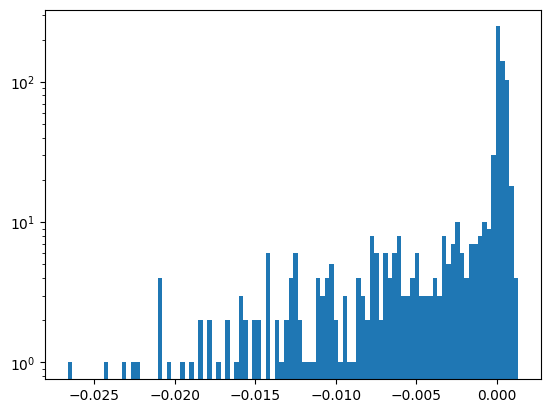

FORM/SORM comparison for HLRF attack
Initial FORM: 0.0001125815264858867
P_FORM = 0.00012427322231406163
P_SORM = 6.170648703118786e-06
P_sorm_HR = 5.07964887219714e-06


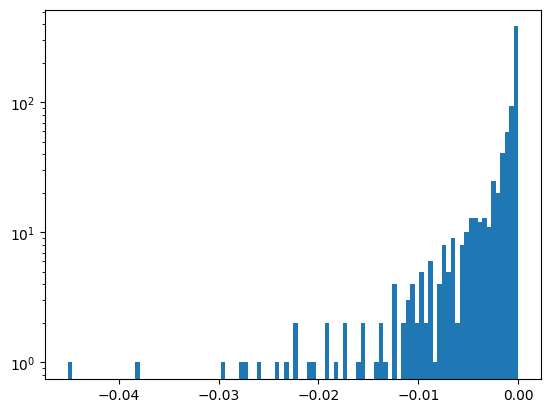

FORM/SORM comparison for FMNA attack
Initial FORM: 3.4487432695360645e-05
P_FORM = 0.00011637360665084882
P_SORM = 5.925793175265426e-06
P_sorm_HR = 4.894189260085113e-06


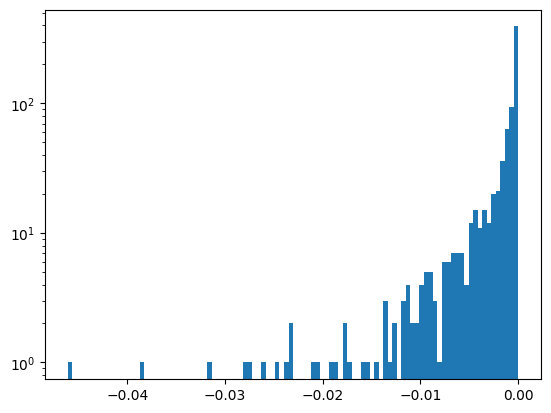

In [ ]:
for u,attack_name in zip([x_attack,x_mpp,x_fmnal2],['Carlini','HLRF','FMNA']):
    print(f"FORM/SORM comparison for {attack_name} attack")
    print(f"Initial FORM: {stats.norm.cdf(-torch.norm(u).item())}")
    lambda_,nb_calls = mpp_utils.binary_search_to_zero(G=exp_config.G_alt,  x=u,max_iter=10, eps=1e-5,)
    with torch.no_grad():
        u=lambda_*u

    grad_G = torch.autograd.functional.jacobian(func=G_,inputs=u,)
    grad_norm = grad_G.norm()
    u_norm= u.norm()
    beta = u_norm 
    hess_G = torch.autograd.functional.hessian(func=G_,inputs=u)
    mat_hess_G=hess_G.squeeze((0,2))

    R=t_u.rotation_matrix(grad_G).to(device
                                )
    A = R@mat_hess_G@R.t()
    A_tilde = A[1:,1:]/grad_norm
    eigvals = torch.linalg.eigvalsh(mat_hess_G).float()
    sum_eigvals = eigvals.sum()
    sum_abs_eigvals = eigvals.abs().sum()

    top_eigvals = eigvals.abs().topk(k=300).values
    beta_attack = u.norm().item()
    beta_attack = beta_func(u).cpu().item()
    
    P_FORM = stats.norm.cdf(-beta_attack)
    def p_sorm_base(beta,kappas):
        form = stats.norm.cdf(-beta)
        factor = torch.prod(torch.sqrt(1-beta*kappas))
        return form*factor

    def psi(x): 
        return stats.norm.pdf(x)/stats.norm.cdf(-x)
    def p_sorm_HR(beta,kappas): 
        form = stats.norm.cdf(-beta)    
        factor = torch.prod(1/torch.sqrt(1-psi(beta)*kappas))
        return form*factor
    def p_sorm(beta,kappas):
        form = stats.norm.cdf(-beta)
        factor = torch.prod(1/torch.sqrt(1-beta*kappas))
        return form*factor
    P_sorm_HR = p_sorm_HR(beta_attack,eigvals)
    P_SORM = p_sorm(beta_attack,eigvals)

    print(f"P_FORM = {P_FORM}")
    print(f"P_SORM = {P_SORM}")
    print(f"P_sorm_HR = {P_sorm_HR}")
    # print(f"sum abs eigvals = {sum_abs_eigvals}")
    # print(f"sum eigvals = {sum_eigvals}")
    # print(f"top eigvals = {top_eigvals}")
    # print(f"ratio = {top_eigvals.sum()/sum_abs_eigvals}")
    plt.hist(eigvals.cpu().numpy(),bins=100)
    plt.yscale('log')
    plt.show()


Current data index: 0
Current data index: 0


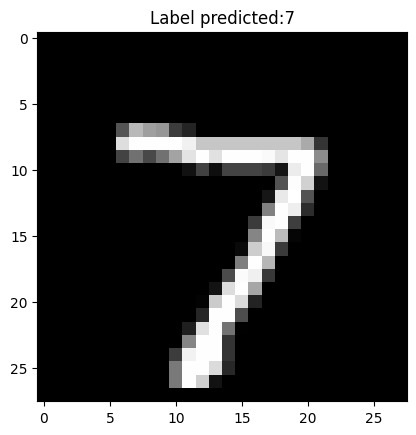

with parameters in {'N_range': [1000], 'T_range': [20], 'ess_alpha_range': [0.8], 'alpha_range': [0.2], 'L_range': [1]}
Current data index: 0


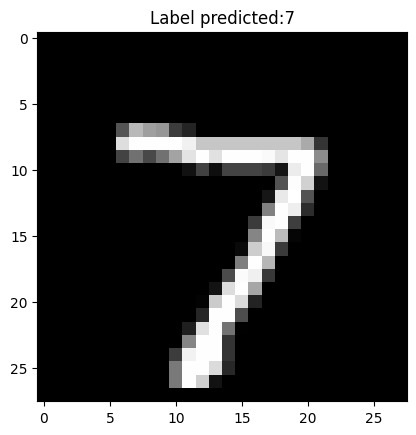

Starting MALA_SMC simulation 1/1, with model: model, img_idx:0,eps:0.18, N: 1000: T: 20: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 100/100 [00:55<00:00,  1.80it/s]


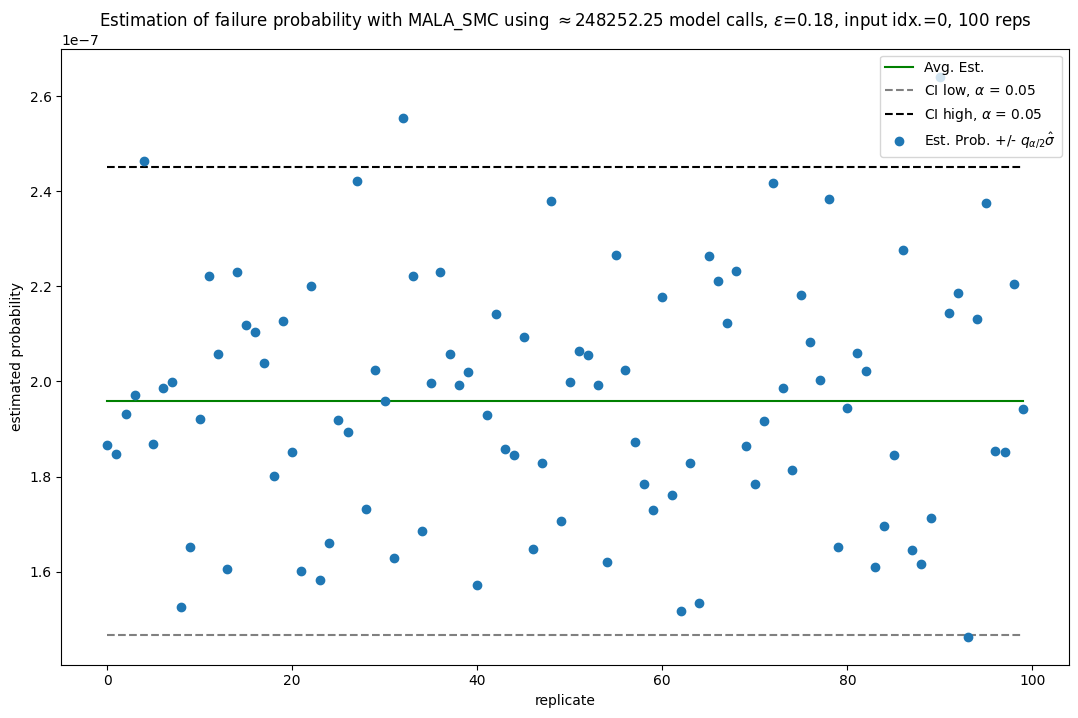

mean est:1.9592944340729447e-07, std est:2.5100205034217582e-08
mean calls:248252.25
std. re.:653849.5957896046
std. rel. adj.:162319633316.35986


In [ ]:

p_ref, dict_out = run_est.run_est(model=exp_config.model,X=exp_config.X,y=exp_config.y,noise_dist ='uniform',
                                                repeat_exp=True, track_dt=False,input_start=input_start,
                                                input_stop=input_start+1,
                                                alt_functions=False,
                                             method='mala2', dataset_name='mnist',
                                             n_rep=100, verbose=0,real_uniform=True,  
                                epsilon_range=[0.18], update_aggr_res=True ,
                                track_accept=False,
                                N_range=[N_ref], T_range =[T_ref],ess_alpha = ess_ref,
                                alpha=alpha_ref)

c= dict_out['exp_config']
m=dict_out['method_config']


,method_name,from_gaussian,N,rho,n_rep,T,epsilon,alpha,min_rate,mean_time,...,stepsize,num_iter,random_init,sigma_init,steps,gamma,x_mean,sample_accuracy,num_classes,ploterror_path
0,MALA_SMC,True,200,NaN,1,2.0,0.08,0.25,0.15,84.393338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.319739,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
2,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.310614,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
3,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.361564,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
4,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.326630,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
5,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.349203,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
6,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.329195,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
7,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.325080,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
8,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.369951,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN
9,IS,True,200000,NaN,4,NaN,0.18,NaN,NaN,0.326967,...,0.01,20.0,False,0.1,20.0,0.5,0.0,0.992188,10.0,NaN


In [235]:
aggr_res_df = pd.read_csv('/home/karimtito/repos/stat_reliability_measure/older_logs/exp_model_mnist/aggr_res.csv')
aggr_res_now = pd.read_csv('/home/karimtito/repos/stat_reliability_measure/notebooks/aggr_res.csv')
aggr_total = pd.concat([aggr_res_df,aggr_res_now],axis=0,ignore_index=True)

In [263]:
aggr_total['mean_calls'].tail(5),aggr_total['mean_est'].tail(5),aggr_total['method_name'].tail(5)

(692    410000.00
 693       311.25
 694      4065.00
 695     50000.00
 696       300.00
 Name: mean_calls, dtype: float64,
 692    1.957807e-07
 693    1.364328e-17
 694    1.715926e-14
 695    1.808581e-07
 696    2.686990e-45
 Name: mean_est, dtype: float64,
 692    CE-IS
 693    CE-IS
 694    CE-IS
 695    CE-IS
 696    CE-IS
 Name: method_name, dtype: object)

   method_name      mean_est       std_est  mean_calls     std_calls  n_rep
52    MALA_SMC  2.076515e-07  6.524948e-08    26006.25   1386.753741    400
53    MALA_SMC  2.008605e-07  4.319021e-08    52475.00   2446.298224    400
54    MALA_SMC  1.999670e-07  2.788230e-08   130250.00   5728.219619    400
55    MALA_SMC  1.980854e-07  1.955828e-08   259812.50  11131.142967    400
69    MALA_SMC  2.148380e-07  1.022506e-07    12737.50    984.330356    400
   method_name  from_gaussian       N  rho  n_rep    T  epsilon  alpha  \
69    MALA_SMC           True    50.0  NaN    400  5.0     0.18   0.25   
52    MALA_SMC           True   100.0  NaN    400  5.0     0.18   0.25   
53    MALA_SMC           True   200.0  NaN    400  5.0     0.18   0.25   
54    MALA_SMC           True   500.0  NaN    400  5.0     0.18   0.25   
55    MALA_SMC           True  1000.0  NaN    400  5.0     0.18   0.25   

    min_rate  mean_time  ...  N_ce  save_theta  save_thetas  save_mpp  \
69      0.15   0.284946  .

/tmp/ipykernel_13477/4103003202.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
/tmp/ipykernel_13477/4103003202.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
/tmp/ipykernel_13477/4103003202.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

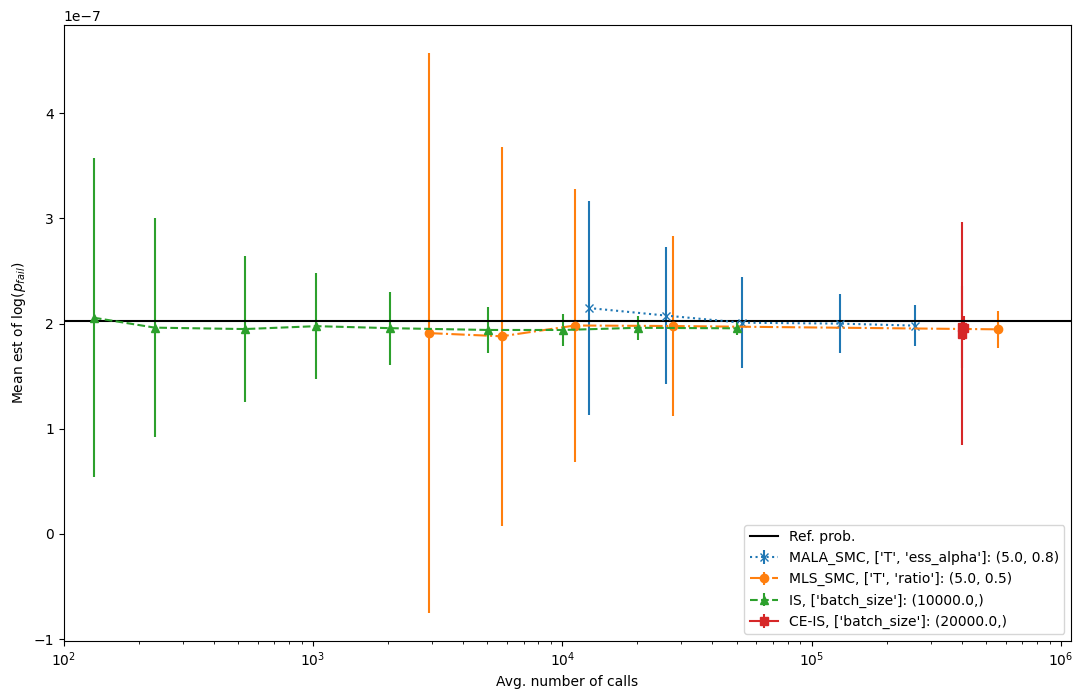

In [268]:
n_rep_ref = 400
epsilon_range = [0.18]
ref_data = utils.get_sel_df(aggr_total,triplets=[('n_rep',n_rep_ref,'='),('epsilon',epsilon_range[0],'='),])
param_methods_dict = {'MLS_SMC':['T','N','alpha','ess_alpha'],
                      'MALA_SMC':['T','N','alpha','ess_alpha'],
                      'CE-IS':['N'],
                      'IS':['N',],}
param_methods_ex_N = {'IS':['batch_size'],
                      'MLS_SMC':['T','ratio',],
                      'MALA_SMC':['T','ess_alpha',],
                      'CE-IS':['batch_size',],
                      }
cond_methods_dict = {'MLS_SMC':[('T',5,'='),('N',2,'>='),('ratio',0.5,'=='),('T',100,'<='),],
                     'MALA_SMC':[('T',5,'='),('N',2,'>='),('ess_alpha',0.8,'=='),('T',100,'<=')],
                        'IS':[('batch_size',int(1e4),'==')],
                        'CE-IS':[('batch_size',int(1e1),'>')],
                                }

calls_max = 1e6
max_exp_by_method=3
ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
ref_data['std_log10_est'] = ref_data['std_log_est']/np.log(10)
mode_y = '' 
x_variable = 'mean_calls'
if mode_y == 'log10':
    y_variable= 'mean_log10_est'
    y_error = 'std_log10_est'
    
elif mode_y == 'log':
    y_variable= 'mean_log_est'
    y_error = 'std_log_est'
else:
    y_variable= 'mean_est'
    y_error = 'std_est'
methods_grouped={}
max_calls=0
plot_traits = {'MLS_SMC':{'marker':'o','linestyle':'-.',},
               'MALA_SMC':{'marker':'x','linestyle':':',},
                'IS':{'marker':'^','linestyle':'--'},
                'CE-IS':{'marker':'s','linestyle':'-'},
                }

min_calls = 1e10
plt.figure(figsize=(13,8),)
for method in ref_data['method_name'].unique():
    if method not in cond_methods_dict.keys():
        continue
    cond_method = cond_methods_dict[method]
    method_df = utils.get_sel_df(ref_data,triplets=[('method_name',method,'=')]+cond_method+[(x_variable,calls_max,'<=')])
    print(method_df[['method_name','mean_est','std_est','mean_calls','std_calls','n_rep']])
    params = param_methods_ex_N[method]
    method_df_grouped = method_df.groupby(params)
    methods_grouped[method] = list(method_df_grouped)
    i = 0
    for values,df in method_df_grouped:
        if i > max_exp_by_method:
            break
        df = df.drop_duplicates(subset=['N'])
        df = df.sort_values(by=x_variable)
        print(df)
        log_mean_calls = np.log(df[x_variable].values)
        plt.errorbar(df[x_variable],df[y_variable],yerr=df[y_error],
                     label=f"{method}, {params}: {values}",**plot_traits[method])
        plt.xscale('log')
        plt.ylabel(r'Mean est of $\log(p_{fail})$')
        plt.xlabel('Avg. number of calls')
        
        i+=1
        max_calls=max(max_calls,df[x_variable].max())
        min_calls = min(min_calls,df[x_variable].min())
if p_ref is not None:
    #using a different marker and linestyle for the reference method*
    if mode_y=='log10':
        plt.axhline(y=np.log10(p_ref),label='Ref. prob.',color='k',linestyle='-')
    elif mode_y=='log':
        plt.axhline(y=p_ref,label='Ref. prob.',color='k',linestyle='-')
    else:
        plt.axhline(y=p_ref,label='Ref. prob.',color='k',linestyle='-')
plt.xlim([1e2,1.1e6])
plt.legend(loc='lower right')
    # for params_value in method_df[params].unique():
    #     print(f"method: {method}, params: {params}, params_value: {params_value}")
    # param_df = param_df.sort_values(by=x_variable)
    # plt.errorbar(param_df[x_variable],param_df['mean_est'],yerr=param_df[y_error],label=param)


/tmp/ipykernel_13477/2136066030.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
/tmp/ipykernel_13477/2136066030.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
/tmp/ipykernel_13477/2136066030.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

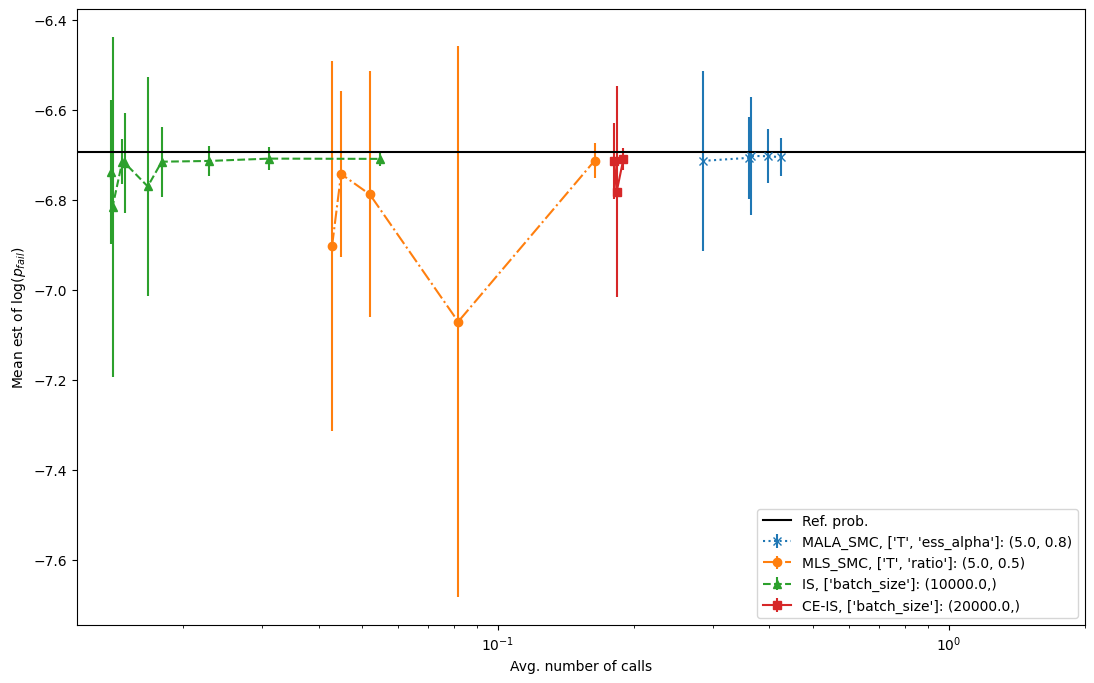

In [254]:
n_rep_ref = 400
epsilon_range = [0.18]
ref_data = utils.get_sel_df(aggr_total,triplets=[('n_rep',n_rep_ref,'='),('epsilon',epsilon_range[0],'='),])
param_methods_dict = {'MLS_SMC':['T','N','alpha','ess_alpha'],
                      'MALA_SMC':['T','N','alpha','ess_alpha'],
                      'CE-IS':['batch_size','N'],
                      'IS':['N',],}
param_methods_ex_N = {'IS':['batch_size'],
                      'MLS_SMC':['T','ratio',],
                      'MALA_SMC':['T','ess_alpha',],
                      'CE-IS':['batch_size',],
                      }
cond_methods_dict = {'MLS_SMC':[('T',5,'='),('N',2,'>='),('ratio',0.5,'=='),('T',100,'<='),],
                     'MALA_SMC':[('T',5,'='),('N',2,'>='),('ess_alpha',0.8,'=='),('T',100,'<=')],
                        'IS':[('batch_size',int(1e4),'==')],
                        'CE-IS':[('batch_size',int(1e1),'>')],
                                }

calls_max = 1e6
max_exp_by_method=3
ref_data['mean_log10_est'] = ref_data['mean_log_est']/np.log(10)
ref_data['std_log10_est'] = ref_data['std_log_est']/np.log(10)
mode_y = 'log10' 
x_variable = 'mean_time'
if mode_y == 'log10':
    y_variable= 'mean_log10_est'
    y_error = 'std_log10_est'
    
elif mode_y == 'log':
    y_variable= 'mean_log_est'
    y_error = 'std_log_est'
else:
    y_variable= 'mean_est'
    y_error = 'std_est'
methods_grouped={}
max_calls=0
plot_traits = {'MLS_SMC':{'marker':'o','linestyle':'-.',},
               'MALA_SMC':{'marker':'x','linestyle':':',},
                'IS':{'marker':'^','linestyle':'--'},
                'CE-IS':{'marker':'s','linestyle':'-'},
                }

min_calls = 1e10
plt.figure(figsize=(13,8),)
for method in ref_data['method_name'].unique():
    if method not in cond_methods_dict.keys():
        continue
    cond_method = cond_methods_dict[method]
    method_df = utils.get_sel_df(ref_data,triplets=[('method_name',method,'=')]+cond_method+[(x_variable,calls_max,'<=')])
    params = param_methods_ex_N[method]
    method_df_grouped = method_df.groupby(params)
    methods_grouped[method] = list(method_df_grouped)
    i = 0
    for values,df in method_df_grouped:
        if i > max_exp_by_method:
            break
        df = df .drop_duplicates(subset=['N'])
        df = df.sort_values(by=x_variable)
        
        log_mean_calls = np.log(df[x_variable].values)
        plt.errorbar(df[x_variable],df[y_variable],yerr=df[y_error],
                     label=f"{method}, {params}: {values}",**plot_traits[method])
        plt.xscale('log')
        plt.ylabel(r'Mean est of $\log(p_{fail})$')
        plt.xlabel('Avg. number of calls')
        
        i+=1
        max_calls=max(max_calls,df[x_variable].max())
        min_calls = min(min_calls,df[x_variable].min())
if p_ref is not None:
    #using a different marker and linestyle for the reference method*
    if mode_y=='log10':
        plt.axhline(y=np.log10(p_ref),label='Ref. prob.',color='k',linestyle='-')
    elif mode_y=='log':
        plt.axhline(y=p_ref,label='Ref. prob.',color='k',linestyle='-')
    else:
        plt.axhline(y=p_ref,label='Ref. prob.',color='k',linestyle='-')
plt.xlim([0.0,2])
plt.legend(loc='lower right')
    # for params_value in method_df[params].unique():
    #     print(f"method: {method}, params: {params}, params_value: {params_value}")
    # param_df = param_df.sort_values(by=x_variable)
    # plt.errorbar(param_df[x_variable],param_df['mean_est'],yerr=param_df[y_error],label=param)


In [ ]:
reload(amls_config)
reload(config_)
reload(webb_config)
reload(amls_webb)
reload(amls_pyt)
reload(smc_pyt)
reload(smc_pyt2)
reload(smc_config2)
reload(t_u2)
reload(run_est)
reload(form_config)
reload(t_u)
reload(form_pyt)
reload(is_pyt)
reload(is_config)
reload(mc_config)
reload(mc_pyt)

<module 'stat_reliability_measure.dev.mc.mc_pyt' from '/home/karimtito/repos/stat_reliability_measure/dev/mc/mc_pyt.py'>

Current data index: 0


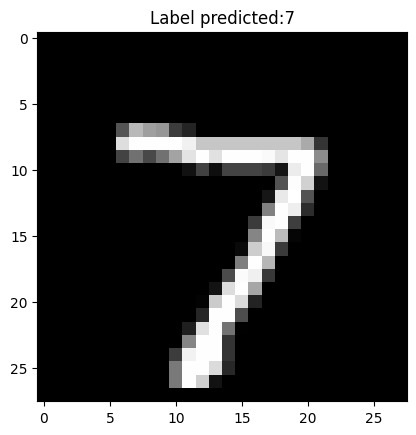

with parameters in {'N_range': [1000], 'T_range': [2], 'ess_alpha_range': [0.8], 'alpha_range': [0.25], 'L_range': [1]}
Current data index: 0


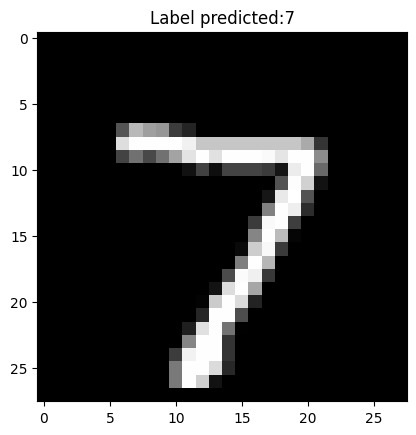

Starting MALA_SMC simulation 1/1, with model: model, img_idx:0,eps:0.18, N: 1000: T: 2: ess_alpha: 0.8: alpha: 0.25: L: 1


100%|██████████| 400/400 [01:43<00:00,  3.88it/s]


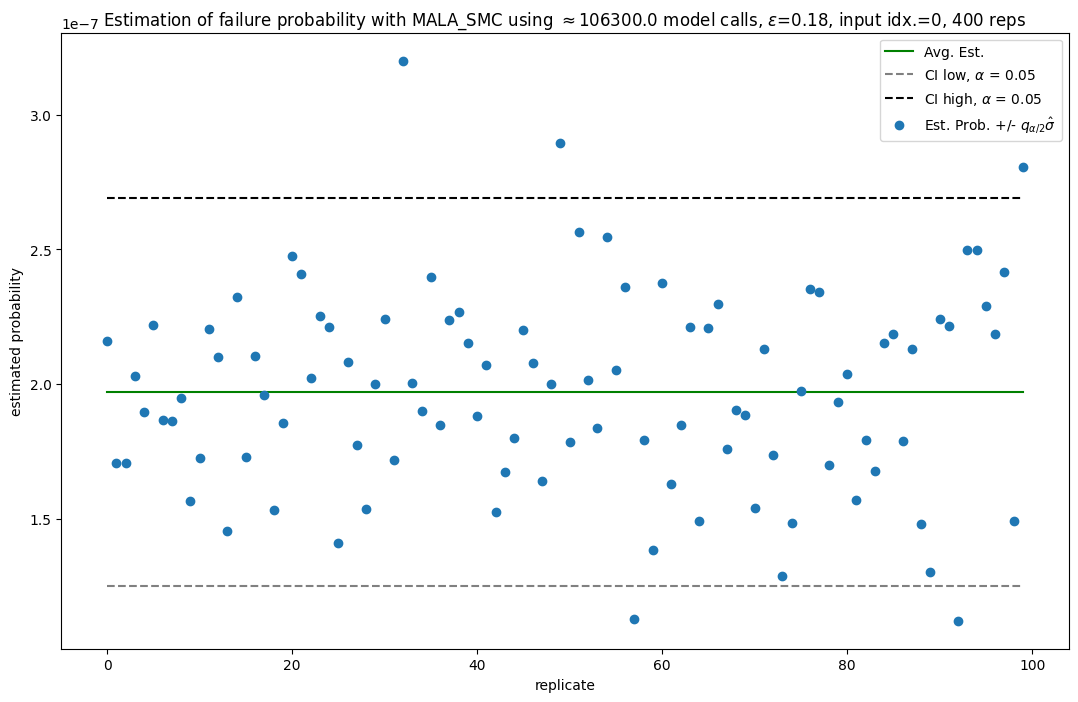

mean est:1.9706521525719722e-07, std est:3.676871158798173e-08
mean calls:106300.0
std. re.:946800.4767344911
std. rel. adj.:100644890676.8764
p_fail_mala=1.9706521525719722e-07


In [ ]:
N_range_low = [50,100,200,500]
N_range_high = [1000,2000,5000,10000]
N_range = N_range_low + N_range_high

p_fail_mala, dict_out=run_est.run_est(model=exp_config.model,method='mala2',X=None,y=None,dataset_name='mnist',
                        n_rep=400, verbose=0, track_accept=False,ess_alpha_range=[0.8], input_start=input_start,input_stop=input_start+1,
                        alpha=0.25, L_range=[1], only_duplicated=False, p_re=p_ref, 
                         N=1000,T_range=[2],epsilon_range=exp_config.epsilon_range,
                         repeat_exp=True,
 )


exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

Files already downloaded and verified
Current data index: 0
Current data index: 0


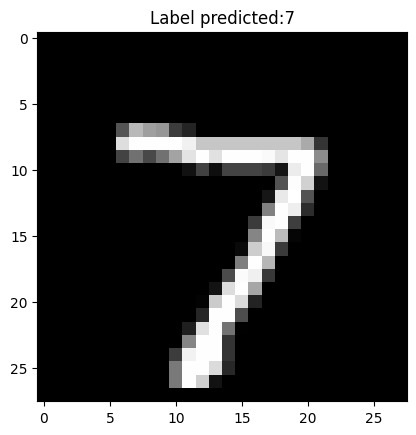

with parameters in {'N_range': [5000], 'T_range': [10], 'ratio_range': [0.5], 's_range': [1.0]}
Current data index: 0


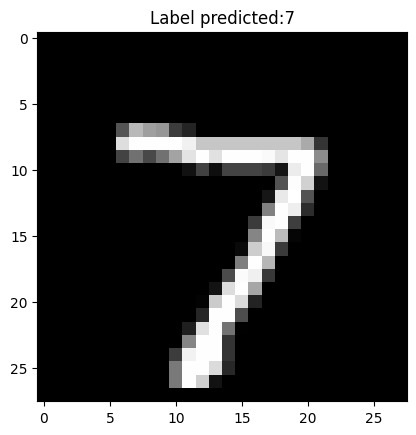

Starting MLS_SMC simulation 1/1, with model: model, img_idx:0,eps:0.25, N: 5000: T: 10: ratio: 0.5: s: 1.0


100%|██████████| 100/100 [00:17<00:00,  5.78it/s]


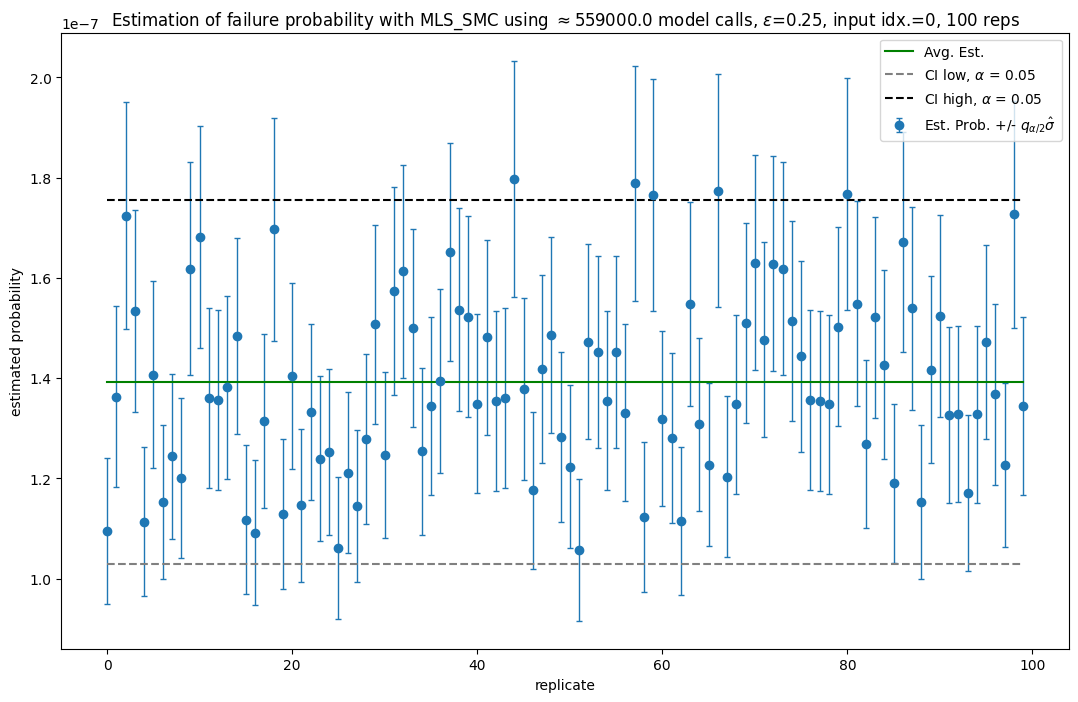

mean est:1.3920879364013674e-07, std est:1.8502120092412166e-08
mean calls:559000.0
std. re.:954746.6772394463
std. rel. adj.:533703392576.85046
p_fail_mls: 1.3920879364013674e-07


In [ ]:
N_range_low = [50,100,200,500]
N_range_high = [1000,2000,5000,10000]
N_range = N_range_low + N_range_high
T_range_low= [2,5,10,20]
T_range_high = [50,100,200,500]
T_range = T_range_low + T_range_high
p_fail_mls,dict_out=run_est.run_est(model=model,method='amls_batch',X=exp_config.X,y=exp_config.y,dataset_name=dataset,
                        epsilon_range=[0.25], n_rep=100, update_aggr_res=True, alt_functions=True, noise_dist='uniform',
                        input_start=input_start,input_stop=input_start+1,
                        
                         N_range=[5000],T_range=[10],ratio_range=[0.5,],repeat_exp=False,
                        verbose=0,np_seed=0, torch_seed=0,)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

In [ ]:
reload(is_pyt)

<module 'stat_reliability_measure.dev.imp_sampling.is_pyt' from '/home/karimtito/repos/stat_reliability_measure/dev/imp_sampling/is_pyt.py'>

Files already downloaded and verified
Current data index: 0
Current data index: 0


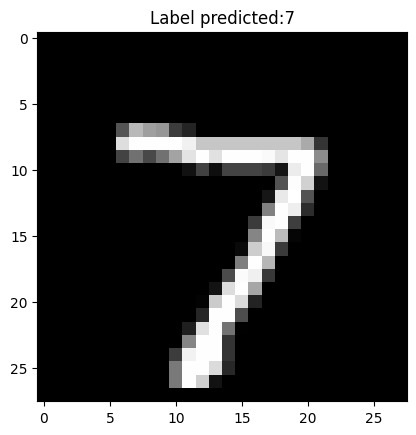

with parameters in {'N_range': [10000], 'batch_size_range': [2000]}
Current data index: 0


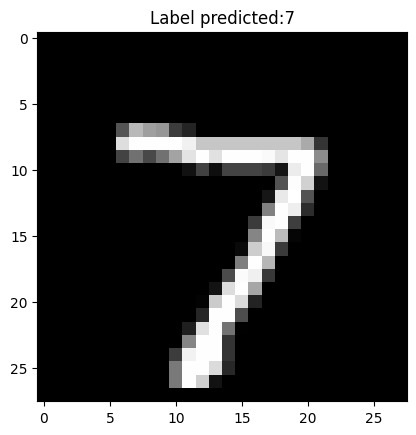

Starting IS simulation 1/3, with model: model, img_idx:0,eps:0.18, N: 10000: batch_size: 2000


  0%|          | 0/400 [00:00<?, ?it/s]

  1%|          | 3/400 [00:00<00:15, 25.92it/s]

  2%|▏         | 7/400 [00:00<00:13, 29.72it/s]

  3%|▎         | 11/400 [00:00<00:12, 30.34it/s]

  4%|▍         | 15/400 [00:00<00:11, 32.57it/s]

  5%|▍         | 19/400 [00:00<00:11, 32.66it/s]

  6%|▌         | 23/400 [00:00<00:11, 31.69it/s]

  7%|▋         | 27/400 [00:00<00:11, 32.47it/s]

  8%|▊         | 31/400 [00:00<00:11, 32.89it/s]

  9%|▉         | 35/400 [00:01<00:11, 32.63it/s]

 10%|▉         | 39/400 [00:01<00:11, 32.77it/s]

 11%|█         | 43/400 [00:01<00:10, 34.19it/s]

 12%|█▏        | 47/400 [00:01<00:10, 35.03it/s]

 13%|█▎        | 51/400 [00:01<00:09, 35.95it/s]

 14%|█▍        | 55/400 [00:01<00:10, 34.39it/s]

 15%|█▍        | 59/400 [00:01<00:09, 35.04it/s]

 16%|█▌        | 63/400 [00:01<00:09, 34.99it/s]

 17%|█▋        | 67/400 [00:02<00:09, 34.57it/s]

 18%|█▊        | 71/400 [00:02<00:09, 33.48it/s]

 19%|█▉        | 75/400 [00:02<00:09, 33.83it/s]

 20%|█▉        | 79/400 [00:02<00:09, 34.08it/s]

 21%|██        | 83/400 [00:02<00:09, 32.79it/s]

 22%|██▏       | 87/400 [00:02<00:10, 30.10it/s]

 24%|██▍       | 95/400 [00:02<00:10, 30.33it/s]

 26%|██▌       | 103/400 [00:03<00:09, 32.13it/s]

 27%|██▋       | 107/400 [00:03<00:09, 32.41it/s]

 29%|██▉       | 115/400 [00:03<00:08, 33.75it/s]

 31%|███       | 123/400 [00:03<00:08, 31.21it/s]

 33%|███▎      | 131/400 [00:04<00:08, 33.34it/s]

 35%|███▍      | 139/400 [00:04<00:08, 32.52it/s]

 36%|███▌      | 143/400 [00:04<00:07, 34.27it/s]

 38%|███▊      | 151/400 [00:04<00:07, 32.12it/s]

 40%|███▉      | 159/400 [00:04<00:07, 32.94it/s]

 42%|████▏     | 167/400 [00:05<00:06, 33.80it/s]

 44%|████▍     | 175/400 [00:05<00:06, 32.75it/s]

 45%|████▍     | 179/400 [00:05<00:06, 32.92it/s]

 47%|████▋     | 187/400 [00:05<00:06, 31.37it/s]

 49%|████▉     | 195/400 [00:05<00:06, 31.54it/s]

 51%|█████     | 203/400 [00:06<00:06, 29.50it/s]

 53%|█████▎    | 211/400 [00:06<00:05, 32.81it/s]

 54%|█████▍    | 215/400 [00:06<00:06, 30.35it/s]

 56%|█████▌    | 223/400 [00:06<00:05, 31.96it/s]

 58%|█████▊    | 231/400 [00:07<00:05, 33.22it/s]

 60%|█████▉    | 239/400 [00:07<00:04, 34.62it/s]

 62%|██████▏   | 247/400 [00:07<00:04, 36.29it/s]

 64%|██████▍   | 255/400 [00:07<00:04, 36.00it/s]

 66%|██████▌   | 263/400 [00:07<00:03, 34.78it/s]

 67%|██████▋   | 267/400 [00:08<00:04, 32.69it/s]

 69%|██████▉   | 275/400 [00:08<00:03, 32.39it/s]

 71%|███████   | 283/400 [00:08<00:03, 32.20it/s]

 72%|███████▏  | 287/400 [00:08<00:03, 32.19it/s]

 74%|███████▍  | 295/400 [00:09<00:03, 31.45it/s]

 76%|███████▌  | 303/400 [00:09<00:03, 32.00it/s]

 77%|███████▋  | 307/400 [00:09<00:02, 32.30it/s]

 79%|███████▉  | 315/400 [00:09<00:02, 31.83it/s]

 81%|████████  | 323/400 [00:09<00:02, 32.60it/s]

 83%|████████▎ | 331/400 [00:10<00:02, 32.46it/s]

 85%|████████▍ | 339/400 [00:10<00:01, 32.17it/s]

 86%|████████▌ | 343/400 [00:10<00:01, 32.48it/s]

 88%|████████▊ | 351/400 [00:10<00:01, 33.01it/s]

 90%|████████▉ | 359/400 [00:10<00:01, 32.41it/s]

 92%|█████████▏| 367/400 [00:11<00:01, 32.90it/s]

 93%|█████████▎| 371/400 [00:11<00:00, 31.61it/s]

 95%|█████████▍| 379/400 [00:11<00:00, 32.36it/s]

 96%|█████████▌| 383/400 [00:11<00:00, 32.23it/s]

 98%|█████████▊| 392/400 [00:11<00:00, 35.84it/s]

100%|██████████| 400/400 [00:12<00:00, 32.78it/s]


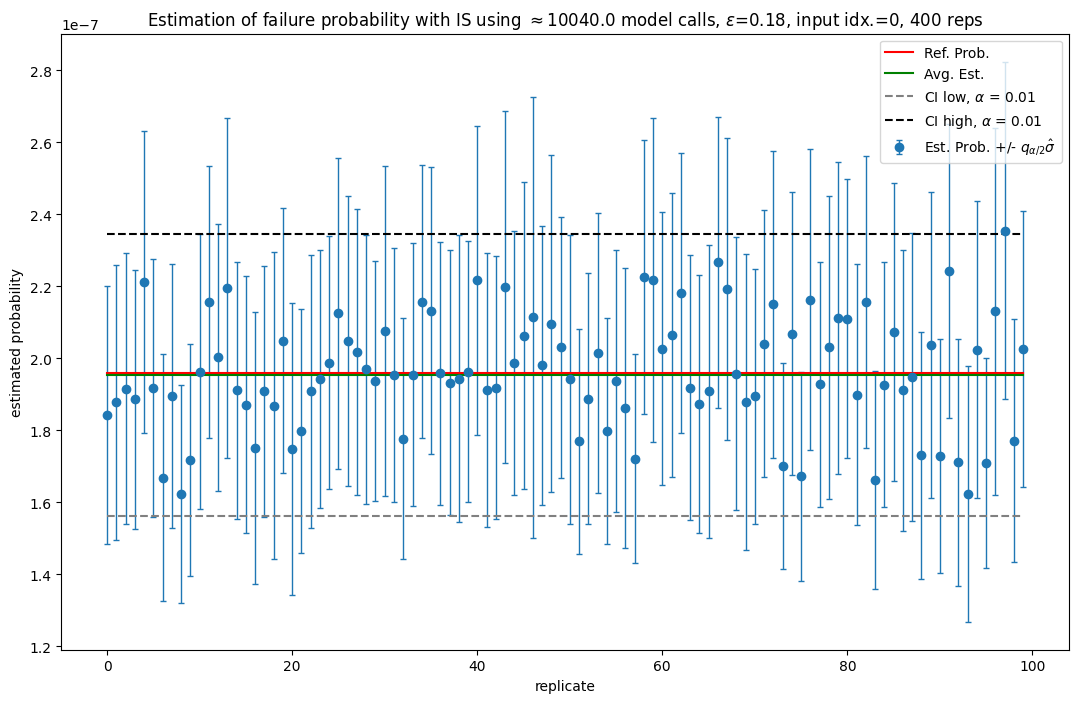

mean est:1.9528557970716065e-07, std est:1.5203754699655292e-08
mean calls:10040.0
std. re.:398667.19773904665
std. rel. adj.:4002618665.3000283
mean rel. error:0.0631653293967247
std rel. error:0.045193012803792953
stat performance (per 1k calls):0.4537378485500812
Current data index: 0


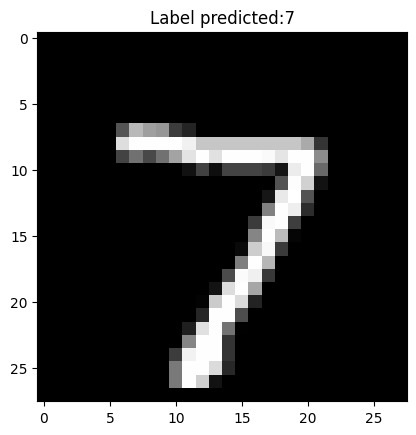

Starting IS simulation 2/3, with model: model, img_idx:0,eps:0.2, N: 10000: batch_size: 2000


  1%|          | 4/400 [00:00<00:12, 32.99it/s]

  3%|▎         | 12/400 [00:00<00:12, 32.13it/s]

  5%|▌         | 20/400 [00:00<00:10, 34.86it/s]

  6%|▌         | 24/400 [00:00<00:11, 33.18it/s]

  7%|▋         | 28/400 [00:00<00:11, 33.14it/s]

  8%|▊         | 32/400 [00:00<00:11, 32.57it/s]

 10%|█         | 40/400 [00:01<00:11, 32.00it/s]

 11%|█         | 44/400 [00:01<00:10, 32.84it/s]

 12%|█▏        | 48/400 [00:01<00:10, 33.00it/s]

 13%|█▎        | 52/400 [00:01<00:10, 32.33it/s]

 15%|█▌        | 60/400 [00:01<00:10, 32.75it/s]

 16%|█▌        | 64/400 [00:01<00:10, 32.47it/s]

 17%|█▋        | 68/400 [00:02<00:10, 32.24it/s]

 18%|█▊        | 72/400 [00:02<00:10, 32.41it/s]

 19%|█▉        | 76/400 [00:02<00:09, 32.95it/s]

 20%|██        | 80/400 [00:02<00:10, 31.81it/s]

 22%|██▏       | 88/400 [00:02<00:09, 33.80it/s]

 24%|██▍       | 97/400 [00:02<00:08, 36.53it/s]

 25%|██▌       | 101/400 [00:03<00:09, 32.14it/s]

 26%|██▋       | 105/400 [00:03<00:09, 31.67it/s]

 27%|██▋       | 109/400 [00:03<00:08, 33.46it/s]

 28%|██▊       | 113/400 [00:03<00:08, 34.28it/s]

 29%|██▉       | 117/400 [00:03<00:08, 32.94it/s]

 31%|███▏      | 125/400 [00:03<00:08, 30.89it/s]

 32%|███▏      | 129/400 [00:03<00:08, 31.10it/s]

 33%|███▎      | 133/400 [00:04<00:08, 32.48it/s]

 34%|███▍      | 137/400 [00:04<00:08, 32.83it/s]

 35%|███▌      | 141/400 [00:04<00:07, 33.46it/s]

 36%|███▋      | 145/400 [00:04<00:07, 32.16it/s]

 37%|███▋      | 149/400 [00:04<00:08, 30.54it/s]

 38%|███▊      | 153/400 [00:04<00:07, 30.92it/s]

 39%|███▉      | 157/400 [00:04<00:07, 31.82it/s]

 40%|████      | 161/400 [00:04<00:07, 32.50it/s]

 41%|████▏     | 165/400 [00:05<00:07, 32.03it/s]

 42%|████▏     | 169/400 [00:05<00:07, 32.00it/s]

 43%|████▎     | 173/400 [00:05<00:07, 30.41it/s]

 44%|████▍     | 177/400 [00:05<00:07, 29.56it/s]

 45%|████▌     | 180/400 [00:05<00:07, 29.61it/s]

 46%|████▌     | 183/400 [00:05<00:07, 29.50it/s]

 47%|████▋     | 187/400 [00:05<00:07, 30.34it/s]

 48%|████▊     | 191/400 [00:05<00:06, 30.37it/s]

 50%|████▉     | 199/400 [00:06<00:06, 31.07it/s]

 51%|█████     | 203/400 [00:06<00:06, 31.34it/s]

 52%|█████▏    | 207/400 [00:06<00:06, 31.58it/s]

 53%|█████▎    | 211/400 [00:06<00:05, 31.87it/s]

 54%|█████▍    | 215/400 [00:06<00:05, 32.03it/s]

 55%|█████▍    | 219/400 [00:06<00:05, 33.21it/s]

 57%|█████▋    | 227/400 [00:07<00:05, 32.98it/s]

 59%|█████▉    | 235/400 [00:07<00:04, 33.71it/s]

 60%|█████▉    | 239/400 [00:07<00:04, 32.57it/s]

 61%|██████    | 243/400 [00:07<00:05, 30.86it/s]

 62%|██████▏   | 247/400 [00:07<00:04, 31.79it/s]

 63%|██████▎   | 251/400 [00:07<00:04, 32.46it/s]

 64%|██████▍   | 255/400 [00:07<00:04, 33.61it/s]

 66%|██████▌   | 263/400 [00:08<00:04, 32.07it/s]

 68%|██████▊   | 271/400 [00:08<00:03, 33.06it/s]

 69%|██████▉   | 275/400 [00:08<00:03, 32.82it/s]

 70%|██████▉   | 279/400 [00:08<00:03, 33.17it/s]

 71%|███████   | 283/400 [00:08<00:03, 33.24it/s]

 73%|███████▎  | 291/400 [00:09<00:03, 32.92it/s]

 75%|███████▍  | 299/400 [00:09<00:02, 33.95it/s]

 76%|███████▌  | 303/400 [00:09<00:02, 33.62it/s]

 77%|███████▋  | 307/400 [00:09<00:02, 33.26it/s]

 78%|███████▊  | 311/400 [00:09<00:02, 32.05it/s]

 80%|███████▉  | 319/400 [00:09<00:02, 33.62it/s]

 82%|████████▏ | 327/400 [00:10<00:02, 32.45it/s]

 83%|████████▎ | 331/400 [00:10<00:02, 31.43it/s]

 84%|████████▍ | 335/400 [00:10<00:01, 32.92it/s]

 85%|████████▍ | 339/400 [00:10<00:01, 31.77it/s]

 87%|████████▋ | 347/400 [00:10<00:01, 33.01it/s]

 89%|████████▉ | 355/400 [00:10<00:01, 32.79it/s]

 90%|████████▉ | 359/400 [00:11<00:01, 32.03it/s]

 91%|█████████ | 363/400 [00:11<00:01, 31.68it/s]

 92%|█████████▏| 367/400 [00:11<00:01, 30.88it/s]

 94%|█████████▍| 375/400 [00:11<00:00, 31.12it/s]

 96%|█████████▌| 383/400 [00:11<00:00, 32.48it/s]

 98%|█████████▊| 391/400 [00:12<00:00, 33.74it/s]

100%|█████████▉| 399/400 [00:12<00:00, 33.02it/s]

100%|██████████| 400/400 [00:12<00:00, 32.36it/s]


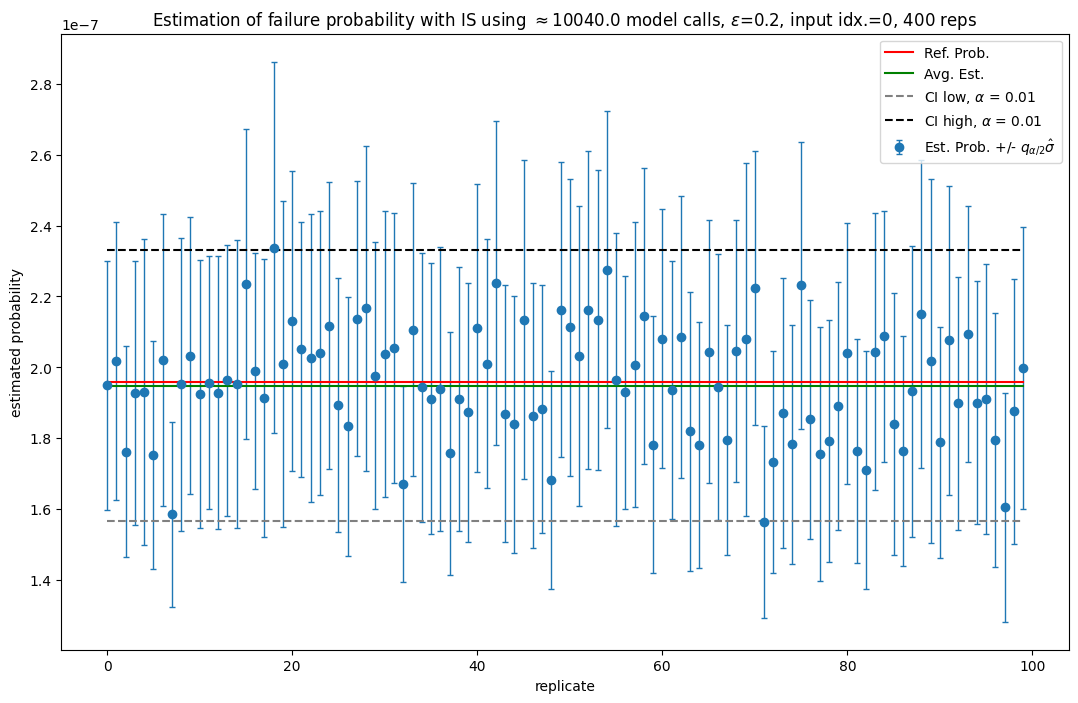

mean est:1.9482817492644244e-07, std est:1.4849461216215332e-08
mean calls:10040.0
std. re.:391207.4997147465
std. rel. adj.:3927723297.1360545
mean rel. error:0.05943974480032921
std rel. error:0.04735621064901352
stat performance (per 1k calls):0.47545635491609567
Current data index: 0


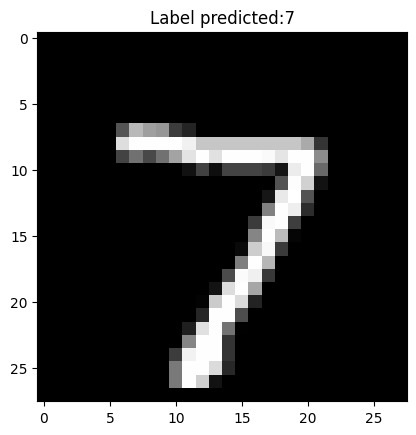

Starting IS simulation 3/3, with model: model, img_idx:0,eps:0.22, N: 10000: batch_size: 2000


  1%|          | 4/400 [00:00<00:11, 34.48it/s]

  2%|▏         | 8/400 [00:00<00:13, 29.58it/s]

  3%|▎         | 12/400 [00:00<00:12, 31.19it/s]

  4%|▍         | 16/400 [00:00<00:12, 31.48it/s]

  5%|▌         | 20/400 [00:00<00:12, 30.59it/s]

  6%|▌         | 24/400 [00:00<00:12, 30.50it/s]

  7%|▋         | 28/400 [00:00<00:11, 32.13it/s]

  8%|▊         | 32/400 [00:01<00:11, 33.19it/s]

  9%|▉         | 36/400 [00:01<00:11, 30.88it/s]

 10%|█         | 40/400 [00:01<00:11, 31.43it/s]

 11%|█         | 44/400 [00:01<00:11, 31.72it/s]

 12%|█▏        | 48/400 [00:01<00:10, 32.46it/s]

 13%|█▎        | 52/400 [00:01<00:10, 32.72it/s]

 14%|█▍        | 56/400 [00:01<00:10, 33.40it/s]

 15%|█▌        | 60/400 [00:01<00:10, 31.31it/s]

 16%|█▌        | 64/400 [00:02<00:10, 31.98it/s]

 17%|█▋        | 68/400 [00:02<00:09, 33.45it/s]

 18%|█▊        | 72/400 [00:02<00:09, 33.99it/s]

 19%|█▉        | 76/400 [00:02<00:09, 33.49it/s]

 20%|██        | 80/400 [00:02<00:09, 33.25it/s]

 22%|██▏       | 88/400 [00:02<00:09, 32.77it/s]

 24%|██▍       | 96/400 [00:02<00:09, 33.18it/s]

 26%|██▌       | 104/400 [00:03<00:08, 34.01it/s]

 28%|██▊       | 112/400 [00:03<00:08, 35.23it/s]

 30%|███       | 120/400 [00:03<00:07, 35.88it/s]

 32%|███▏      | 128/400 [00:03<00:07, 36.83it/s]

 33%|███▎      | 132/400 [00:03<00:07, 36.74it/s]

 34%|███▍      | 136/400 [00:04<00:07, 34.04it/s]

 35%|███▌      | 140/400 [00:04<00:07, 34.69it/s]

 37%|███▋      | 148/400 [00:04<00:07, 33.46it/s]

 39%|███▉      | 156/400 [00:04<00:07, 32.67it/s]

 41%|████      | 164/400 [00:04<00:06, 34.16it/s]

 43%|████▎     | 172/400 [00:05<00:06, 34.72it/s]

 45%|████▌     | 180/400 [00:05<00:06, 33.54it/s]

 46%|████▌     | 184/400 [00:05<00:06, 32.23it/s]

 48%|████▊     | 192/400 [00:05<00:07, 29.70it/s]

 49%|████▉     | 196/400 [00:05<00:07, 29.07it/s]

 51%|█████     | 204/400 [00:06<00:06, 31.75it/s]

 53%|█████▎    | 212/400 [00:06<00:05, 33.37it/s]

 55%|█████▌    | 220/400 [00:06<00:05, 35.59it/s]

 57%|█████▋    | 228/400 [00:06<00:04, 34.95it/s]

 59%|█████▉    | 236/400 [00:07<00:04, 34.50it/s]

 60%|██████    | 240/400 [00:07<00:04, 34.08it/s]

 62%|██████▏   | 248/400 [00:07<00:04, 32.86it/s]

 64%|██████▍   | 256/400 [00:07<00:04, 33.46it/s]

 66%|██████▌   | 264/400 [00:07<00:04, 33.25it/s]

 67%|██████▋   | 268/400 [00:08<00:03, 34.22it/s]

 70%|███████   | 280/400 [00:08<00:03, 34.89it/s]

 71%|███████   | 284/400 [00:08<00:03, 33.53it/s]

 73%|███████▎  | 292/400 [00:08<00:03, 34.07it/s]

 75%|███████▌  | 300/400 [00:09<00:02, 33.78it/s]

 77%|███████▋  | 308/400 [00:09<00:02, 32.58it/s]

 79%|███████▉  | 316/400 [00:09<00:02, 32.55it/s]

 81%|████████  | 324/400 [00:09<00:02, 32.98it/s]

 82%|████████▏ | 328/400 [00:09<00:02, 33.17it/s]

 84%|████████▍ | 336/400 [00:10<00:01, 33.96it/s]

 86%|████████▌ | 344/400 [00:10<00:01, 33.12it/s]

 88%|████████▊ | 352/400 [00:10<00:01, 33.53it/s]

 90%|█████████ | 360/400 [00:10<00:01, 34.17it/s]

 92%|█████████▏| 368/400 [00:11<00:00, 33.66it/s]

 93%|█████████▎| 372/400 [00:11<00:00, 33.63it/s]

 95%|█████████▌| 380/400 [00:11<00:00, 31.64it/s]

 97%|█████████▋| 388/400 [00:11<00:00, 33.00it/s]

 98%|█████████▊| 392/400 [00:11<00:00, 32.84it/s]

100%|██████████| 400/400 [00:12<00:00, 33.18it/s]


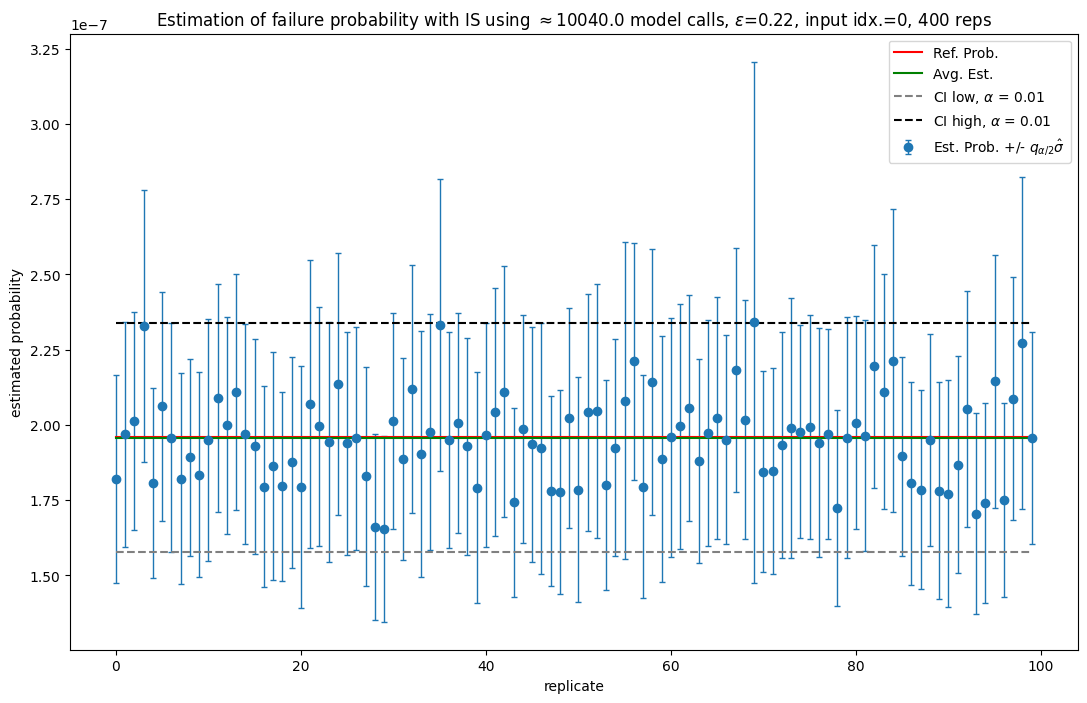

mean est:1.957146054110126e-07, std est:1.4756074584454382e-08
mean calls:10040.0
std. re.:385233.7857457891
std. rel. adj.:3867747208.887723
mean rel. error:0.05972440540790558
std rel. error:0.04589417949318886
stat performance (per 1k calls):0.4607775621116161


KeyError: 'weights_list'

In [ ]:
N_range_high=[5000,10000,20000,50000,10000]
N_range_low = [100,200,500,1000,2000,]
epsilon_range = [0.18,0.2, 0.22]
p_fail_mls,dict_out=run_est.run_est(model=model,method='is',X=config.X,y=config.y,dataset_name=dataset, 
                                    input_start=input_start,input_stop=input_start+1,p_ref=p_ref,real_uniform=False,
                                
                        epsilon_range=epsilon_range, n_rep=400, update_aggr_res=True, save_weights=False,
                         N_range=[10000],batch_size_range=[2000],repeat_exp=True,alpha_CI=0.01,
                        verbose=0,np_seed=0, torch_seed=0,sigma_bias=1.)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
weights_list = dict_out['weights']
print(f"p_fail_mls: {p_fail_mls}")

(array([9.637e+03, 1.000e+02, 7.100e+01, 4.300e+01, 3.700e+01, 2.500e+01,
        1.200e+01, 1.400e+01, 1.200e+01, 9.000e+00, 7.000e+00, 5.000e+00,
        5.000e+00, 1.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.00052045, 0.00104089, 0.00156134, 0.00208179,
        0.00260224, 0.00312268, 0.00364313, 0.00416358, 0.00468402,
        0.00520447, 0.00572492, 0.00624537, 0.00676581, 0.00728626,
        0.00780671, 0.00832715, 0.0088476 , 0.00936805, 0.0098885 ,
        0.01040894, 0.01092939, 0.01144984, 0.01197028, 0.01249073,
        0.01301118, 0.01353163, 0.01405207, 0.01457252, 0.01509297,
        0.01561341, 0.01613386, 0.01665431, 0.01717476, 0.0176952 ,
        0.01821565, 0.0187

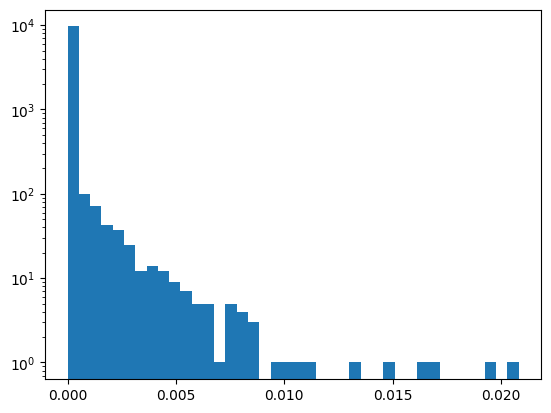

In [ ]:
weights0=weights_list[0]
normalized_weights=weights0/weights0.sum()
#plot histgram of the weights with log scale between 1e-5 and 1e-1
plt.hist(normalized_weights,bins=40,log=True)

In [ ]:
weights_list

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.0462313e-06, 0.0000000e+00], dtype=float32),
 array([0.0000000e+00, 4.1689436e-06, 3.9775614e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 

with parameters in {'N_range': [100, 100, 10000], 'T_range': [2, 5, 10, 20], 'ratio_range': [0.2, 0.5, 0.8], 's_range': [1.0]}
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 1/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:03<00:00, 110.30it/s]


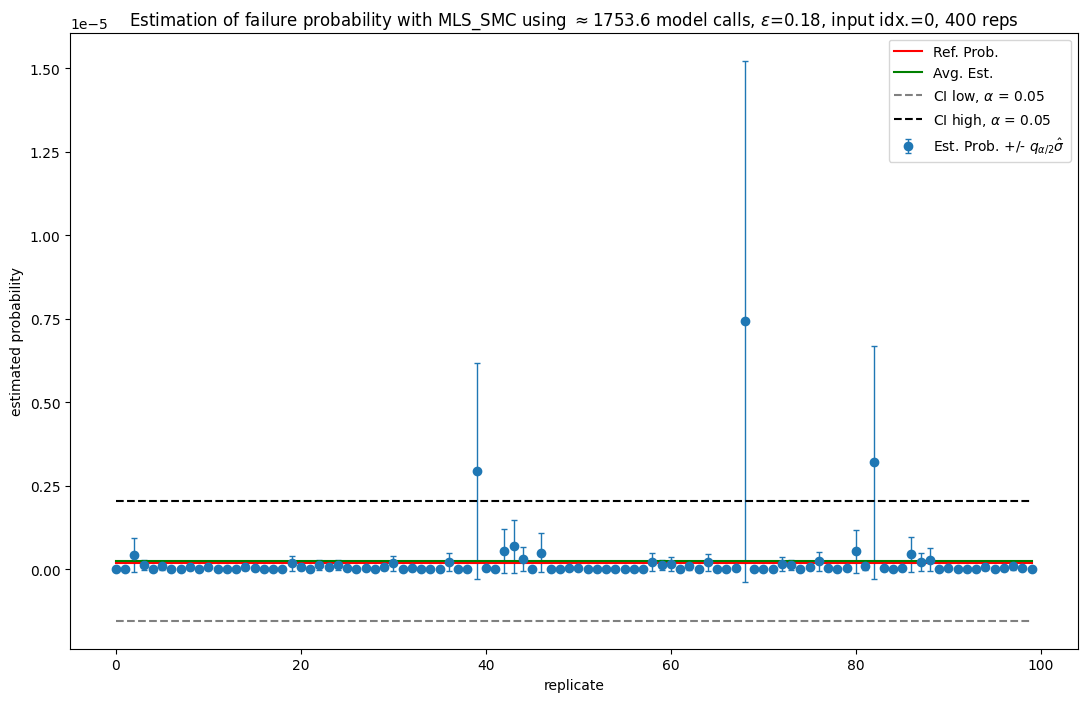

mean est:2.5447429269094413e-07, std est:9.130619251906983e-07
mean calls:1753.6
std. re.:14099782.103787187
std. rel. adj.:24725377897.20121
mean rel. error:1.5945627399173044
std rel. error:4.419012451802254
stat performance (per 1k calls):7.7491802354804316
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 2/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 3/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:23<00:00, 17.28it/s]


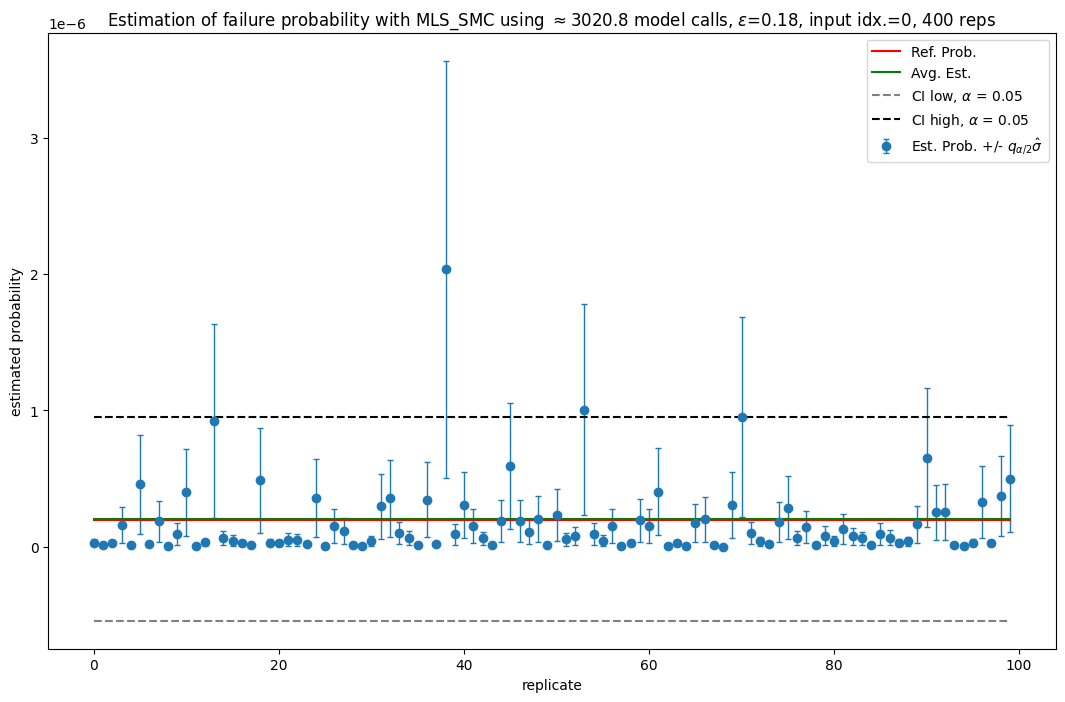

mean est:2.030089310665433e-07, std est:3.806595363073075e-07
mean calls:3020.8
std. re.:9236478.535736648
std. rel. adj.:27901554360.75327
mean rel. error:0.9982970764717206
std rel. error:1.6807389906467884
stat performance (per 1k calls):5.077176342945819
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 4/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:06<00:00, 58.53it/s]


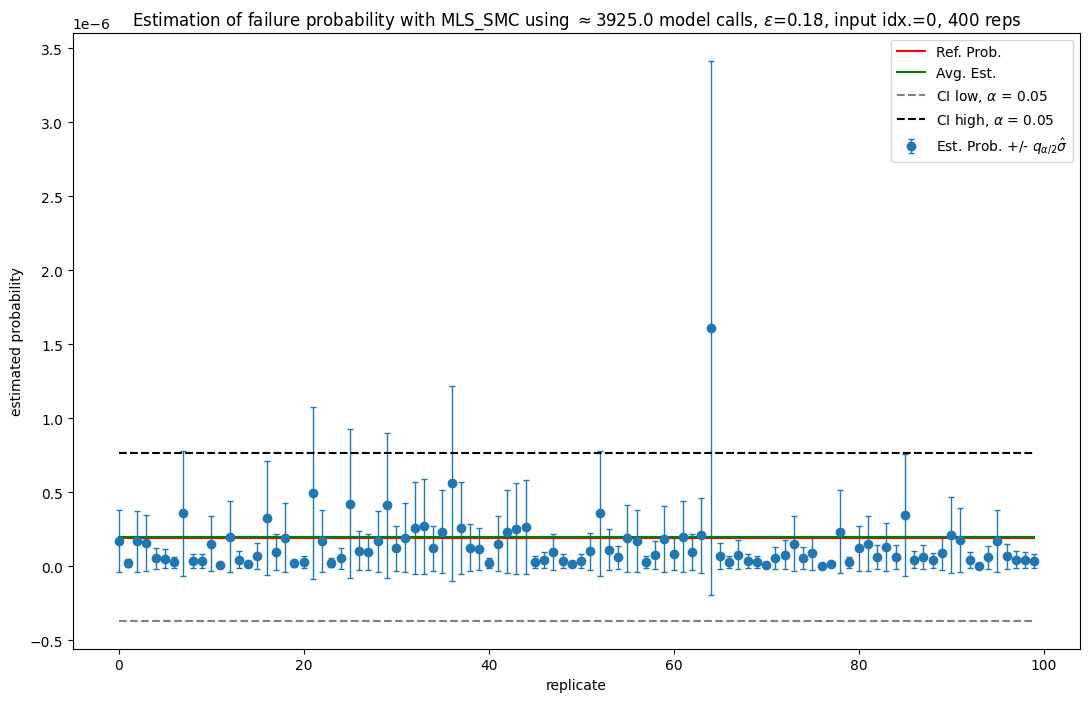

mean est:1.989755904000001e-07, std est:2.8851231379920513e-07
mean calls:3925.0
std. re.:7287268.13511654
std. rel. adj.:28602527430.33242
mean rel. error:0.9049656185190745
std rel. error:1.172919647827694
stat performance (per 1k calls):4.603709617723698
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 5/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 6/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:47<00:00,  8.44it/s]


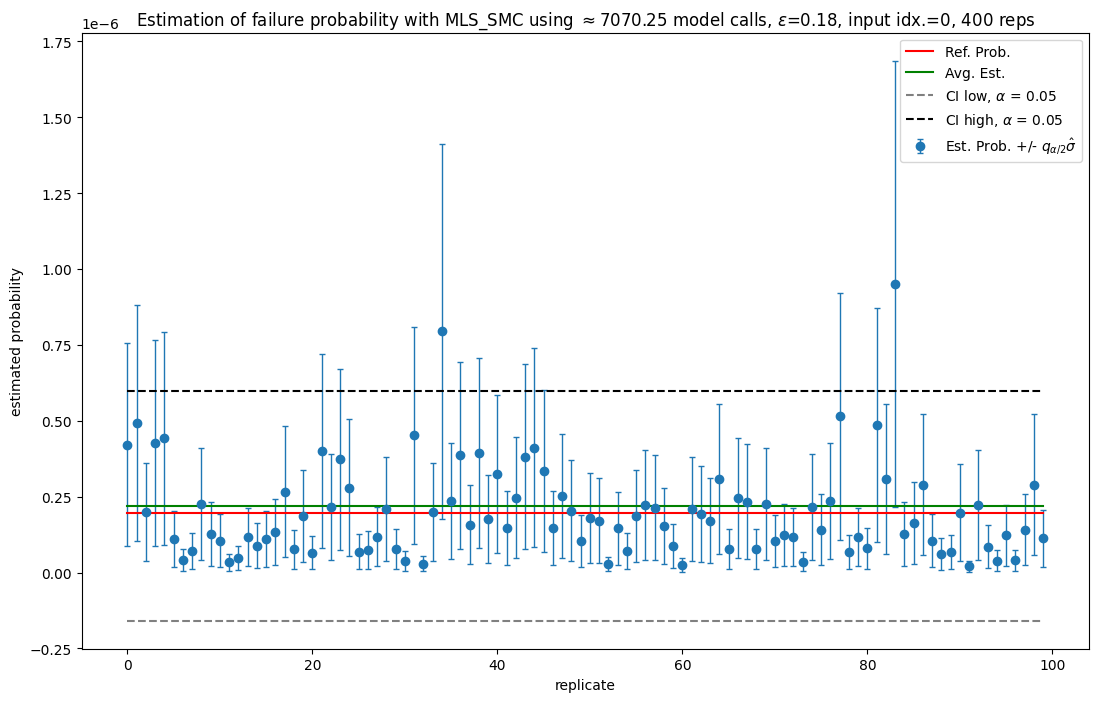

mean est:2.2047144103928907e-07, std est:1.934614938901134e-07
mean calls:7070.25
std. re.:3980062.1663511163
std. rel. adj.:28140034531.64398
mean rel. error:0.6768347590548217
std rel. error:0.7388596741125915
stat performance (per 1k calls):5.223922610894549
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 7/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:12<00:00, 32.06it/s]


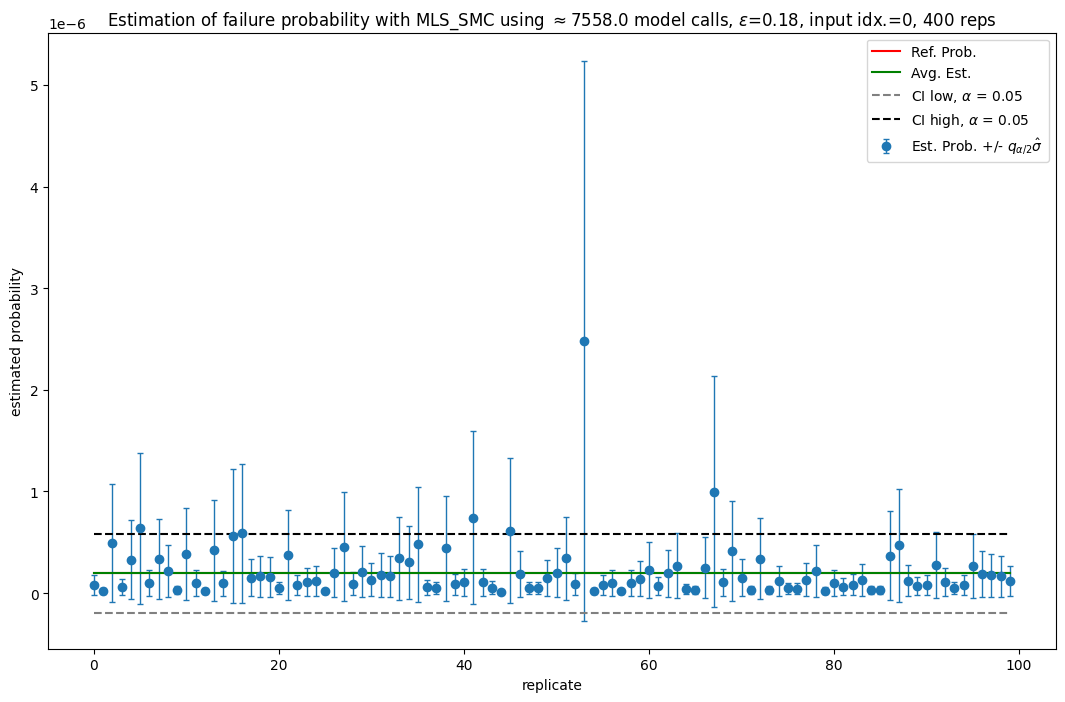

mean est:1.9587737600000007e-07, std est:1.9896309938591392e-07
mean calls:7558.0
std. re.:5185659.330397955
std. rel. adj.:39193213219.14774
mean rel. error:0.6313136119643885
std rel. error:0.803114793544009
stat performance (per 1k calls):6.06994160960562
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 8/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 10: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 9/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:27<00:00,  4.58it/s]


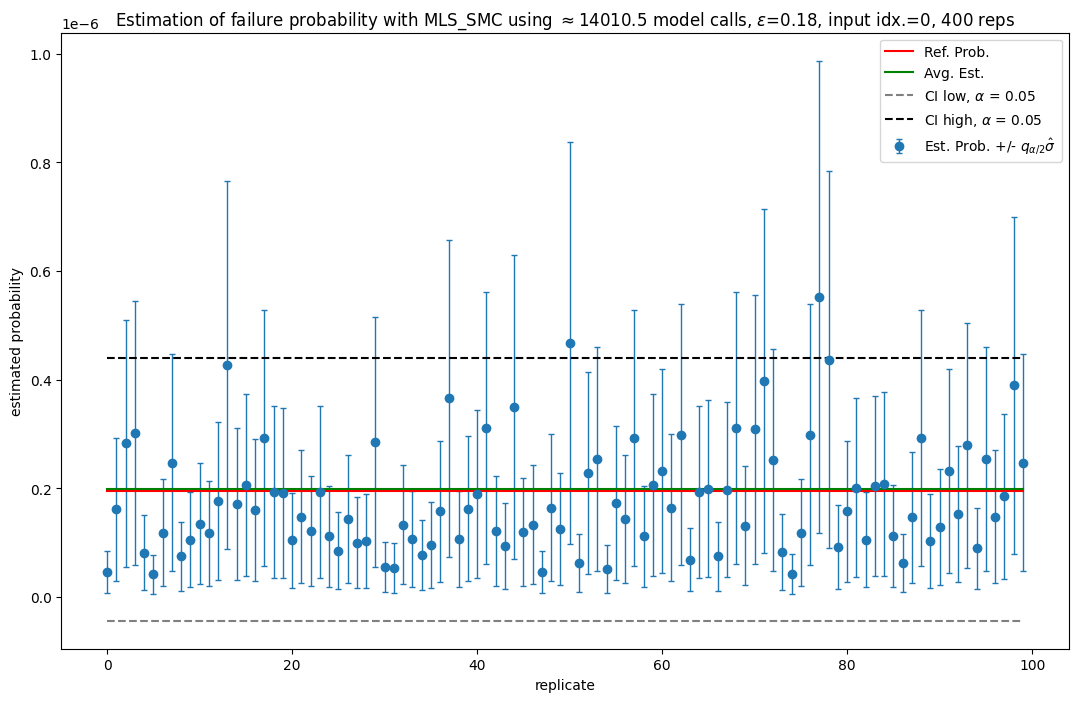

mean est:1.980917854243897e-07, std est:1.2330792795735818e-07
mean calls:14010.5
std. re.:3142375.4075376876
std. rel. adj.:44026250647.30677
mean rel. error:0.4850195461083376
std rel. error:0.40725335476123237
stat performance (per 1k calls):5.705823126882247
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 10/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:23<00:00, 17.05it/s]


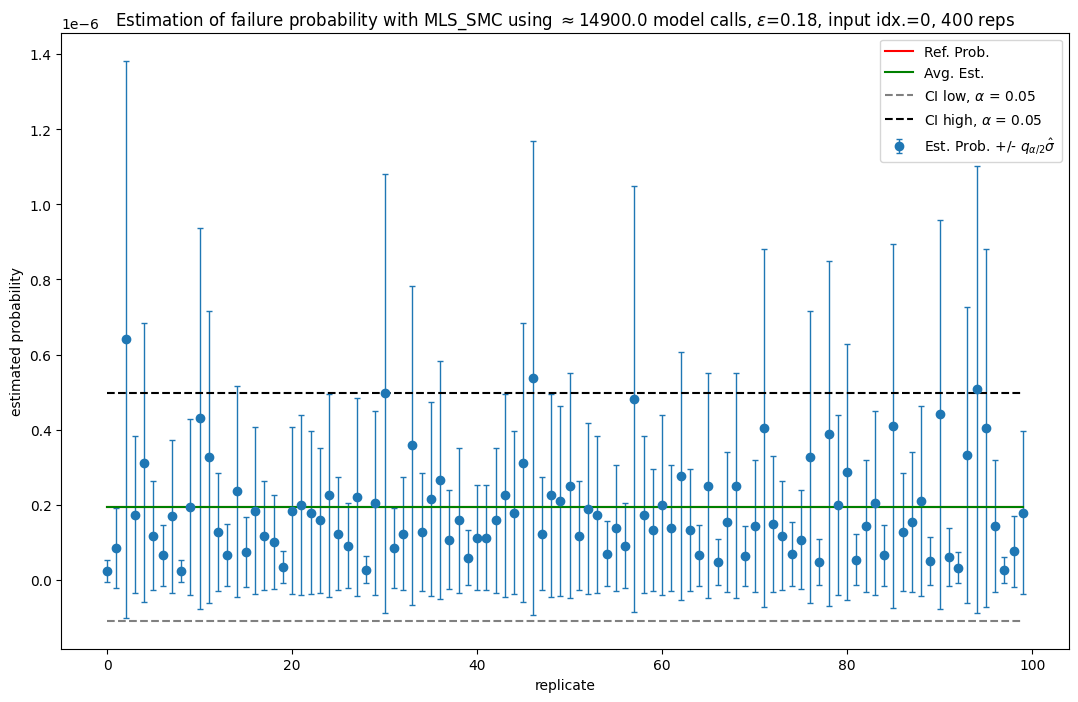

mean est:1.9379353600000009e-07, std est:1.5431844385354047e-07
mean calls:14900.0
std. re.:4109029.5186665524
std. rel. adj.:61224539828.13163
mean rel. error:0.525062611270226
std rel. error:0.593371621928221
stat performance (per 1k calls):8.841237166730494
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 11/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 20: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 12/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [02:45<00:00,  2.41it/s]


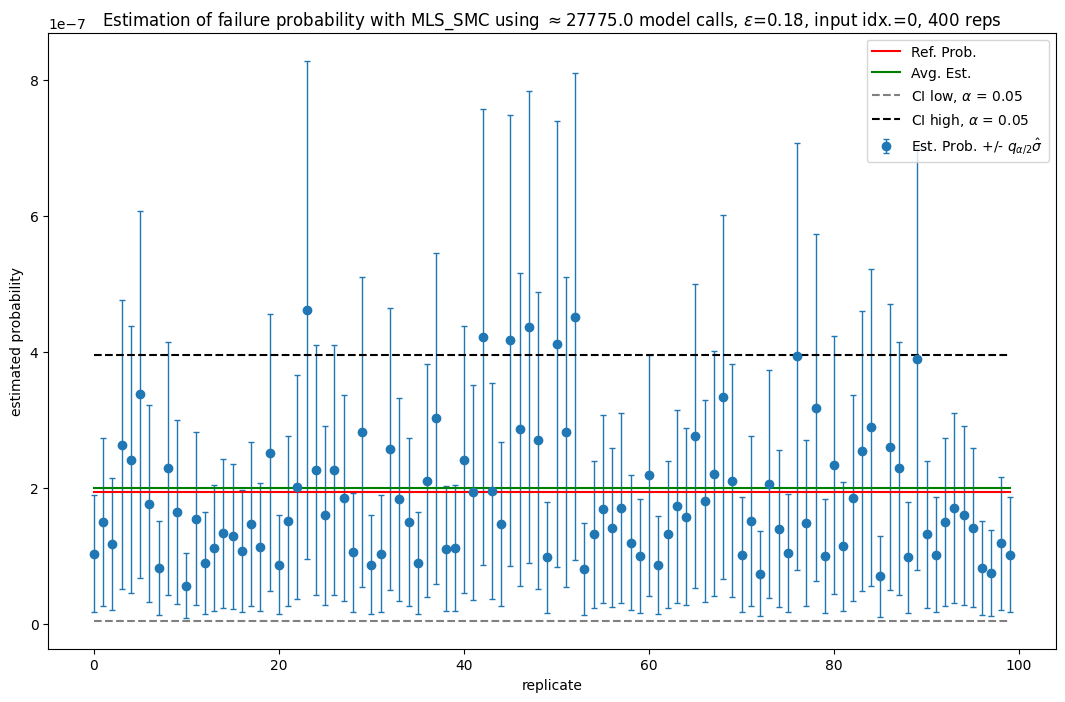

mean est:2.004998278246306e-07, std est:9.981649596328191e-08
mean calls:27775.0
std. re.:2482986.23501959
std. rel. adj.:68964942677.66911
mean rel. error:0.3995672445535278
std rel. error:0.32225851548204204
stat performance (per 1k calls):8.950730267513718
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 13/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.2: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 14/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 15/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 2: ratio: 0.8: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 16/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.2: s: 1.0
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 17/36, with model: mnist_model, img_idx:0,eps:0.18,N: 100: T: 5: ratio: 0.5: s:

100%|██████████| 400/400 [00:28<00:00, 14.14it/s]


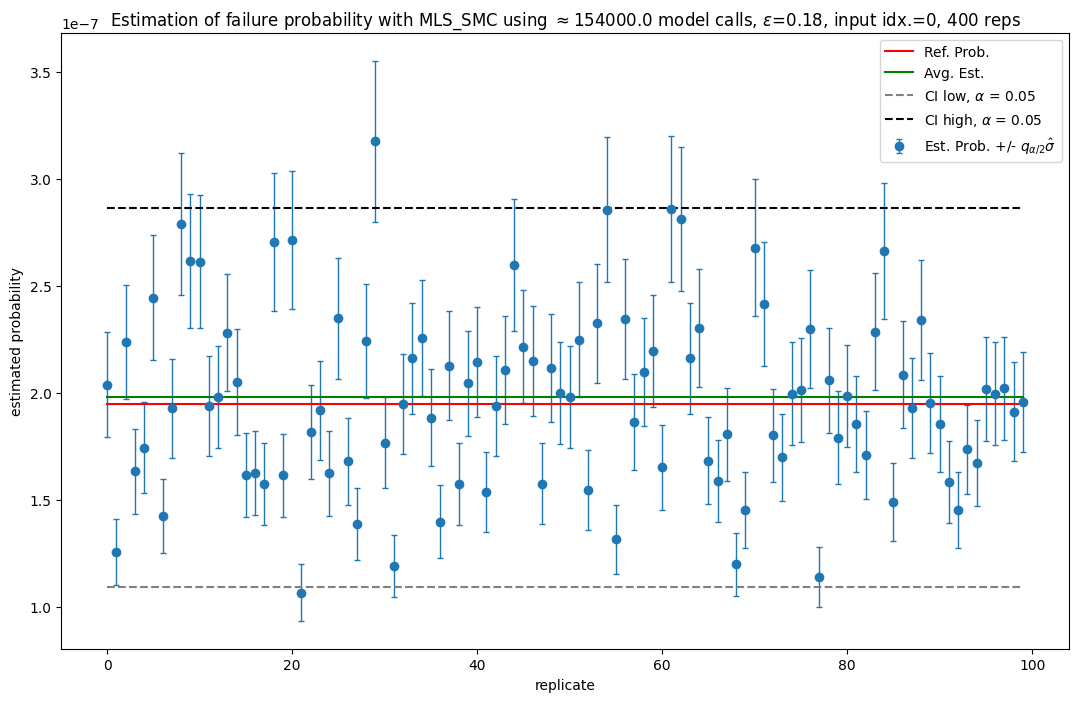

mean est:1.979388160000001e-07, std est:4.514393593140662e-08
mean calls:154000.0
std. re.:1152225.505896107
std. rel. adj.:177442727908.0005
mean rel. error:0.18283861904944043
std rel. error:0.14337672351169609
stat performance (per 1k calls):22.080015420801196
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 26/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 2: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 27/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [00:45<00:00,  8.89it/s]


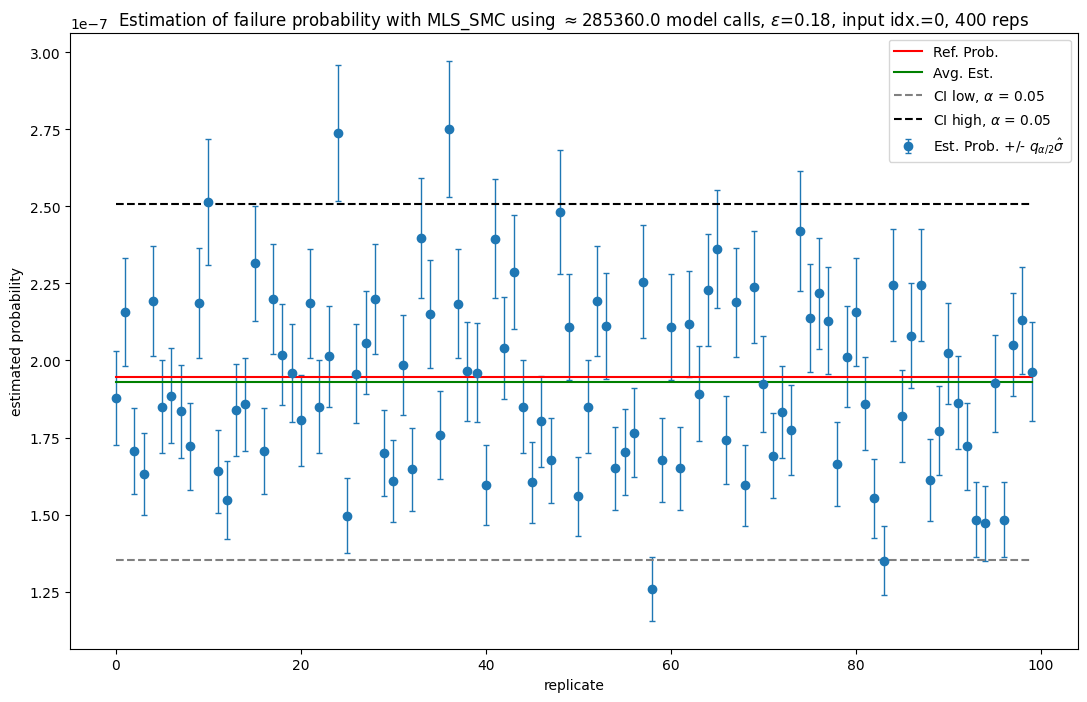

mean est:1.9296330707591091e-07, std est:2.9496031735126003e-08
mean calls:285360.0
std. re.:792162.2173306997
std. rel. adj.:226051410337.48846
mean rel. error:0.12354614923508278
std rel. error:0.08807117982527976
stat performance (per 1k calls):25.131991874941832
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 28/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:02<00:00,  6.38it/s]


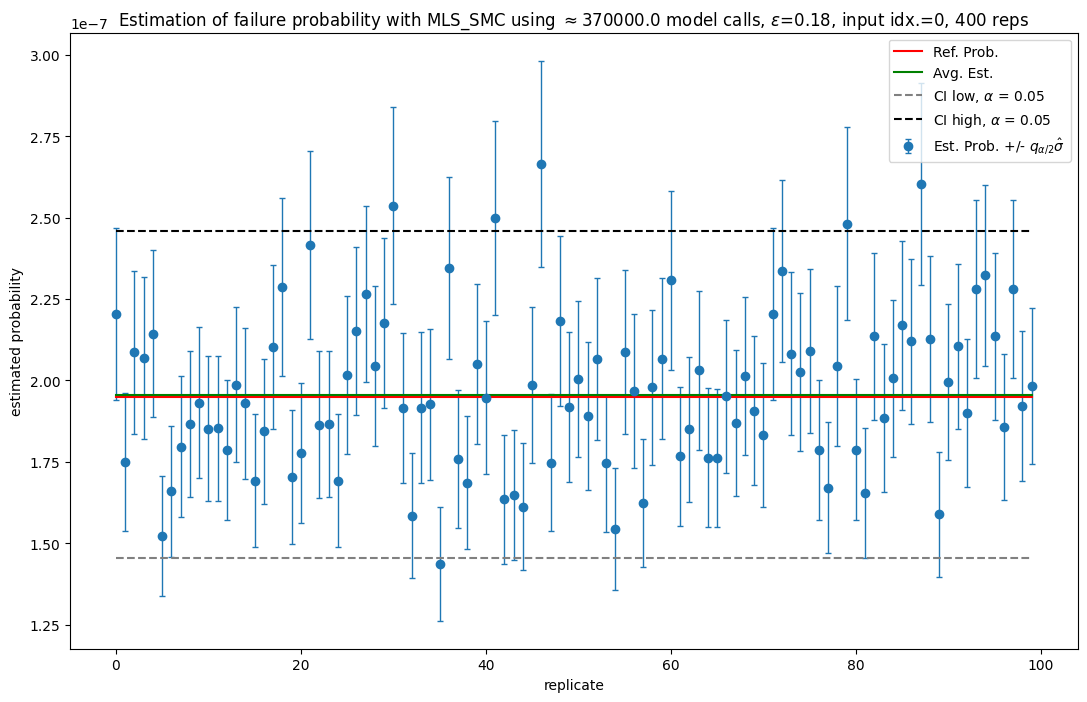

mean est:1.956034560000001e-07, std est:2.5601730276246266e-08
mean calls:370000.0
std. re.:669138.8878706456
std. rel. adj.:247581388512.1389
mean rel. error:0.1042850428023852
std rel. error:0.08013071454716611
stat performance (per 1k calls):29.64836438245146
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 29/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 5: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 30/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:21<00:00,  4.89it/s]


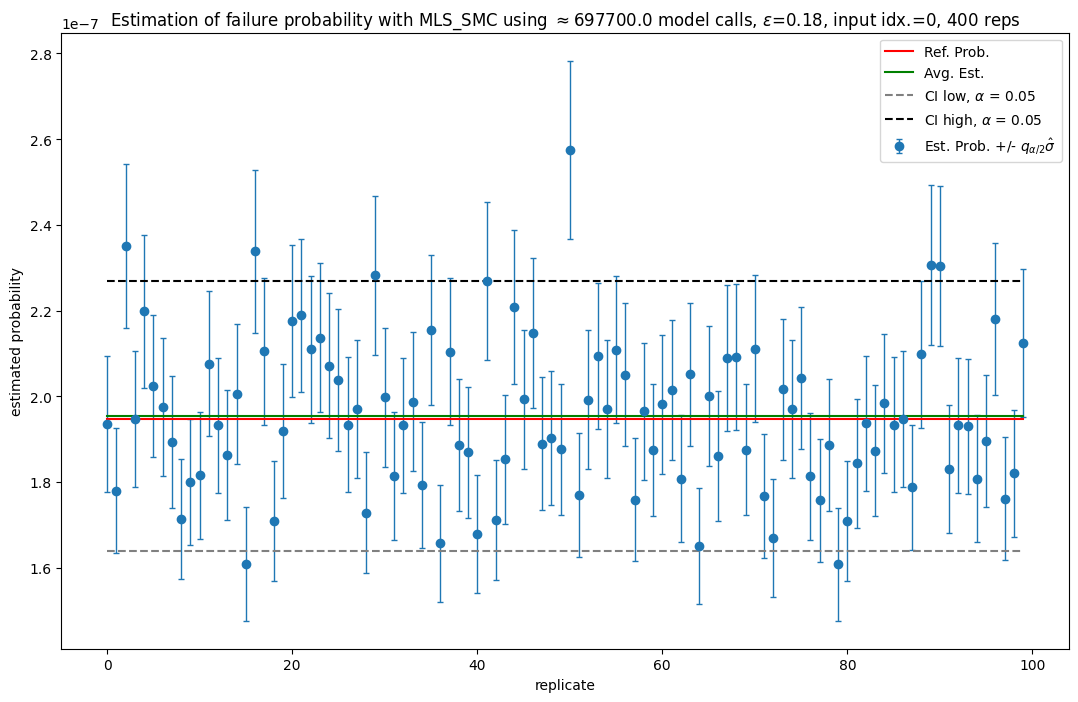

mean est:1.9546001442857874e-07, std est:1.604172842623676e-08
mean calls:697700.0
std. re.:419889.78256965044
std. rel. adj.:292957101298.8451
mean rel. error:0.06407776132248787
std rel. error:0.05186651109623795
stat performance (per 1k calls):36.18726479184522
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 31/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [01:59<00:00,  3.35it/s]


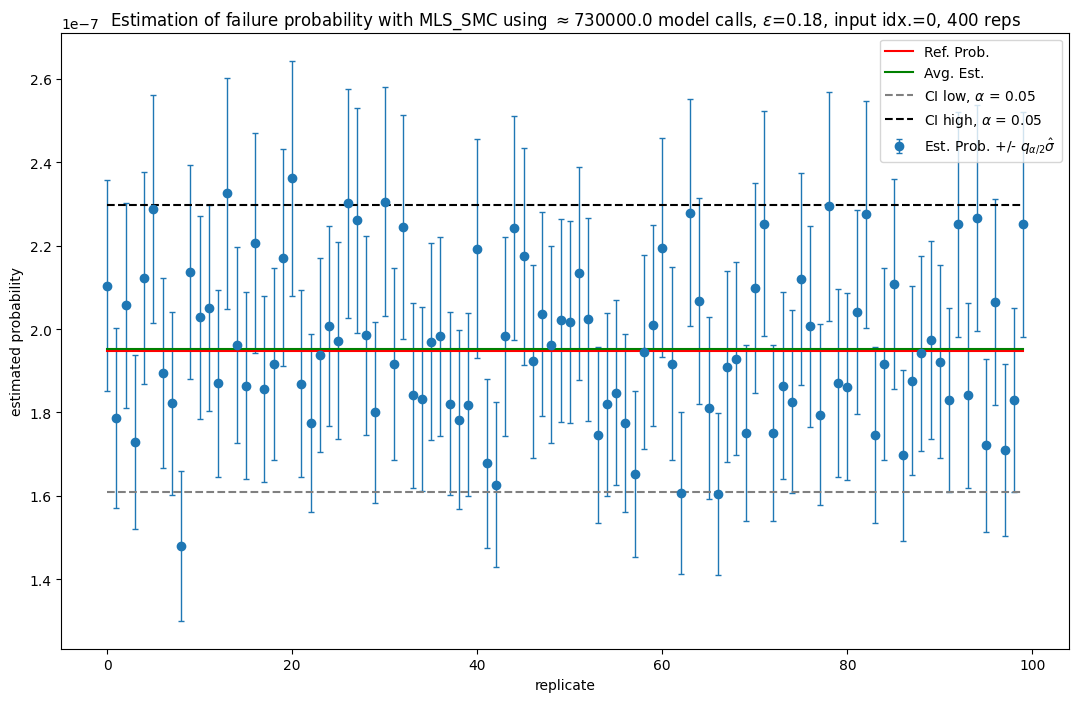

mean est:1.952828160000001e-07, std est:1.7584000170511382e-08
mean calls:730000.0
std. re.:461094.1595181243
std. rel. adj.:336598736448.2307
mean rel. error:0.07208558529043715
std rel. error:0.054416965475629
stat performance (per 1k calls):39.72438479720917
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 32/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 10: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 33/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [02:22<00:00,  2.80it/s]


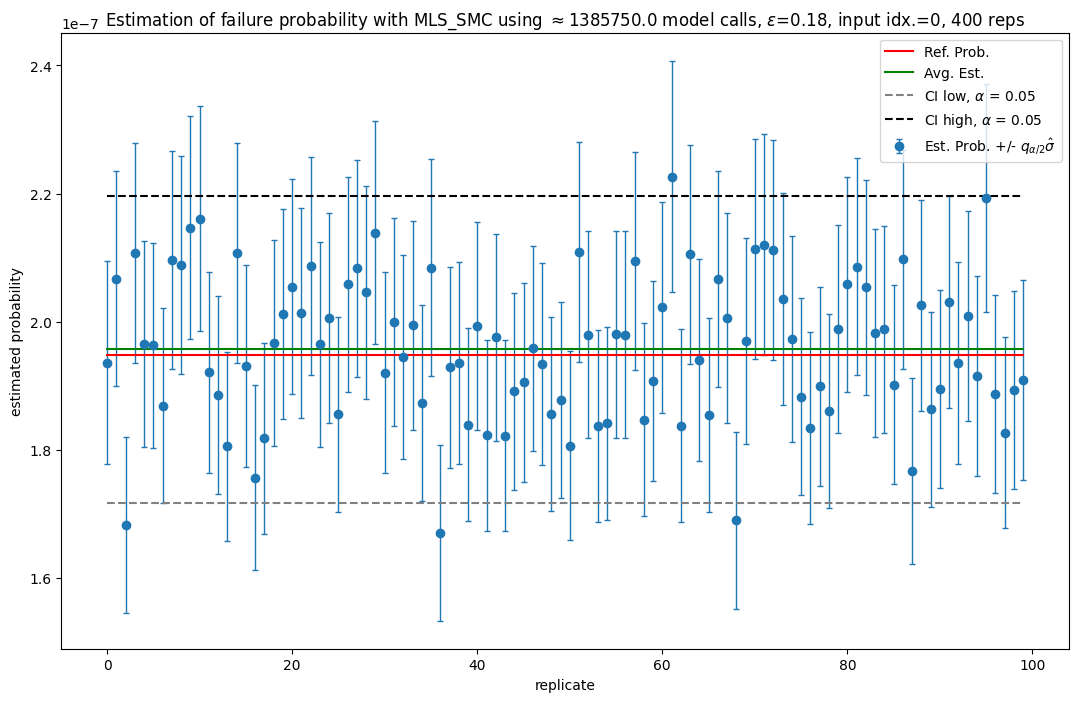

mean est:1.9570929294240766e-07, std est:1.2232515776016742e-08
mean calls:1385750.0
std. re.:319369.09577236534
std. rel. adj.:442565724466.5553
mean rel. error:0.05082101551076172
std rel. error:0.03721450987501363
stat performance (per 1k calls):51.57000705930014
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 34/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [03:53<00:00,  1.72it/s]


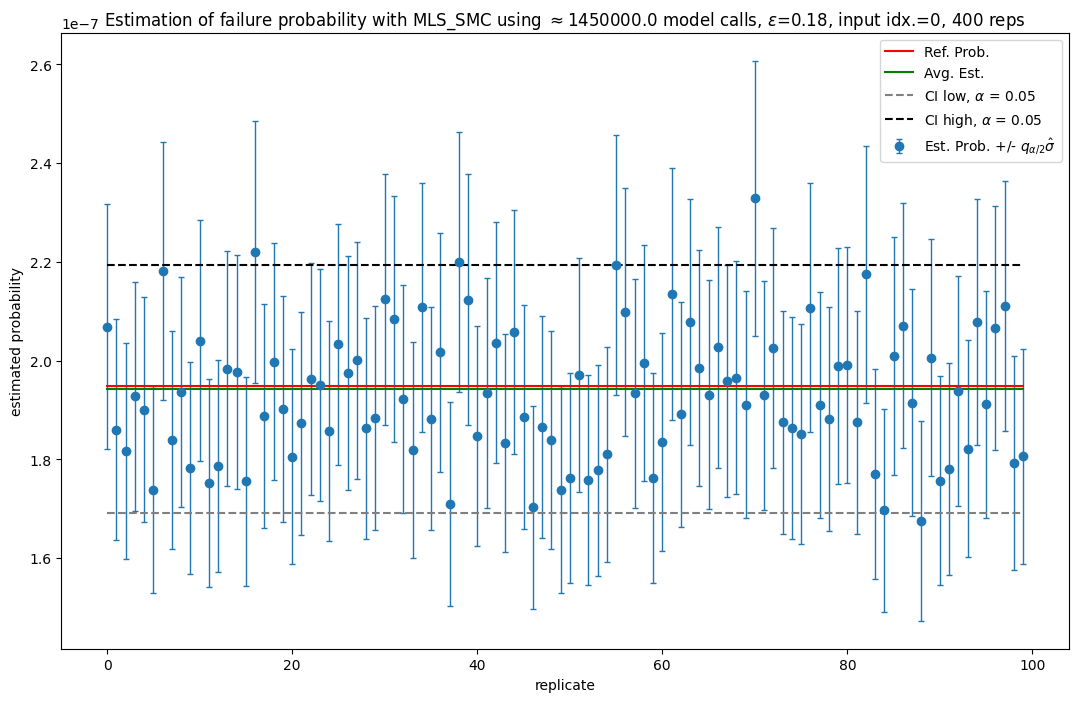

mean est:1.9425139200000008e-07, std est:1.2787616588369242e-08
mean calls:1450000.0
std. re.:338892.0079737974
std. rel. adj.:491393411562.0062
mean rel. error:0.053466509459281275
std rel. error:0.03819675438588315
stat performance (per 1k calls):55.38529385953057
Experiment already done for method: MLS_SMC
Skipping MLS_SMC run 35/36, with model: mnist_model, img_idx:0,eps:0.18,N: 10000: T: 20: ratio: 0.5: s: 1.0
Experiment already done for method: MLS_SMC
Starting MLS_SMC simulation 36/36, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


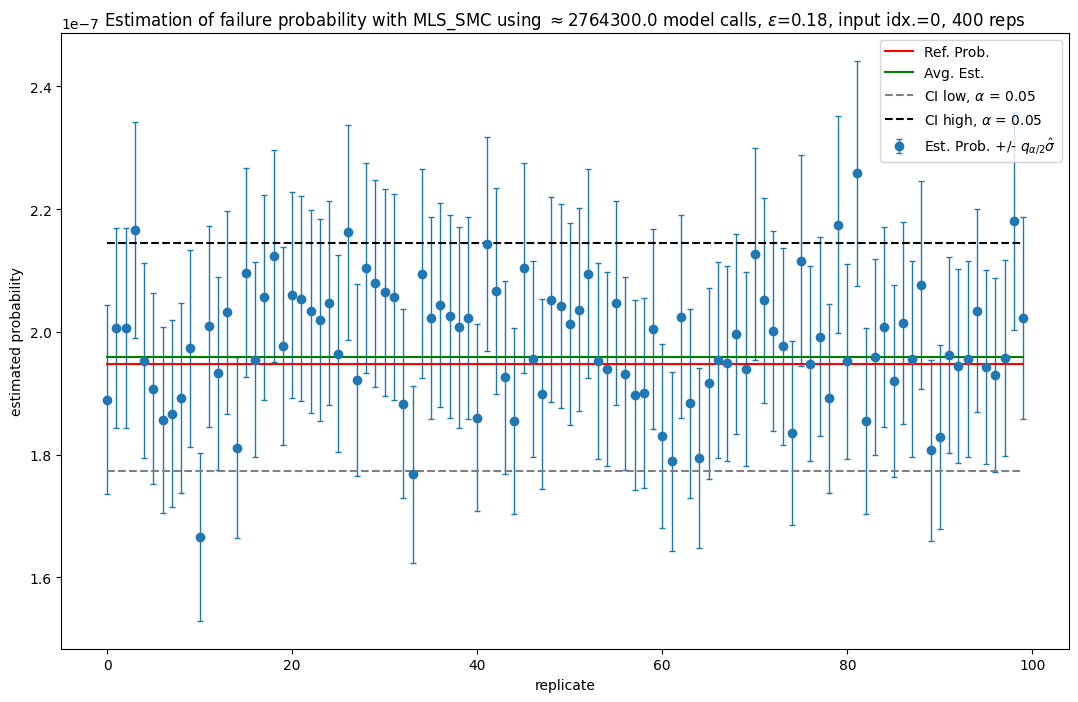

mean est:1.9588075965948228e-07, std est:9.473357237264925e-09
mean calls:2764300.0
std. re.:246899.582459781
std. rel. adj.:682504515793.5726
mean rel. error:0.03863108353541863
std rel. error:0.030097600714562123
stat performance (per 1k calls):83.19879765526409
p_fail_mls: 2.0176766465951106e-07


In [ ]:
p_fail_mls,dict_out=run_est.run_est(model=model,method='amls_batch',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=400, update_aggr_res=True, 
                         N_range=[100,100,10000, 
                                  ],T_range=[2,5,10,20],ratio_range=[0.2,0.5,0.8,],repeat_exp=False,
                        verbose=0,np_seed=0, torch_seed=0,p_ref = p_ref)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

In [ ]:
p_fail_mala, dict_out=run_est.run_stat_rel_exp(model=model,method='mala',X=X,y=y,dataset_name='mnist',
                        n_rep=1, verbose=0, track_accept=False,ess_alpha_range=[0.7,0.8],
                        alpha=0.2, L_range=[1], adapt_func='simp_ess',p_ref=p_ref,
                         N_range=[3000],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )
exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

[[3000], [20], [0.7, 0.8], [0.2], [1]]
{'N_range': [3000], 'T_range': [20], 'ess_alpha_range': [0.7, 0.8], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/2, with model: mnist_model, img_idx:0,eps:0.18,N: 3000: T: 20: ess_alpha: 0.7: alpha: 0.2: L: 1


100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


mean est:7.125619845282927e-07, std est:0.0
mean calls:1806200.0
std. re.:0.0
std. rel. adj.:0.0
Starting MALA_SMC simulation 2/2, with model: mnist_model, img_idx:0,eps:0.18,N: 3000: T: 20: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


mean est:1.429374947292672e-06, std est:0.0
mean calls:1792200.0
std. re.:0.0
std. rel. adj.:0.0
p_fail_mala=1.0709684659104823e-06


with parameters in {'N_range': [500], 'T_range': [20], 'ess_alpha_range': [0.875], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


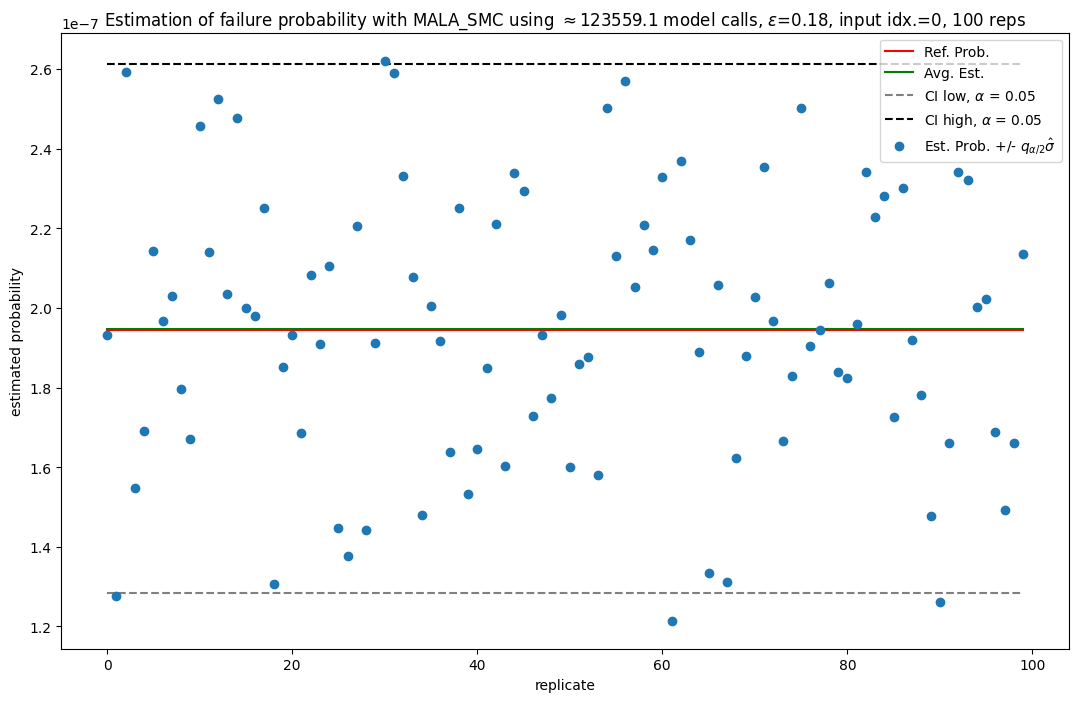

mean est:1.947763398391089e-07, std est:3.3910787382815905e-08
mean calls:123559.1
std. re.:893851.7050677764
std. rel. adj.:110443512211.6399
mean rel. error:0.14067106655076209
std rel. error:0.10307205941389559
stat performance (per 1k calls):12.735490896327468
p_fail_mala=1.947763398391089e-07


In [ ]:
p_fail_mala, dict_out=run_est.run_est(model=model,method='mala2',X=X,y=y,dataset_name='mnist',
                        n_rep=100, verbose=0, track_accept=False,ess_alpha_range=[0.875],
                        alpha=0.2, L_range=[1], adapt_func='simp_ess',p_ref=p_ref,
                         N_range=[500],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )
exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

In [ ]:
p_fail_form,dict_out_form = run_est.run_est(model=model,method='form',X=X,y=y,dataset_name='mnist',
                    search_method='carlini',epsilon_range = epsilon_range,
                    steps_range=[1000,],num_iter_range=[10],stepsize_range=[1e-2],
                    repeat_exp=True, random_init=False, 
                    sigma_init=0.000001,
                        
                        
                        n_rep=1, verbose=0,p_ref=p_ref)

NameError: name 'model' is not defined

In [ ]:
p_fail_mc, dict_out_mc = run_est.run_est(model=model, method = 'CrudeMC',
            X=X, y=y, dataset_name='mnist',epsilon_range=epsilon_range,
            repeat_exp=True,n_rep=5, 
            N_range=[int(1e8)],batch_size_range=[int(4e5)],track_advs=False) 

with parameters in {'N_range': [100000000], 'batch_size_range': [400000]}
Starting CrudeMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


 20%|██        | 1/5 [00:34<02:16, 34.19s/it]


KeyboardInterrupt: 

In [ ]:
exp_config.model

dnn2(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (flat_op): Flatten()
)

## 4. Analysis of Experiments

In [ ]:
eps=0.18

NameError: name 'agg_res_df' is not defined

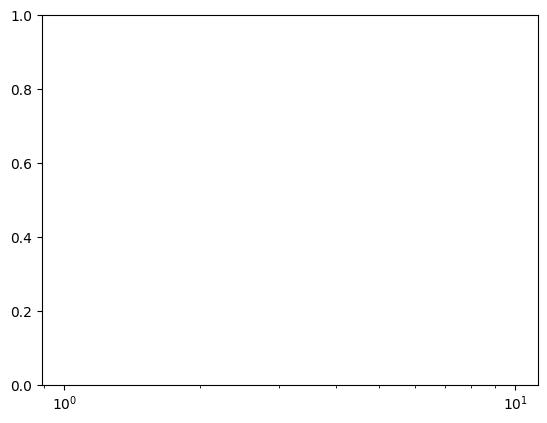

In [ ]:
fig=plt.figure()
ax=plt.axes()
ax.set_xscale('log')
mls_webb_df=  utils.get_sel_df(df=agg_res_df,triplets=[('method_name','MALA_SMC','='),])
for T in agg_res_df['T'].unique():
    df = utils.get_sel_df(mls_webb_df,triplets=[('T',T,'='),('epsilon',eps,'=')])
    ax.errorbar(x=df['mean_calls'],y=df['mean_log_est'], yerr=df['std_log_est'],label=f'mean_log, T={T}',)
    ax.legend()

